In [2]:
import pandas as pd
from simulation_para import square_length, bandwidth
from _utils import plot_cdf_pdf, compare_models, compare_cdfs_ks, compare_cdfs_emd, compare_cdfs_moments, calculate_area_throughput, calculate_and_rank_percentiles, plot_sinr_heatmap, generate_colorbar_ticks, duration_benchmarking, plot_sinr_heatmaps, compare_with_baseline

In [3]:
# Results location
algo_name = "SAC"
optim_name = "SGD"
results_dir = 'results'
results_folder = f'{algo_name}-{optim_name}'

# Spectral Efficiencies

In [4]:
# load data from csv files
MODEL_DELTA_SE_SEs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SEs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_SEs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_SEs.csv', index_col=0)
MODEL_LOG_DELTA_SE_SEs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_SEs.csv', index_col=0)
MODEL_RELATIVE_SE_SEs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SEs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_SEs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_SEs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_SEs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_SEs.csv', index_col=0)
MODEL_DELTA_SINR_SEs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SEs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SEs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SEs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_SEs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SEs.csv', index_col=0)
MODEL_RELATIVE_SINR_SEs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SEs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SEs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SEs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SEs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SEs.csv', index_col=0)

MAXMIN_SEs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SEs.csv', index_col=0)
MAXPROD_SEs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SEs.csv', index_col=0)
SUMRATE_SEs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SEs.csv', index_col=0)

In [5]:
SE_DATA_R_SE = {
    'MODEL_DELTA_SE_SEs':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_SEs,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_SEs':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_SEs,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SE_SEs':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_SEs,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_SEs':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_SEs,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_SEs':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_SEs,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_SEs':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_SEs,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SEs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SEs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SEs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SEs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SEs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SEs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

SE_DATA_R_SINR = {
    'MODEL_DELTA_SINR_SEs':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_SEs,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_SEs':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_SEs,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_SEs':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_SEs,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_SEs':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_SEs,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_SEs': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_SEs,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_SEs':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_SEs,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SEs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SEs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SEs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SEs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SEs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SEs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

## Spectral Efficiencies

### Spectral Efficiencies

AUC for DRL [DELTA SE]: 2.64
AUC for DRL [EXP DELTA SE]: 2.56
AUC for DRL [LOG DELTA SE]: 2.60
AUC for DRL [RELATIVE SE]: 2.64
AUC for DRL [EXP RELATIVE SE]: 2.60
AUC for DRL [LOG RELATIVE SE]: 2.43
AUC for MAX-MIN: 3.03
AUC for MAX-PROD: 2.70
AUC for MAX-SUM-RATE: 2.90


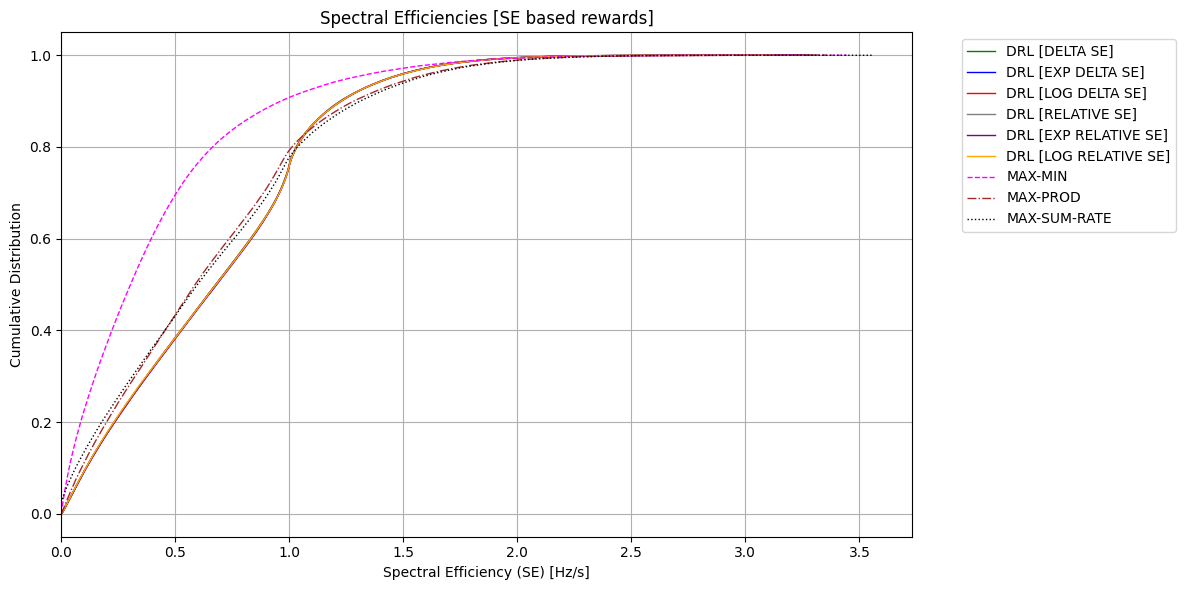

In [5]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=True, save_plt=True, save_path='figures', xmin=0)

In [17]:
calculate_and_rank_percentiles(SE_DATA_R_SE, [99])

Model  99th Percentile  Rank
8           MAX-SUM-RATE         2.024779     1
7               MAX-PROD         2.013115     2
5  DRL [LOG RELATIVE SE]         1.860490     3
2     DRL [LOG DELTA SE]         1.860169     4
1     DRL [EXP DELTA SE]         1.858723     5
4  DRL [EXP RELATIVE SE]         1.855233     6
6                MAX-MIN         1.851891     7
0         DRL [DELTA SE]         1.850329     8
3      DRL [RELATIVE SE]         1.850329     8

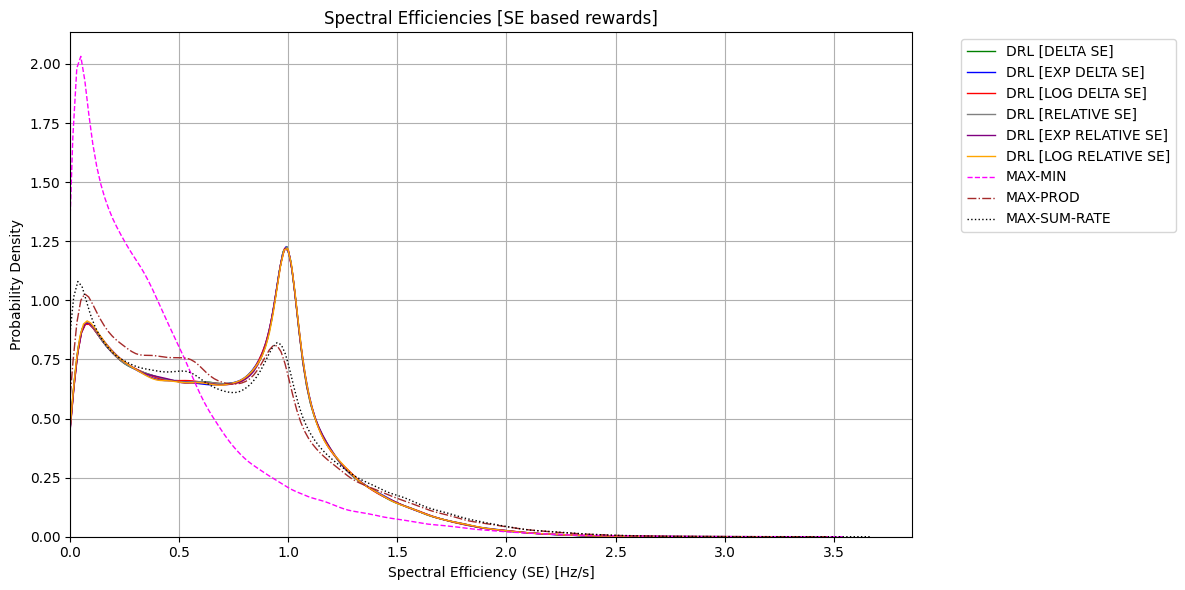

In [7]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=False, save_plt=True, save_path='figures', xmin=0)

AUC for DRL [DELTA SINR]: 2.73
AUC for DRL [EXP DELTA SINR]: 2.77
AUC for DRL [LOG DELTA SINR]: 2.70
AUC for DRL [RELATIVE SINR]: 2.85
AUC for DRL [EXP RELATIVE SINR]: 2.60
AUC for DRL [LOG RELATIVE SINR]: 2.39
AUC for MAX-MIN: 3.03
AUC for MAX-PROD: 2.70
AUC for MAX-SUM-RATE: 2.90


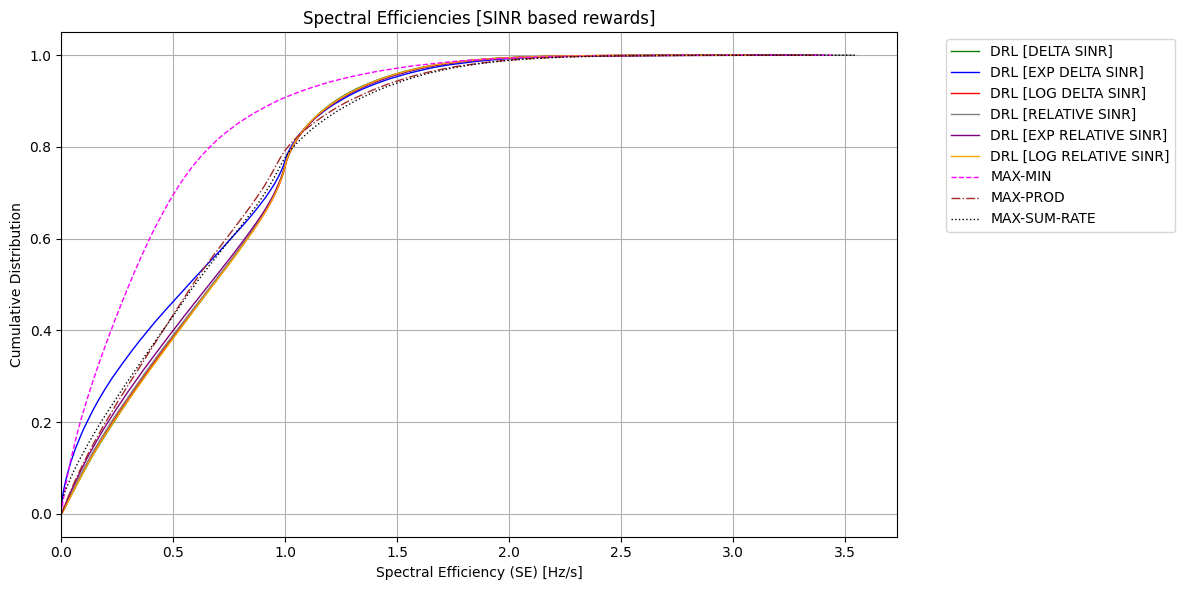

In [8]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=True, save_plt=True, save_path='figures', xmin=0)

In [18]:
calculate_and_rank_percentiles(SE_DATA_R_SINR, [83])

Model  83th Percentile  Rank
8             MAX-SUM-RATE         1.098151     1
2     DRL [LOG DELTA SINR]         1.072075     2
4  DRL [EXP RELATIVE SINR]         1.071420     3
7                 MAX-PROD         1.071246     4
3      DRL [RELATIVE SINR]         1.070492     5
5  DRL [LOG RELATIVE SINR]         1.069826     6
0         DRL [DELTA SINR]         1.069714     7
1     DRL [EXP DELTA SINR]         1.067767     8
6                  MAX-MIN         0.731029     9

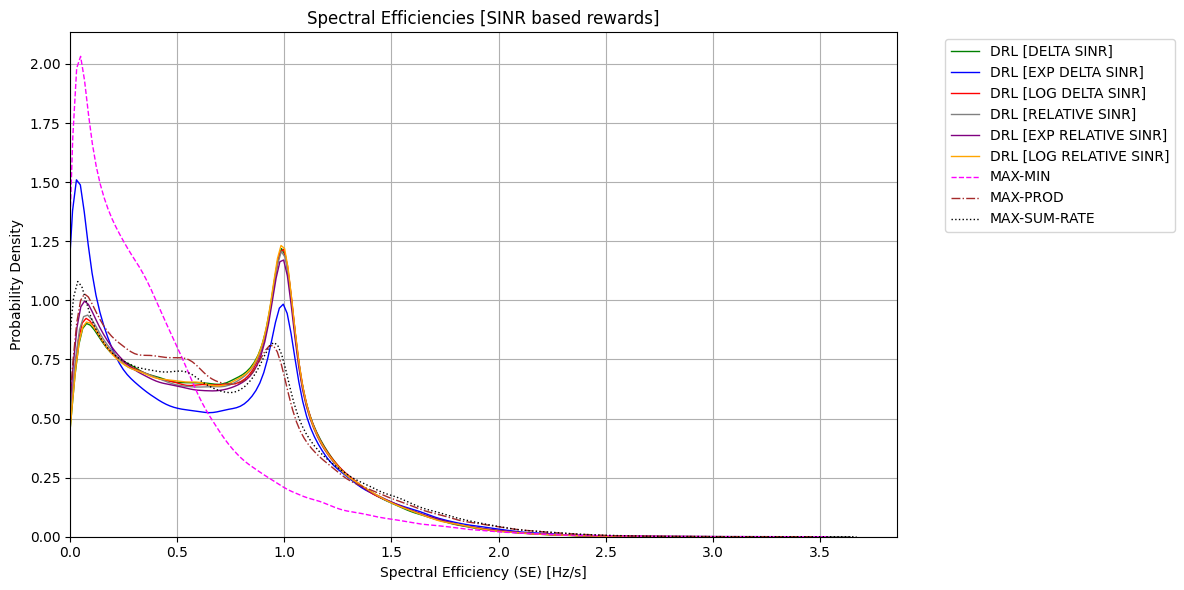

In [10]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=False, save_plt=True, save_path='figures', xmin=0)

### Mean Spectral Efficiencies

AUC for DRL [DELTA SE]: 0.32
AUC for DRL [EXP DELTA SE]: 0.32
AUC for DRL [LOG DELTA SE]: 0.33
AUC for DRL [RELATIVE SE]: 0.32
AUC for DRL [EXP RELATIVE SE]: 0.31
AUC for DRL [LOG RELATIVE SE]: 0.33
AUC for MAX-MIN: 0.44
AUC for MAX-PROD: 0.31
AUC for MAX-SUM-RATE: 0.36


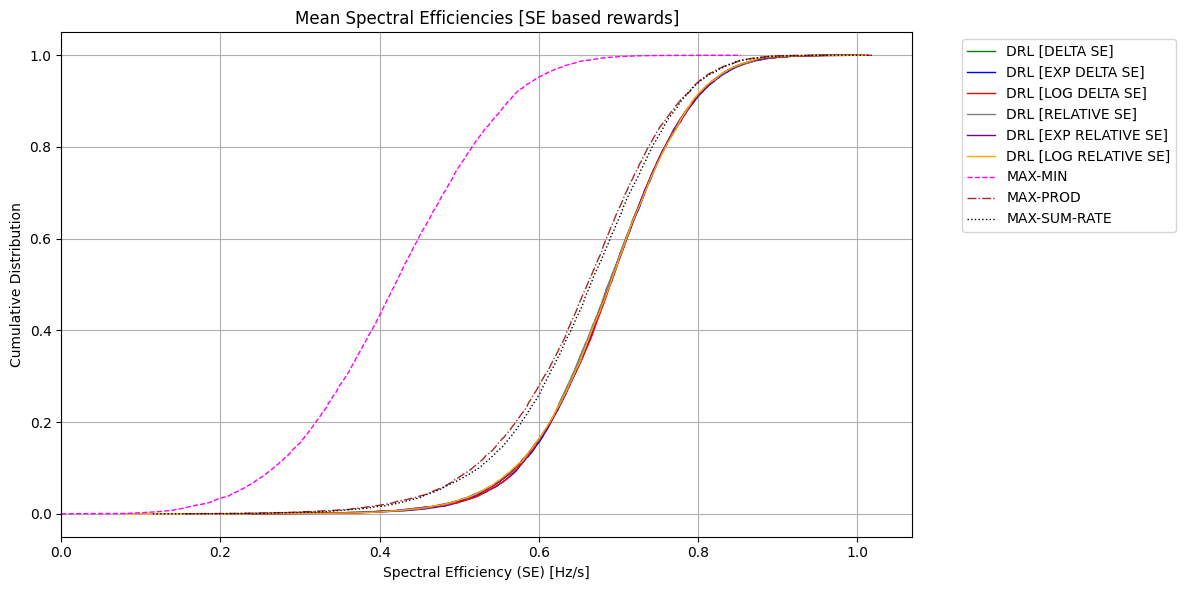

In [11]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Mean Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=True, save_plt=True, save_path='figures', xmin=0)

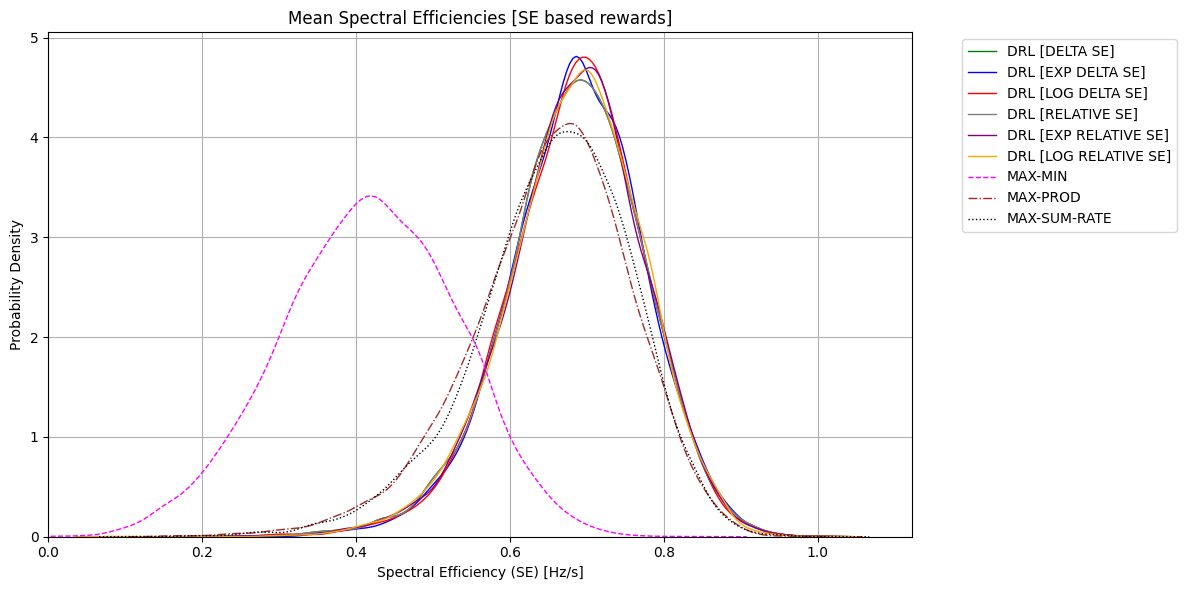

In [12]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Mean Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=False, save_plt=True, save_path='figures', xmin=0)

AUC for DRL [DELTA SINR]: 0.30
AUC for DRL [EXP DELTA SINR]: 0.33
AUC for DRL [LOG DELTA SINR]: 0.34
AUC for DRL [RELATIVE SINR]: 0.30
AUC for DRL [EXP RELATIVE SINR]: 0.30
AUC for DRL [LOG RELATIVE SINR]: 0.34
AUC for MAX-MIN: 0.44
AUC for MAX-PROD: 0.31
AUC for MAX-SUM-RATE: 0.36


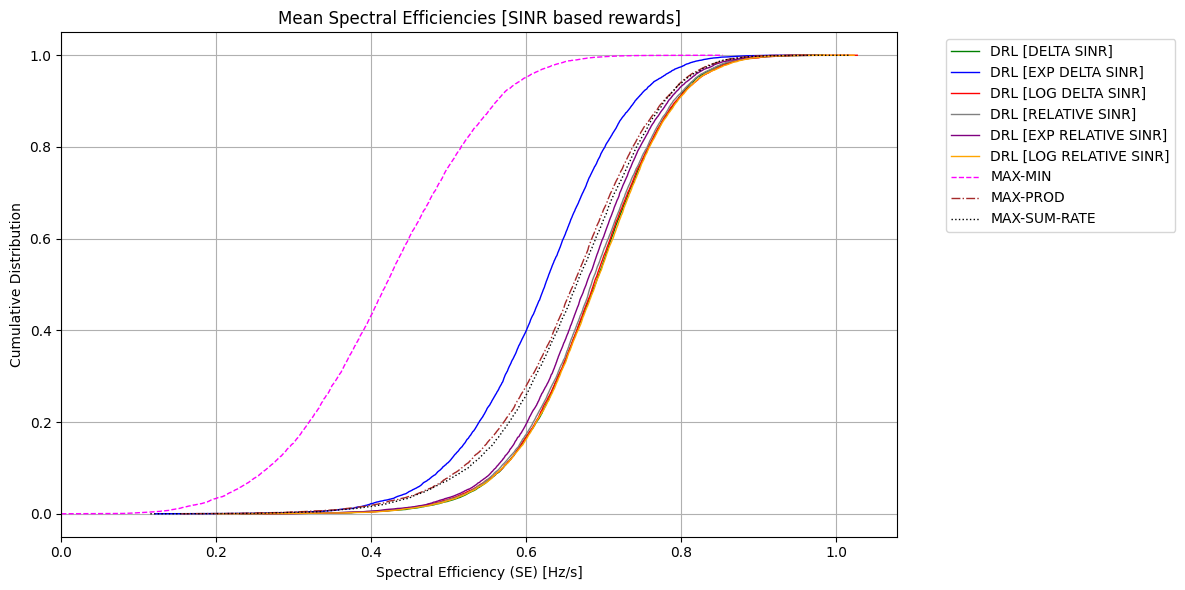

In [13]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Mean Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=True, save_plt=True, save_path='figures', xmin=0)

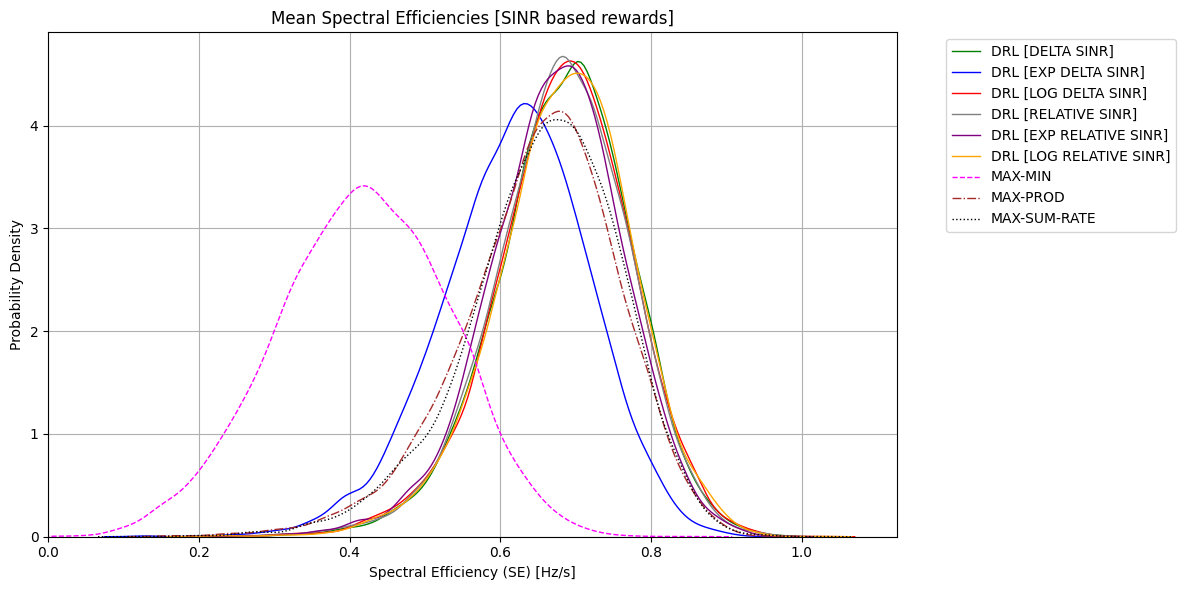

In [14]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Mean Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=False, save_plt=True, save_path='figures', xmin=0)

### Min Spectral Efficiencies

AUC for DRL [DELTA SE]: 0.31
AUC for DRL [EXP DELTA SE]: 0.37
AUC for DRL [LOG DELTA SE]: 0.30
AUC for DRL [RELATIVE SE]: 0.31
AUC for DRL [EXP RELATIVE SE]: 0.39
AUC for DRL [LOG RELATIVE SE]: 0.30
AUC for MAX-MIN: 0.23
AUC for MAX-PROD: 0.35
AUC for MAX-SUM-RATE: 0.32


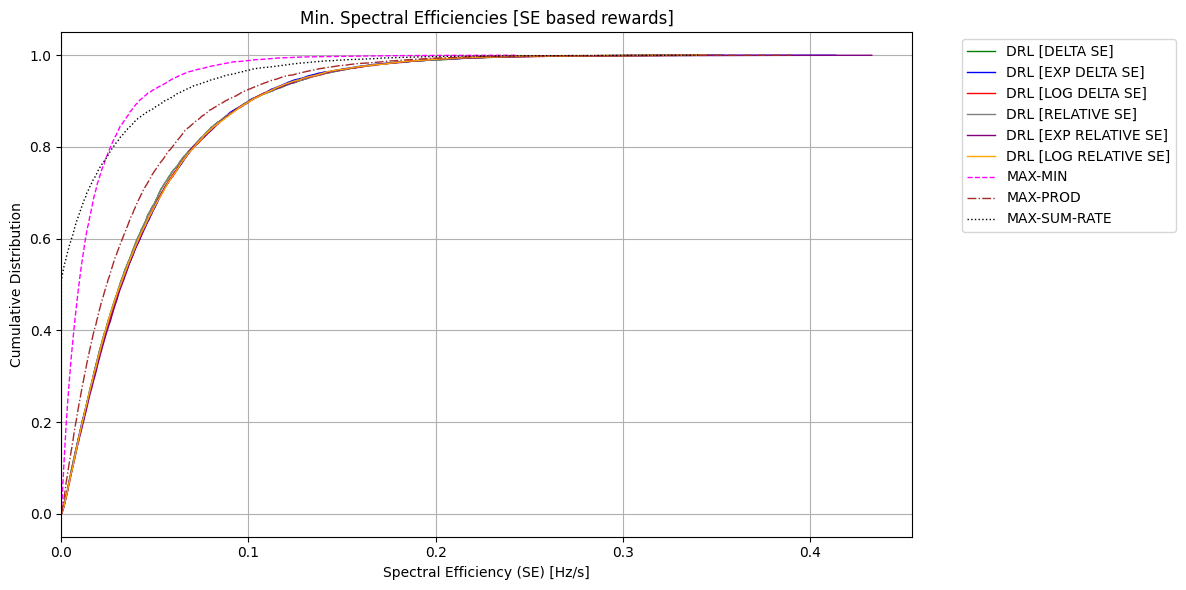

In [15]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Min. Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=True, save_plt=True, save_path='figures', xmin=0)

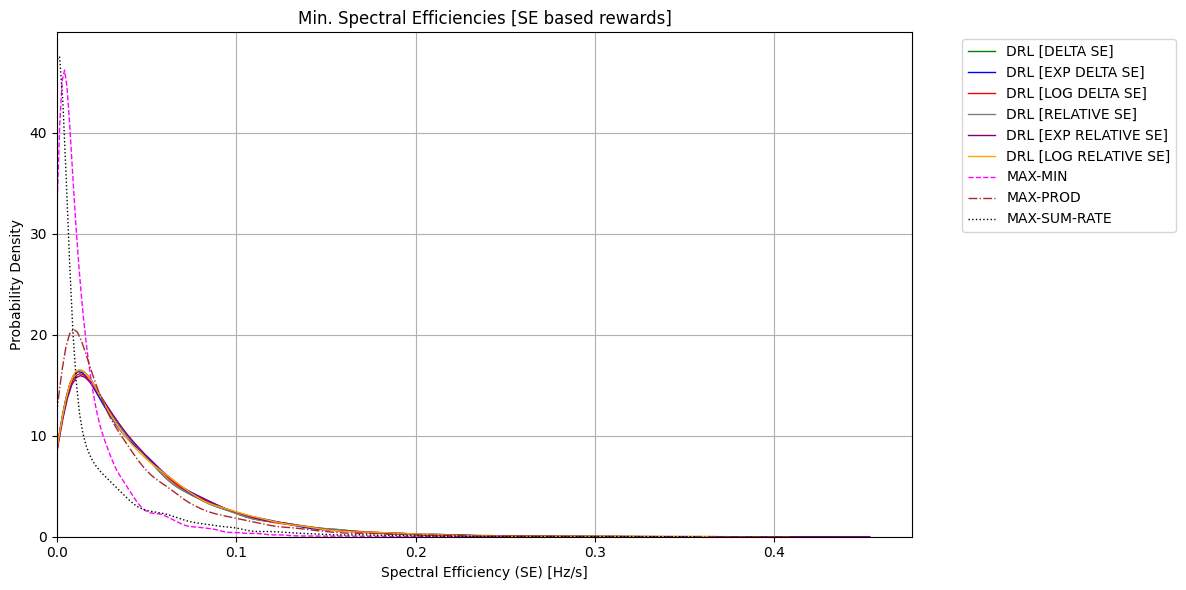

In [16]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Min. Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=False, save_plt=True, save_path='figures', xmin=0)

AUC for DRL [DELTA SINR]: 0.40
AUC for DRL [EXP DELTA SINR]: 0.26
AUC for DRL [LOG DELTA SINR]: 0.28
AUC for DRL [RELATIVE SINR]: 0.32
AUC for DRL [EXP RELATIVE SINR]: 0.36
AUC for DRL [LOG RELATIVE SINR]: 0.31
AUC for MAX-MIN: 0.23
AUC for MAX-PROD: 0.35
AUC for MAX-SUM-RATE: 0.32


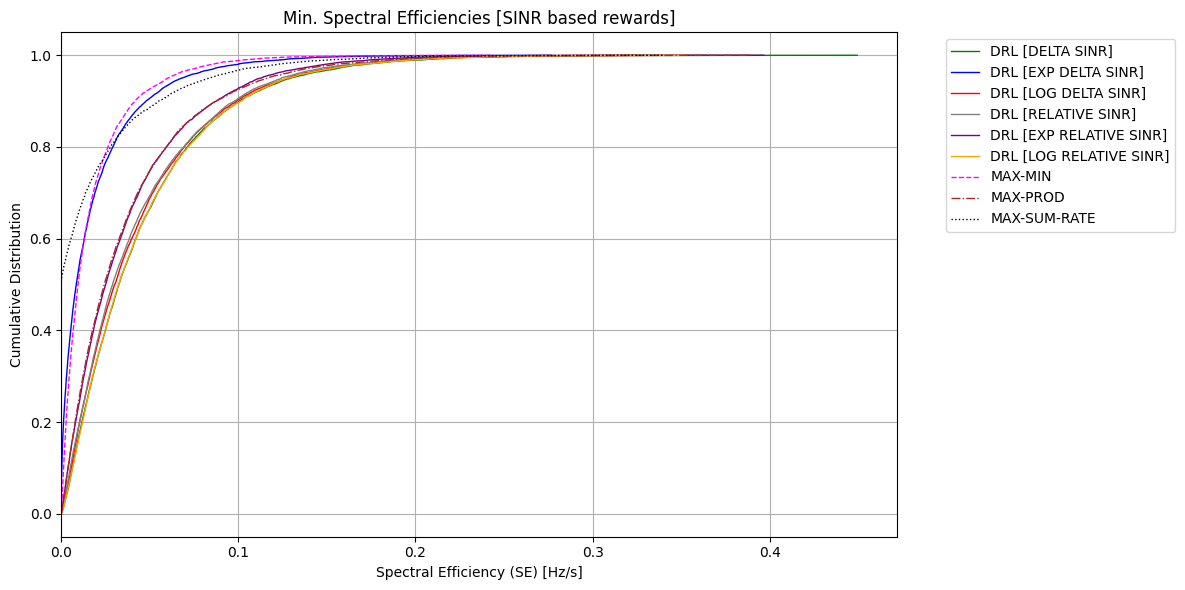

In [17]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Min. Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=True, save_plt=True, save_path='figures', xmin=0)

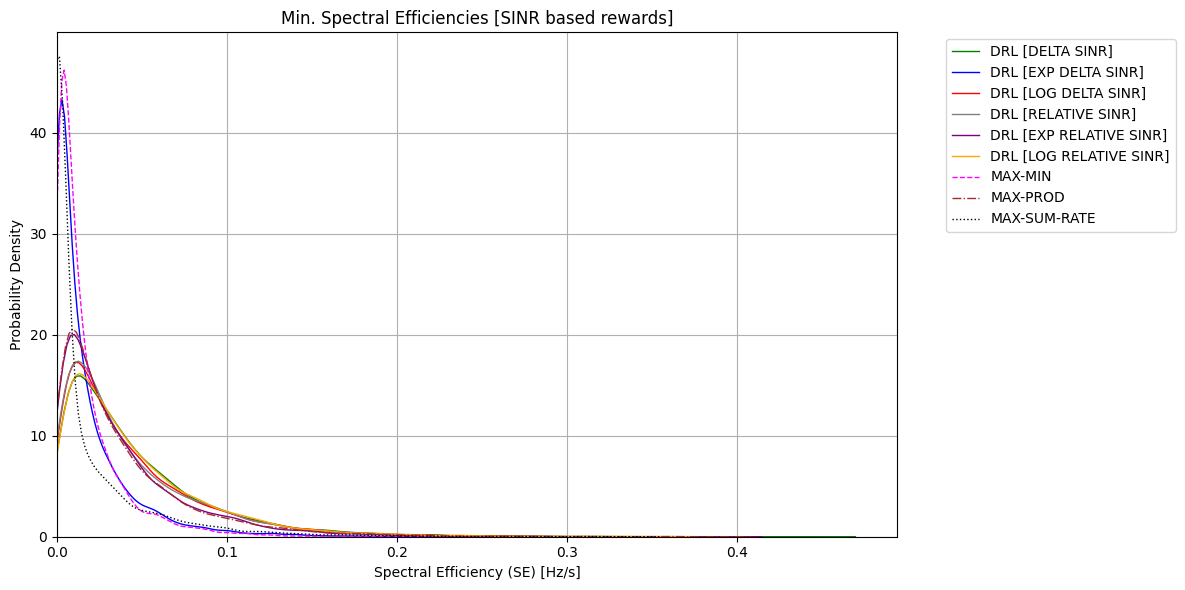

In [18]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Min. Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=False, save_plt=True, save_path='figures', xmin=0)

### Max Spectral Efficiencies

AUC for DRL [DELTA SE]: 1.62
AUC for DRL [EXP DELTA SE]: 1.55
AUC for DRL [LOG DELTA SE]: 1.58
AUC for DRL [RELATIVE SE]: 1.62
AUC for DRL [EXP RELATIVE SE]: 1.58
AUC for DRL [LOG RELATIVE SE]: 1.42
AUC for MAX-MIN: 1.80
AUC for MAX-PROD: 1.52
AUC for MAX-SUM-RATE: 1.70


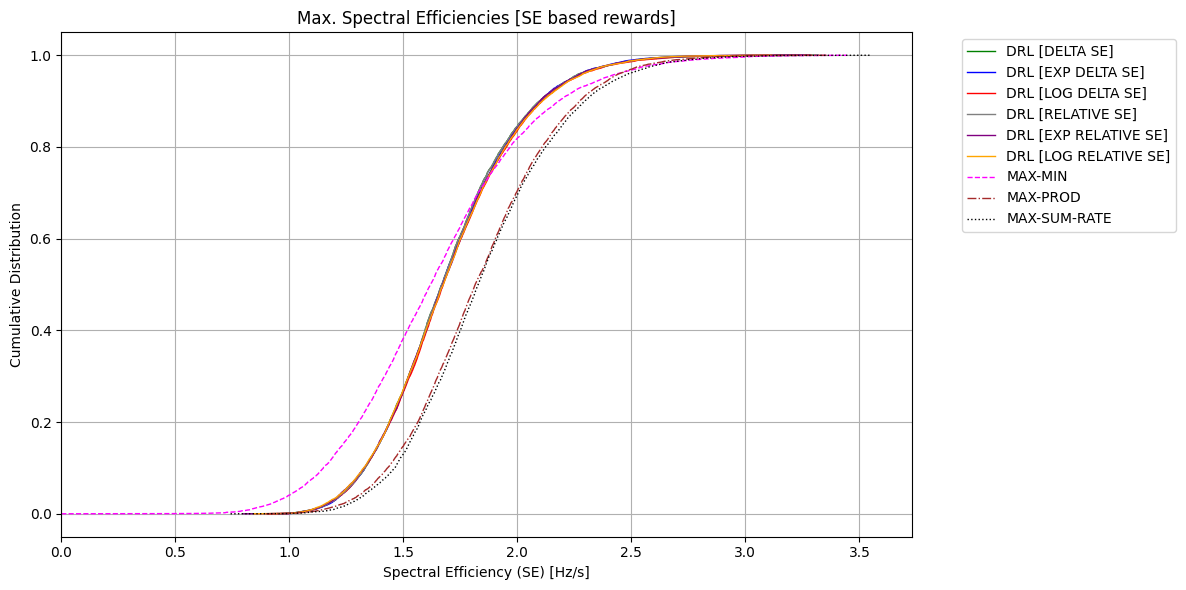

In [19]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Max. Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=True, save_plt=True, save_path='figures', xmin=0)

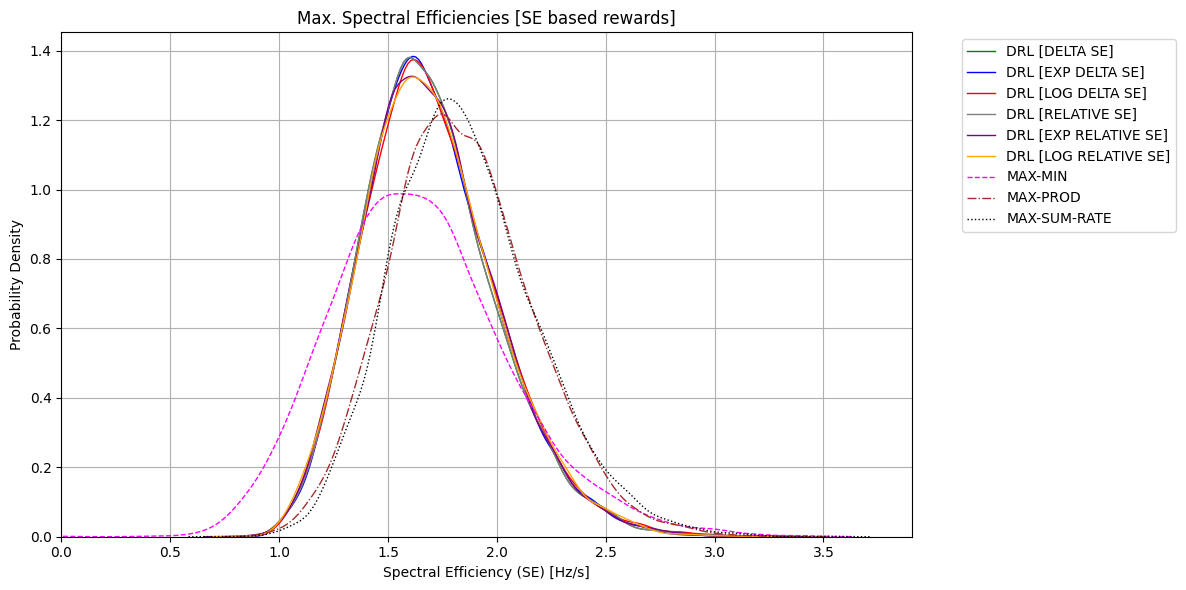

In [20]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Max. Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=False, save_plt=True, save_path='figures', xmin=0)

AUC for DRL [DELTA SINR]: 1.72
AUC for DRL [EXP DELTA SINR]: 1.63
AUC for DRL [LOG DELTA SINR]: 1.68
AUC for DRL [RELATIVE SINR]: 1.82
AUC for DRL [EXP RELATIVE SINR]: 1.56
AUC for DRL [LOG RELATIVE SINR]: 1.38
AUC for MAX-MIN: 1.80
AUC for MAX-PROD: 1.52
AUC for MAX-SUM-RATE: 1.70


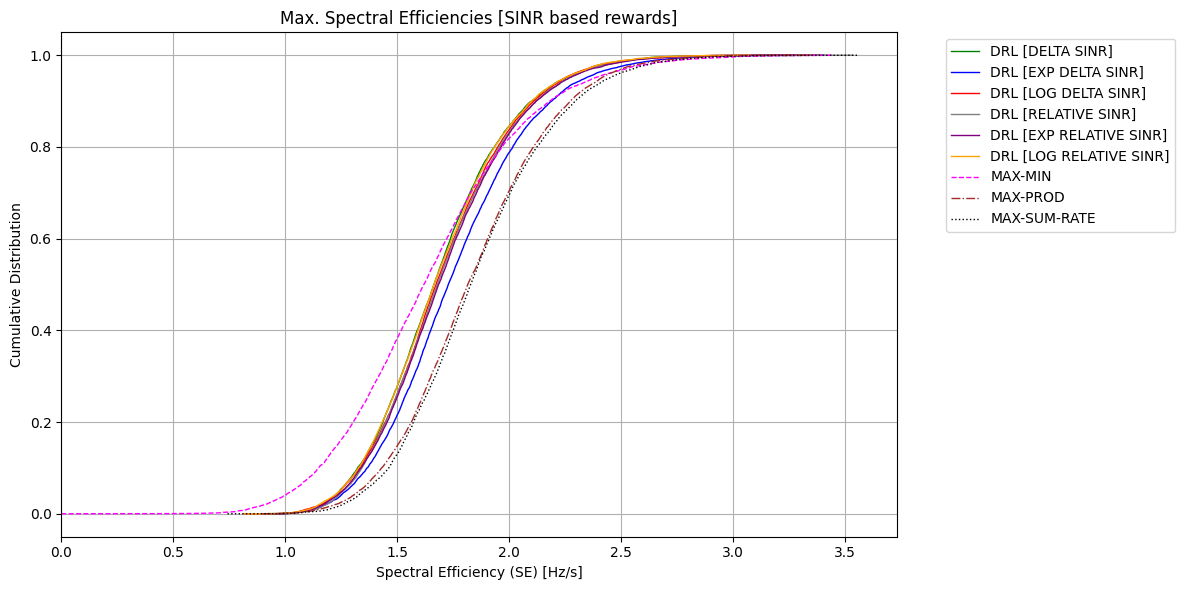

In [21]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Max. Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=True, save_plt=True, save_path='figures', xmin=0)

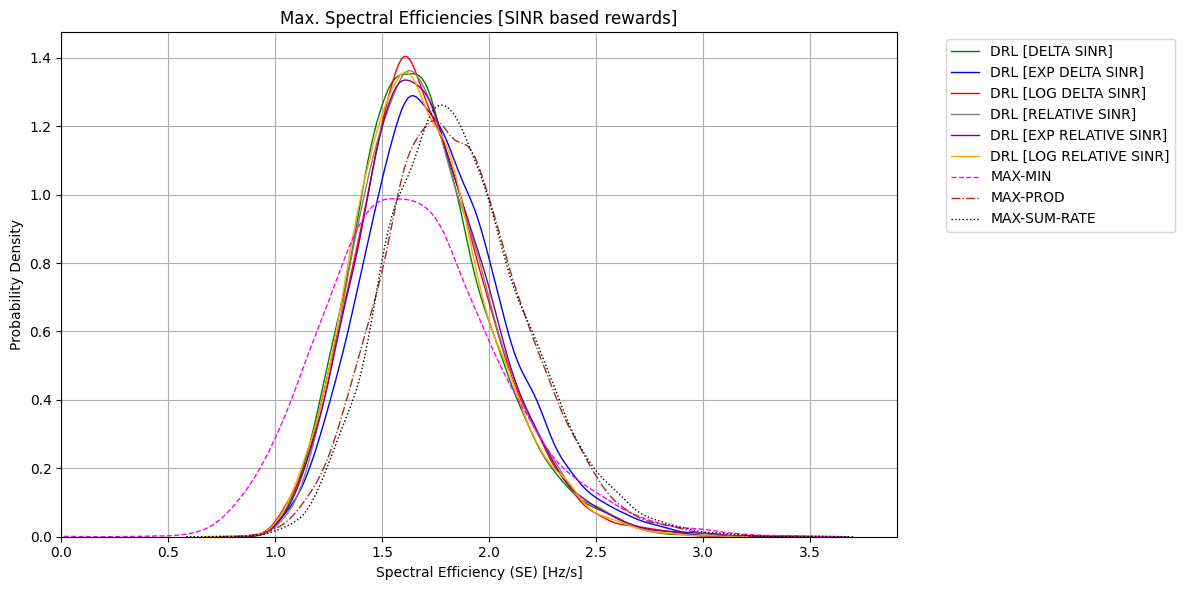

In [22]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Max. Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=False, save_plt=True, save_path='figures', xmin=0)

### Sum Spectral Efficiencies

AUC for DRL [DELTA SE]: 10.31
AUC for DRL [EXP DELTA SE]: 10.23
AUC for DRL [LOG DELTA SE]: 10.56
AUC for DRL [RELATIVE SE]: 10.31
AUC for DRL [EXP RELATIVE SE]: 10.07
AUC for DRL [LOG RELATIVE SE]: 10.44
AUC for MAX-MIN: 13.99
AUC for MAX-PROD: 10.05
AUC for MAX-SUM-RATE: 11.57


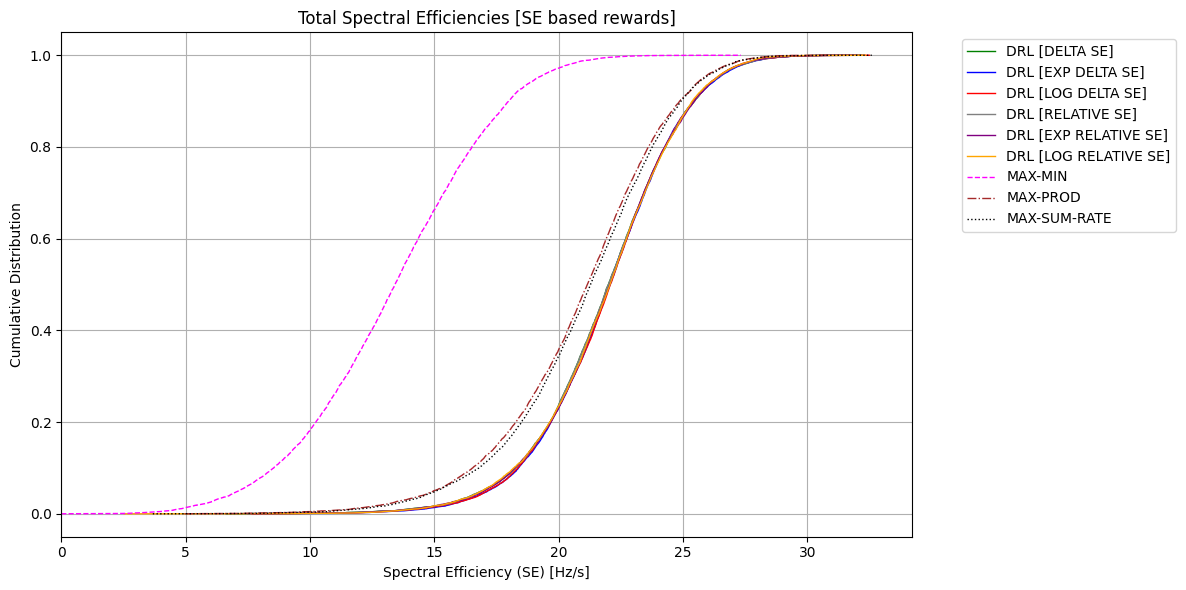

In [23]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Total Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=True, save_plt=True, save_path='figures', xmin=0)

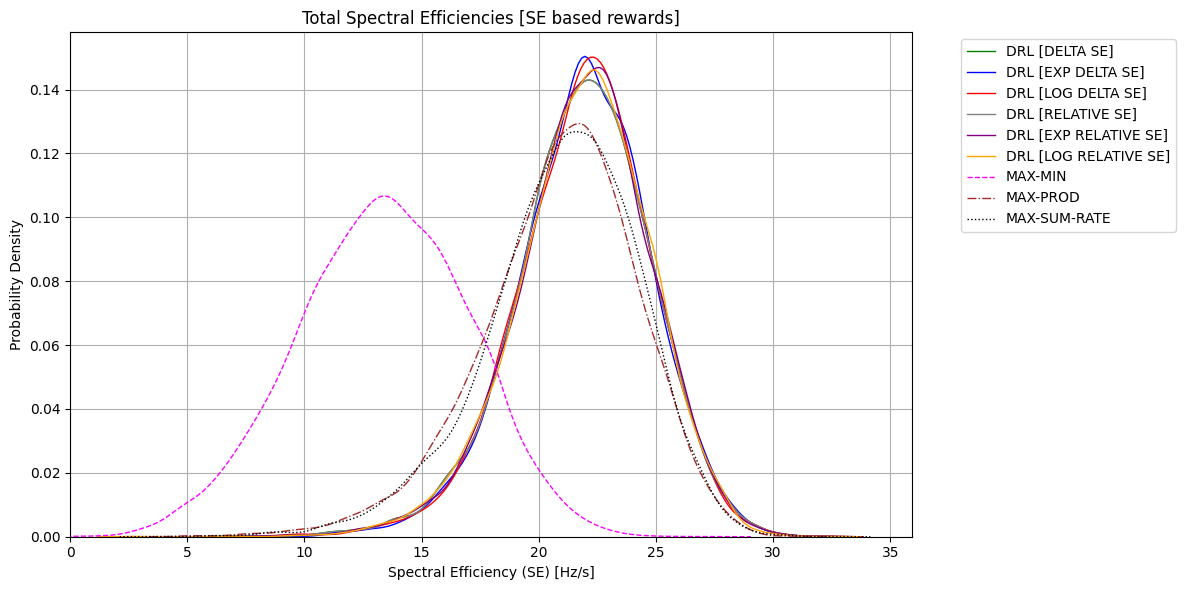

In [24]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Total Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=False, save_plt=True, save_path='figures', xmin=0)

AUC for DRL [DELTA SINR]: 9.60
AUC for DRL [EXP DELTA SINR]: 10.63
AUC for DRL [LOG DELTA SINR]: 11.02
AUC for DRL [RELATIVE SINR]: 9.46
AUC for DRL [EXP RELATIVE SINR]: 9.67
AUC for DRL [LOG RELATIVE SINR]: 10.83
AUC for MAX-MIN: 13.99
AUC for MAX-PROD: 10.05
AUC for MAX-SUM-RATE: 11.57


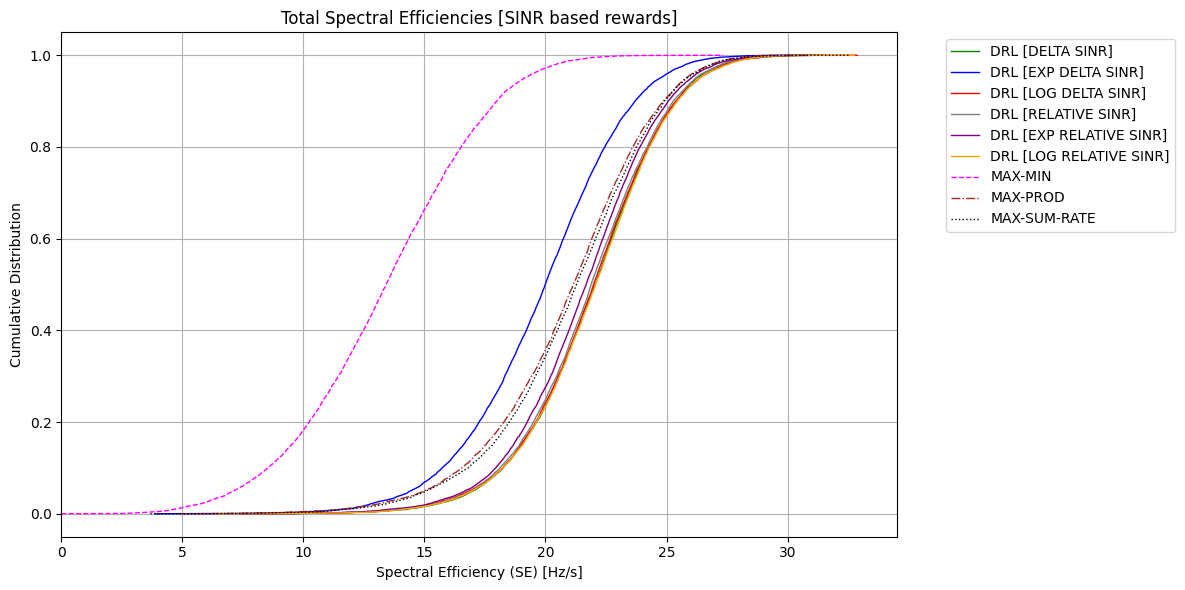

In [25]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Total Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=True, save_plt=True, save_path='figures', xmin=0)

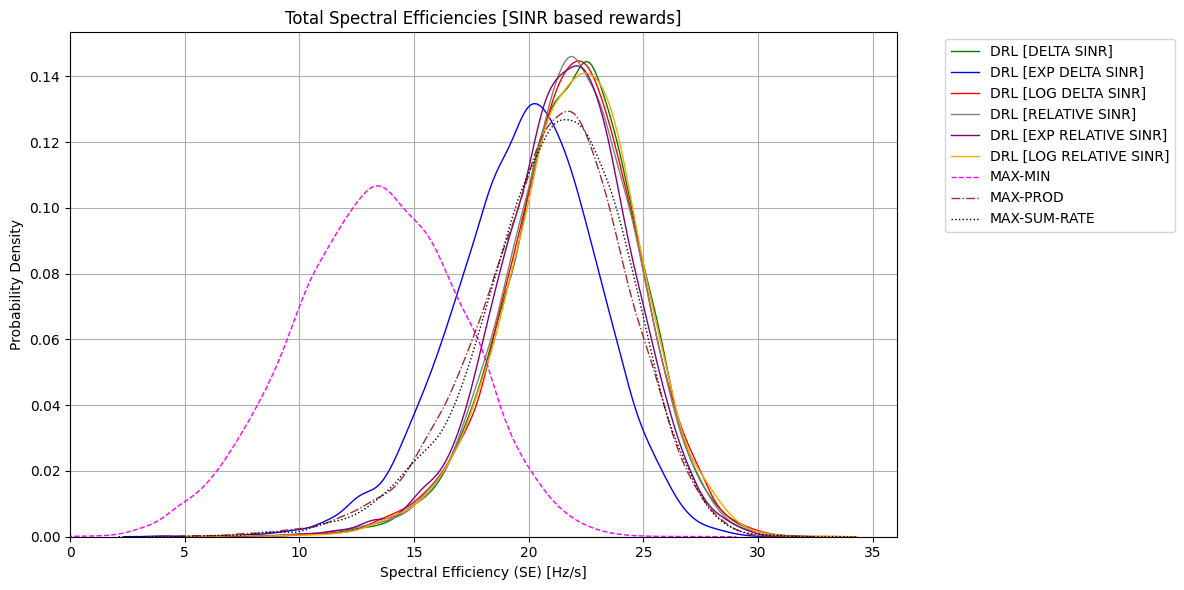

In [26]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Total Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=False, save_plt=True, save_path='figures', xmin=0)

## CDF Comparison

#### SE based reward

In [27]:
compare_models(SE_DATA_R_SE, operation=None, data_label='SE')

Label Average SE    Max SE  \
MODEL_DELTA_SE_SEs                     DRL [DELTA SE]   0.683686  3.319158   
MODEL_EXP_DELTA_CLIP_SE_SEs        DRL [EXP DELTA SE]   0.685706  3.250645   
MODEL_LOG_DELTA_SE_SEs             DRL [LOG DELTA SE]   0.685371  3.286095   
MODEL_RELATIVE_SE_SEs               DRL [RELATIVE SE]   0.683686  3.319158   
MODEL_EXP_RELATIVE_CLIP_SE_SEs  DRL [EXP RELATIVE SE]   0.684582  3.280785   
MODEL_LOG_RELATIVE_SE_SEs       DRL [LOG RELATIVE SE]   0.684102  3.116213   
MAXMIN_SEs                                    MAX-MIN   0.416744  3.444802   
MAXPROD_SEs                                  MAX-PROD   0.651955  3.355298   
SUMRATE_SEs                              MAX-SUM-RATE   0.656791  3.554396   

                               Standard Deviation 25th Percentile  \
MODEL_DELTA_SE_SEs                       0.441702        0.302054   
MODEL_EXP_DELTA_CLIP_SE_SEs              0.442153        0.302725   
MODEL_LOG_DELTA_SE_SEs                   0.442246        0.303351   
MODEL_RELATIVE_SE_SEs                    0.441702        0.302054   
MODEL_EXP_RELATIVE_CLIP_SE_SEs           0.442382        0.301175   
MODEL_LOG_RELATIVE_SE_SEs                0.443269        0.299577   
MAXMIN_SEs                               0.407635        0.115419   
MAXPROD_SEs                              0.472727        0.259221   
SUMRATE_SEs                              0.489324        0.243395   

                               50th Percentile 75th Percentile  
MODEL_DELTA_SE_SEs                    0.677655        0.994225  
MODEL_EXP_DELTA_CLIP_SE_SEs           0.681679        0.995004  
MODEL_LOG_DELTA_SE_SEs                0.678745         0.99475  
MODEL_RELATIVE_SE_SEs                 0.677655        0.994225  
MODEL_EXP_RELATIVE_CLIP_SE_SEs        0.677875        0.995143  
MODEL_LOG_RELATIVE_SE_SEs             0.678554        0.995262  
MAXMIN_SEs                            0.303606        0.574473  
MAXPROD_SEs                           0.586954        0.948517  
SUMRATE_SEs                           0.597213        0.969147

In [28]:
ks_results_r_se = compare_cdfs_ks(SE_DATA_R_SE, operation=None)

In [29]:
ks_results_r_se['Best Model']

Criteria      Best Model
0       KS Statistic  DRL [DELTA SE]
1            P-Value  DRL [DELTA SE]
2  Area Between CDFs  DRL [DELTA SE]

In [30]:
# ks_results_r_se['Details']

In [31]:
emd_results_r_se = compare_cdfs_emd(SE_DATA_R_SE, operation=None)

In [32]:
emd_results_r_se['Ranked Models']

Model  Average EMD
0         DRL [DELTA SE]     0.049322
1      DRL [RELATIVE SE]     0.049322
2  DRL [LOG RELATIVE SE]     0.049327
3  DRL [EXP RELATIVE SE]     0.049371
4     DRL [LOG DELTA SE]     0.049755
5     DRL [EXP DELTA SE]     0.050136
6               MAX-PROD     0.075071
7           MAX-SUM-RATE     0.079184
8                MAX-MIN     0.261319

In [33]:
# emd_results_r_se['Details']

In [34]:
moments_r_se = compare_cdfs_moments(SE_DATA_R_SE, operation=None, criteria='mean')

In [35]:
moments_r_se['Ranked Models']

Model  Rank
1     MODEL_EXP_DELTA_CLIP_SE_SEs     1
2          MODEL_LOG_DELTA_SE_SEs     2
4  MODEL_EXP_RELATIVE_CLIP_SE_SEs     3
5       MODEL_LOG_RELATIVE_SE_SEs     4
0              MODEL_DELTA_SE_SEs     5
3           MODEL_RELATIVE_SE_SEs     6
8                     SUMRATE_SEs     7
7                     MAXPROD_SEs     8
6                      MAXMIN_SEs     9

In [36]:
# moments_r_se['Details']

#### SINR based reward

In [37]:
compare_models(SE_DATA_R_SINR, operation=None, data_label='SE')

Label Average SE  \
MODEL_DELTA_SINR_SEs                     DRL [DELTA SINR]   0.683898   
MODEL_EXP_DELTA_CLIP_SINR_SEs        DRL [EXP DELTA SINR]   0.619211   
MODEL_LOG_DELTA_SINR_SEs             DRL [LOG DELTA SINR]   0.682924   
MODEL_RELATIVE_SINR_SEs               DRL [RELATIVE SINR]   0.680396   
MODEL_EXP_RELATIVE_CLIP_SINR_SEs  DRL [EXP RELATIVE SINR]   0.673054   
MODEL_LOG_RELATIVE_SINR_SEs       DRL [LOG RELATIVE SINR]   0.684942   
MAXMIN_SEs                                        MAX-MIN   0.416744   
MAXPROD_SEs                                      MAX-PROD   0.651955   
SUMRATE_SEs                                  MAX-SUM-RATE   0.656791   

                                    Max SE Standard Deviation 25th Percentile  \
MODEL_DELTA_SINR_SEs              3.412243           0.440906        0.302404   
MODEL_EXP_DELTA_CLIP_SINR_SEs      3.39295           0.487019        0.168878   
MODEL_LOG_DELTA_SINR_SEs          3.387074           0.444946        0.297182   
MODEL_RELATIVE_SINR_SEs           3.535097           0.446466        0.292705   
MODEL_EXP_RELATIVE_CLIP_SINR_SEs  3.273646           0.452057         0.27568   
MODEL_LOG_RELATIVE_SINR_SEs       3.076059           0.441795        0.303198   
MAXMIN_SEs                        3.444802           0.407635        0.115419   
MAXPROD_SEs                       3.355298           0.472727        0.259221   
SUMRATE_SEs                       3.554396           0.489324        0.243395   

                                 50th Percentile 75th Percentile  
MODEL_DELTA_SINR_SEs                    0.678814        0.994008  
MODEL_EXP_DELTA_CLIP_SINR_SEs           0.568867        0.984184  
MODEL_LOG_DELTA_SINR_SEs                0.676008        0.995683  
MODEL_RELATIVE_SINR_SEs                 0.672829        0.994103  
MODEL_EXP_RELATIVE_CLIP_SINR_SEs        0.660351        0.993372  
MODEL_LOG_RELATIVE_SINR_SEs              0.67975        0.994711  
MAXMIN_SEs                              0.303606        0.574473  
MAXPROD_SEs                             0.586954        0.948517  
SUMRATE_SEs                             0.597213        0.969147

In [38]:
# Kolmogorov-Smirnov Test
ks_results_r_sinr = compare_cdfs_ks(SE_DATA_R_SINR, operation=None)

In [39]:
ks_results_r_sinr['Best Model']

Criteria               Best Model
0       KS Statistic      DRL [RELATIVE SINR]
1            P-Value         DRL [DELTA SINR]
2  Area Between CDFs  DRL [EXP RELATIVE SINR]

In [40]:
# ks_results_r_sinr['Details']

In [41]:
# Earth Mover's Distance
emd_results_r_sinr = compare_cdfs_emd(SE_DATA_R_SINR, operation=None)

In [42]:
emd_results_r_sinr['Ranked Models']

Model  Average EMD
0  DRL [EXP RELATIVE SINR]     0.057418
1      DRL [RELATIVE SINR]     0.058369
2     DRL [LOG DELTA SINR]     0.059522
3         DRL [DELTA SINR]     0.061367
4  DRL [LOG RELATIVE SINR]     0.061556
5                 MAX-PROD     0.071096
6             MAX-SUM-RATE     0.073917
7     DRL [EXP DELTA SINR]     0.080391
8                  MAX-MIN     0.250852

In [43]:
# emd_results_r_sinr['Details']

In [44]:
moments_r_sinr = compare_cdfs_moments(SE_DATA_R_SINR, operation=None, criteria='mean')

In [45]:
moments_r_sinr['Ranked Models']

Model  Rank
5       MODEL_LOG_RELATIVE_SINR_SEs     1
0              MODEL_DELTA_SINR_SEs     2
2          MODEL_LOG_DELTA_SINR_SEs     3
3           MODEL_RELATIVE_SINR_SEs     4
4  MODEL_EXP_RELATIVE_CLIP_SINR_SEs     5
8                       SUMRATE_SEs     6
7                       MAXPROD_SEs     7
1     MODEL_EXP_DELTA_CLIP_SINR_SEs     8
6                        MAXMIN_SEs     9

In [46]:
# moments_r_sinr['Details']

# Area Throughput

In [47]:
MODEL_DELTA_SE_ATHP               = calculate_area_throughput(MODEL_DELTA_SE_SEs              , bandwidth, square_length, 'numpy')
MODEL_EXP_DELTA_CLIP_SE_ATHP      = calculate_area_throughput(MODEL_EXP_DELTA_CLIP_SE_SEs     , bandwidth, square_length, 'numpy')
MODEL_LOG_DELTA_SE_ATHP           = calculate_area_throughput(MODEL_LOG_DELTA_SE_SEs          , bandwidth, square_length, 'numpy')
MODEL_RELATIVE_SE_ATHP            = calculate_area_throughput(MODEL_RELATIVE_SE_SEs           , bandwidth, square_length, 'numpy')
MODEL_EXP_RELATIVE_CLIP_SE_ATHP   = calculate_area_throughput(MODEL_EXP_RELATIVE_CLIP_SE_SEs  , bandwidth, square_length, 'numpy')
MODEL_LOG_RELATIVE_SE_ATHP        = calculate_area_throughput(MODEL_LOG_RELATIVE_SE_SEs       , bandwidth, square_length, 'numpy')
MODEL_DELTA_SINR_ATHP             = calculate_area_throughput(MODEL_DELTA_SINR_SEs            , bandwidth, square_length, 'numpy')
MODEL_EXP_DELTA_CLIP_SINR_ATHP    = calculate_area_throughput(MODEL_EXP_DELTA_CLIP_SINR_SEs   , bandwidth, square_length, 'numpy')
MODEL_LOG_DELTA_SINR_ATHP         = calculate_area_throughput(MODEL_LOG_DELTA_SINR_SEs        , bandwidth, square_length, 'numpy')
MODEL_RELATIVE_SINR_ATHP          = calculate_area_throughput(MODEL_RELATIVE_SINR_SEs         , bandwidth, square_length, 'numpy')
MODEL_EXP_RELATIVE_CLIP_SINR_ATHP = calculate_area_throughput(MODEL_EXP_RELATIVE_CLIP_SINR_SEs, bandwidth, square_length, 'numpy')
MODEL_LOG_RELATIVE_SINR_ATHP      = calculate_area_throughput(MODEL_LOG_RELATIVE_SINR_SEs     , bandwidth, square_length, 'numpy')
MAXMIN_ATHP                       = calculate_area_throughput(MAXMIN_SEs                      , bandwidth, square_length, 'numpy')
MAXPROD_ATHP                      = calculate_area_throughput(MAXPROD_SEs                     , bandwidth, square_length, 'numpy')
SUMRATE_ATHP                      = calculate_area_throughput(SUMRATE_SEs                     , bandwidth, square_length, 'numpy')

In [48]:
ATHP_DATA_R_SE = {
    'MODEL_DELTA_SE_ATHP':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_ATHP,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_ATHP':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_ATHP,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SE_ATHP':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_ATHP,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_ATHP':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_ATHP,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_ATHP':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_ATHP,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_ATHP':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_ATHP,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_ATHP':                       {'label': 'MAX-MIN',                    'data': MAXMIN_ATHP,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_ATHP':                      {'label': 'MAX-PROD',                   'data': MAXPROD_ATHP,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_ATHP':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_ATHP,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

ATHP_DATA_R_SINR = {
    'MODEL_DELTA_SINR_ATHP':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_ATHP,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_ATHP':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_ATHP,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_ATHP':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_ATHP,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_ATHP':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_ATHP,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_ATHP': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_ATHP,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_ATHP':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_ATHP,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_ATHP':                       {'label': 'MAX-MIN',                    'data': MAXMIN_ATHP,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_ATHP':                      {'label': 'MAX-PROD',                   'data': MAXPROD_ATHP,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_ATHP':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_ATHP,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

AUC for DRL [DELTA SE]: 6598710716.50
AUC for DRL [EXP DELTA SE]: 6550040571.48
AUC for DRL [LOG DELTA SE]: 6759616087.94
AUC for DRL [RELATIVE SE]: 6598710716.50
AUC for DRL [EXP RELATIVE SE]: 6445000406.57
AUC for DRL [LOG RELATIVE SE]: 6683744424.79
AUC for MAX-MIN: 8953098866.09
AUC for MAX-PROD: 6429101348.28
AUC for MAX-SUM-RATE: 7406170390.01


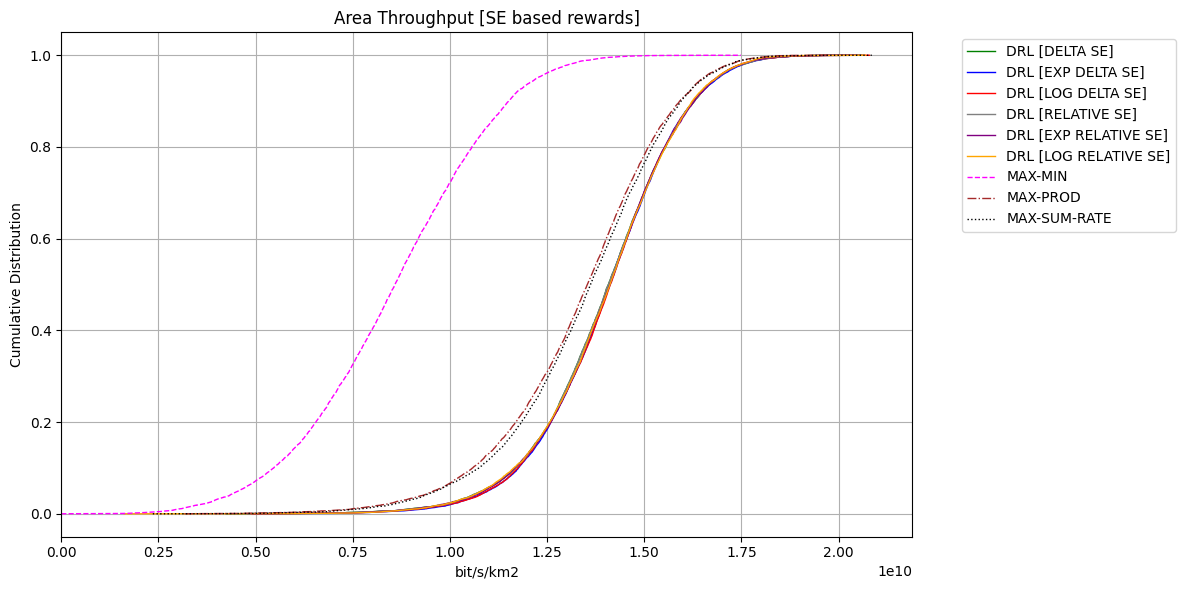

In [49]:
plot_cdf_pdf(data=ATHP_DATA_R_SE, title='Area Throughput [SE based rewards]', xlabel='bit/s/km2', operation=None, cumulative=True, save_plt=True, save_path='figures', xmin=0)

AUC for DRL [DELTA SINR]: 6146160610.02
AUC for DRL [EXP DELTA SINR]: 6804121948.10
AUC for DRL [LOG DELTA SINR]: 7055642936.90
AUC for DRL [RELATIVE SINR]: 6055910077.04
AUC for DRL [EXP RELATIVE SINR]: 6187735825.22
AUC for DRL [LOG RELATIVE SINR]: 6931810636.67
AUC for MAX-MIN: 8953098866.09
AUC for MAX-PROD: 6429101348.28
AUC for MAX-SUM-RATE: 7406170390.01


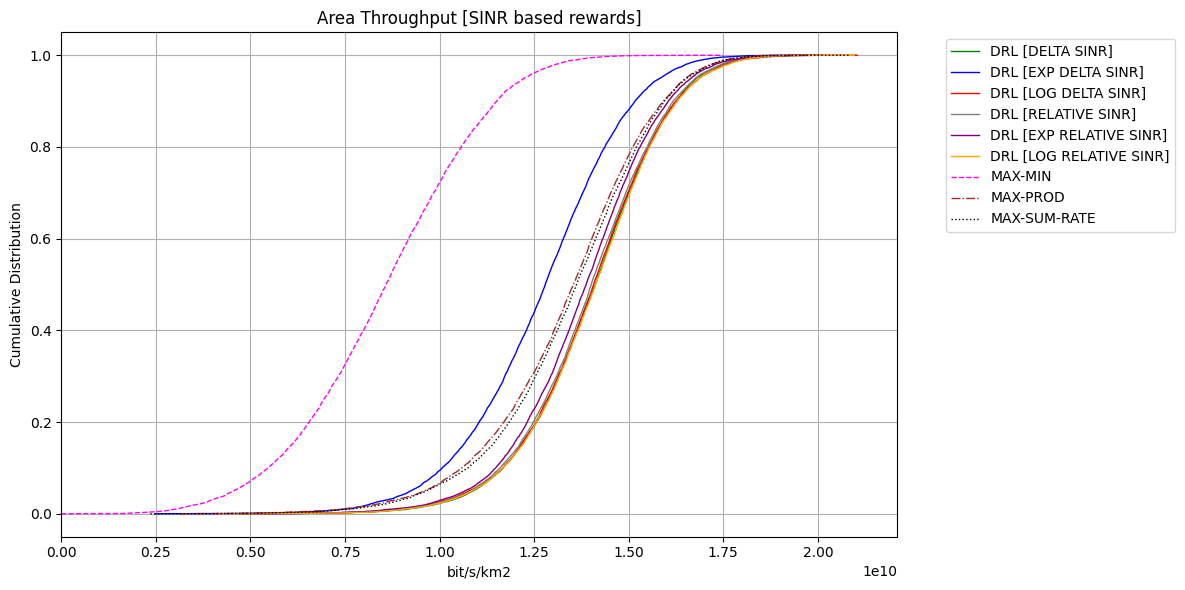

In [50]:
plot_cdf_pdf(data=ATHP_DATA_R_SINR, title='Area Throughput [SINR based rewards]', xlabel='bit/s/km2', operation=None, cumulative=True, save_plt=True, save_path='figures', xmin=0)

# Uplink Power

In [51]:
# load data from csv files
MODEL_DELTA_SE_POWERs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_POWERs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_POWERs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_POWERs.csv', index_col=0)
MODEL_LOG_DELTA_SE_POWERs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_POWERs.csv', index_col=0)
MODEL_RELATIVE_SE_POWERs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_POWERs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_POWERs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_POWERs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_POWERs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_POWERs.csv', index_col=0)
MODEL_DELTA_SINR_POWERs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_POWERs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_POWERs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_POWERs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_POWERs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_POWERs.csv', index_col=0)
MODEL_RELATIVE_SINR_POWERs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_POWERs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_POWERs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_POWERs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_POWERs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_POWERs.csv', index_col=0)

MAXMIN_POWERs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_POWERs.csv', index_col=0)
MAXPROD_POWERs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_POWERs.csv', index_col=0)
SUMRATE_POWERs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_POWERs.csv', index_col=0)

In [52]:
P_DATA_R_SE = {
    'MODEL_DELTA_SE_POWERs':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_POWERs,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_POWERs':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_POWERs,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SE_POWERs':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_POWERs,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_POWERs':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_POWERs,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_POWERs':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_POWERs,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_POWERs':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_POWERs,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_POWERs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_POWERs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_POWERs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_POWERs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_POWERs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_POWERs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

P_DATA_R_SINR = {
    'MODEL_DELTA_SINR_POWERs':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_POWERs,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_POWERs':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_POWERs,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_POWERs':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_POWERs,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_POWERs':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_POWERs,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_POWERs': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_POWERs,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_POWERs':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_POWERs,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_POWERs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_POWERs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_POWERs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_POWERs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_POWERs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_POWERs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

### Uplink Power

AUC for DRL [DELTA SE]: 50.31
AUC for DRL [EXP DELTA SE]: 47.68
AUC for DRL [LOG DELTA SE]: 49.23
AUC for DRL [RELATIVE SE]: 50.31
AUC for DRL [EXP RELATIVE SE]: 49.68
AUC for DRL [LOG RELATIVE SE]: 50.10
AUC for MAX-MIN: 92.05
AUC for MAX-PROD: 66.17
AUC for MAX-SUM-RATE: 62.96


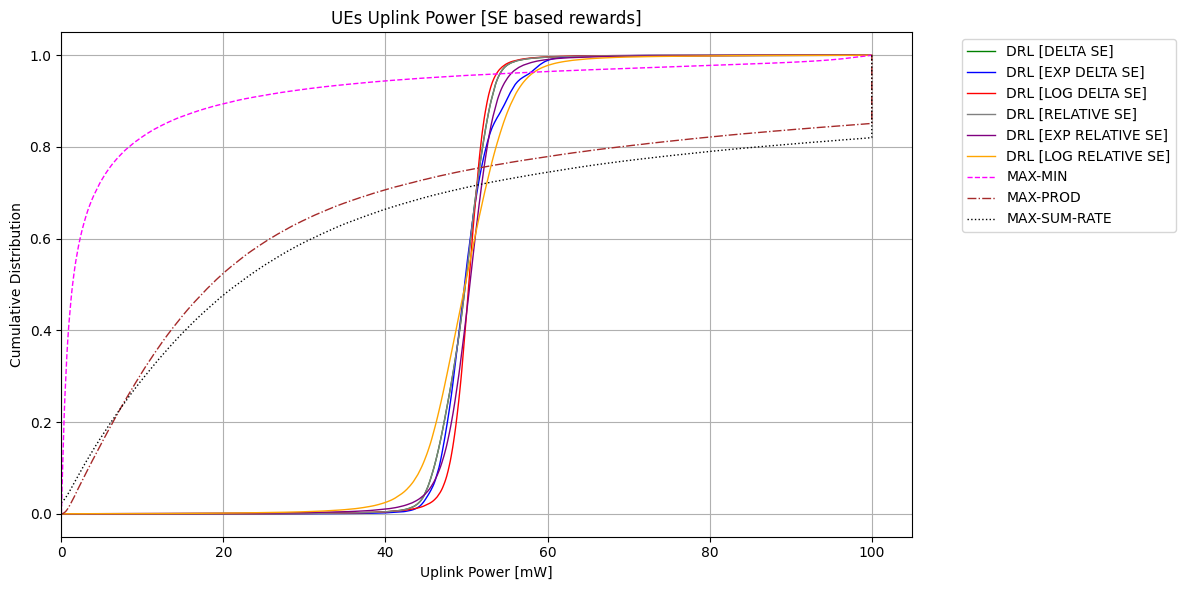

In [53]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Uplink Power [mW]', operation=None, cumulative=True, save_plt=True, save_path='figures', xmin=0)

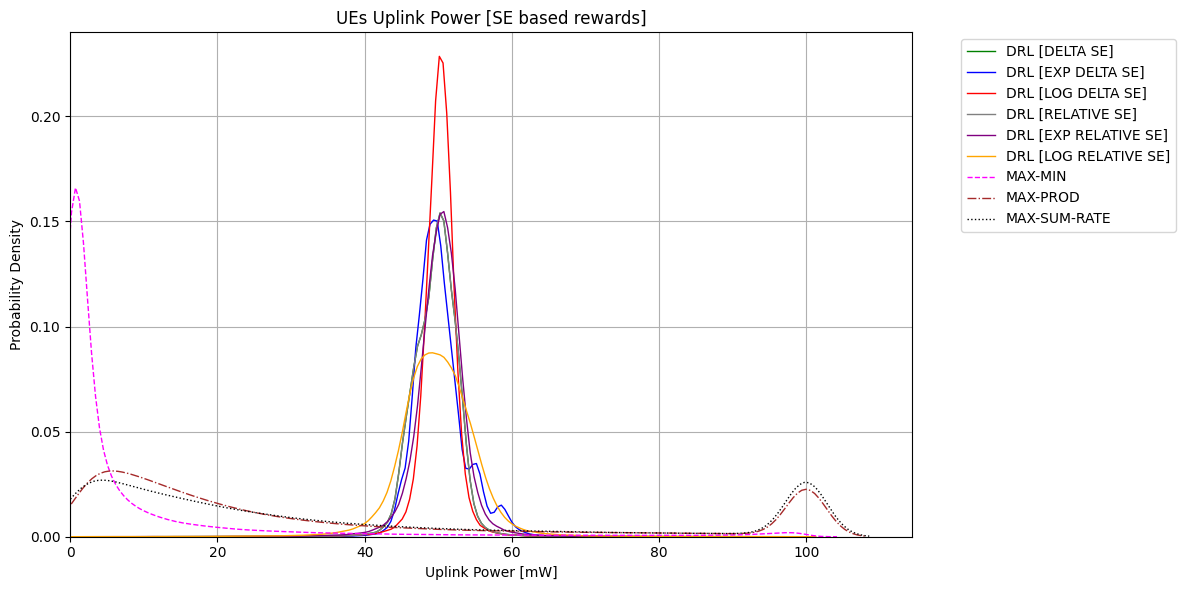

In [54]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Uplink Power [mW]', operation=None, cumulative=False, save_plt=True, save_path='figures', xmin=0)

AUC for DRL [DELTA SINR]: 49.82
AUC for DRL [EXP DELTA SINR]: 57.03
AUC for DRL [LOG DELTA SINR]: 33.61
AUC for DRL [RELATIVE SINR]: 48.53
AUC for DRL [EXP RELATIVE SINR]: 50.84
AUC for DRL [LOG RELATIVE SINR]: 49.61
AUC for MAX-MIN: 92.05
AUC for MAX-PROD: 66.17
AUC for MAX-SUM-RATE: 62.96


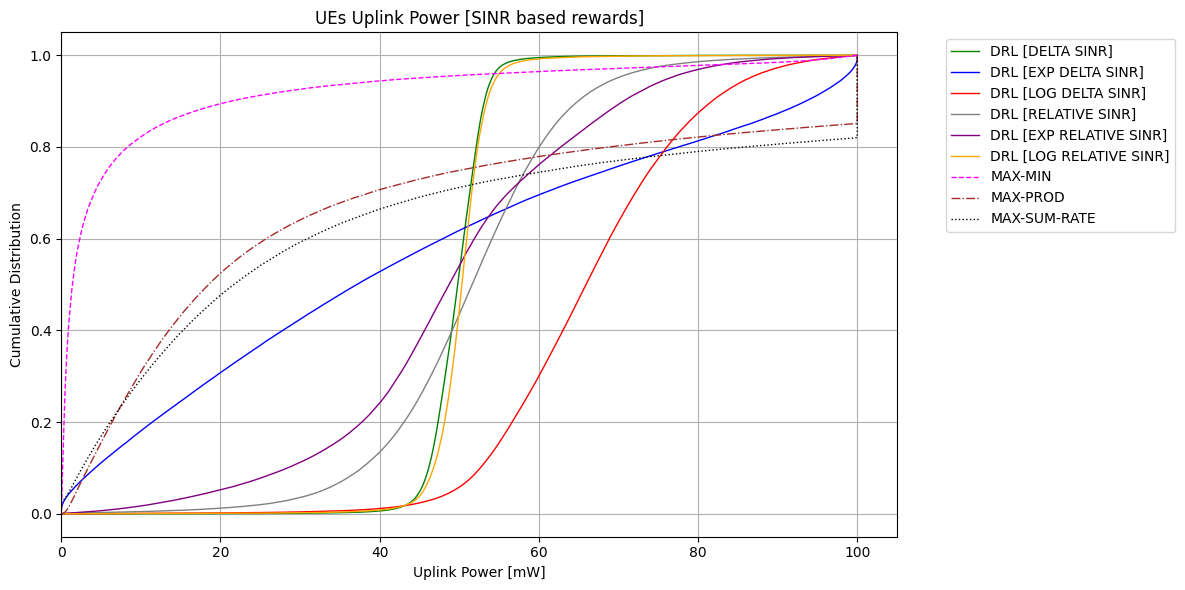

In [55]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation=None, cumulative=True, save_plt=True, save_path='figures', xmin=0)

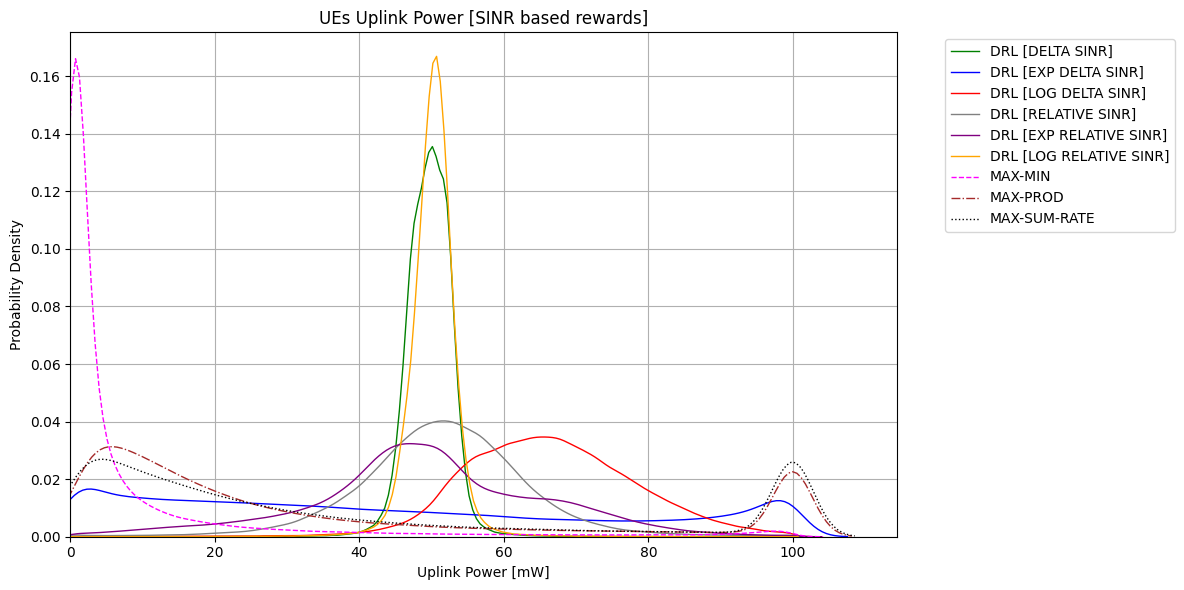

In [56]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation=None, cumulative=False, save_plt=True, save_path='figures', xmin=0)

### Mean Uplink Power

AUC for DRL [DELTA SE]: 8.69
AUC for DRL [EXP DELTA SE]: 3.67
AUC for DRL [LOG DELTA SE]: 4.54
AUC for DRL [RELATIVE SE]: 8.69
AUC for DRL [EXP RELATIVE SE]: 5.83
AUC for DRL [LOG RELATIVE SE]: 6.45
AUC for MAX-MIN: 24.22
AUC for MAX-PROD: 23.12
AUC for MAX-SUM-RATE: 25.95


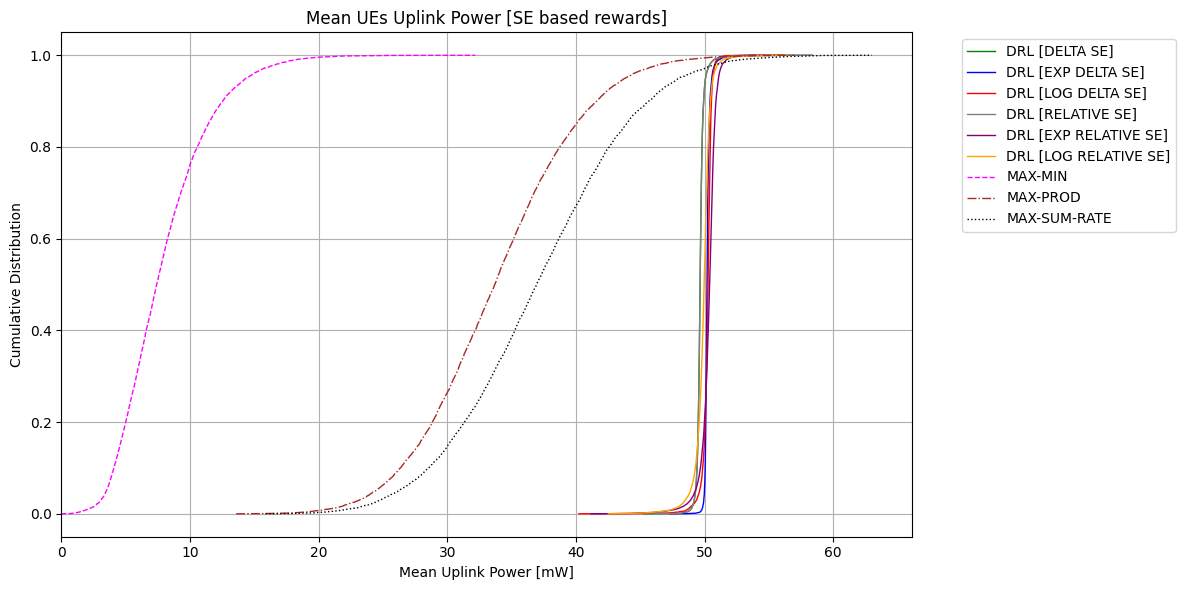

In [57]:
plot_cdf_pdf(data=P_DATA_R_SE, title='Mean UEs Uplink Power [SE based rewards]', xlabel='Mean Uplink Power [mW]', operation='mean', cumulative=True, save_plt=True, save_path='figures', xmin=0)

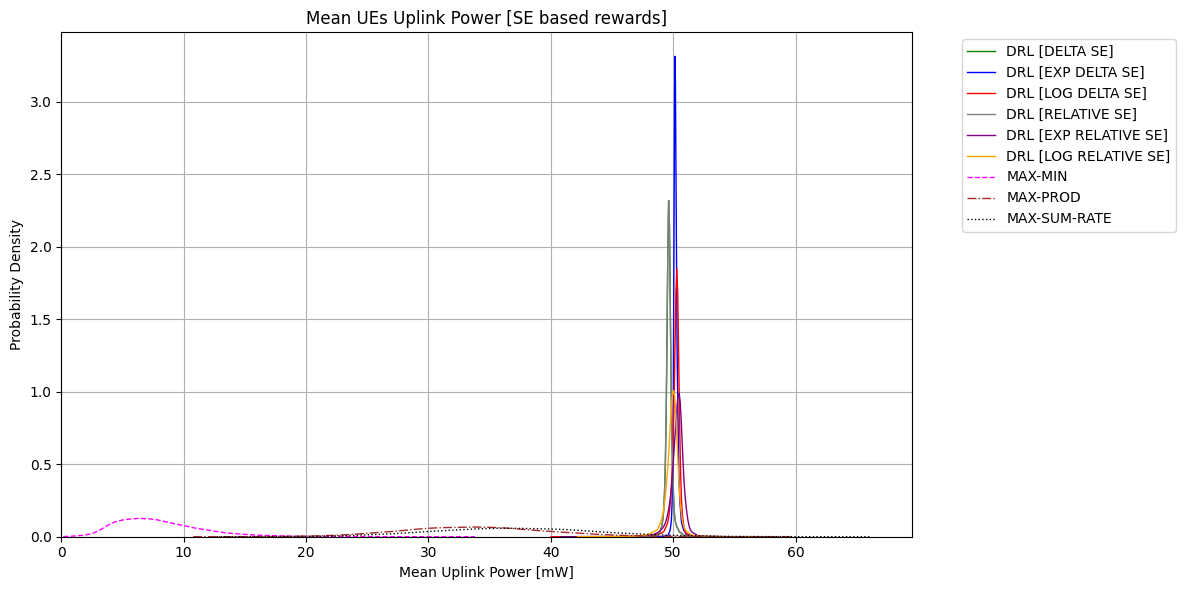

In [58]:
plot_cdf_pdf(data=P_DATA_R_SE, title='Mean UEs Uplink Power [SE based rewards]', xlabel='Mean Uplink Power [mW]', operation='mean', cumulative=False, save_plt=True, save_path='figures', xmin=0)

AUC for DRL [DELTA SINR]: 6.20
AUC for DRL [EXP DELTA SINR]: 15.23
AUC for DRL [LOG DELTA SINR]: 26.54
AUC for DRL [RELATIVE SINR]: 9.16
AUC for DRL [EXP RELATIVE SINR]: 10.13
AUC for DRL [LOG RELATIVE SINR]: 7.09
AUC for MAX-MIN: 24.22
AUC for MAX-PROD: 23.12
AUC for MAX-SUM-RATE: 25.95


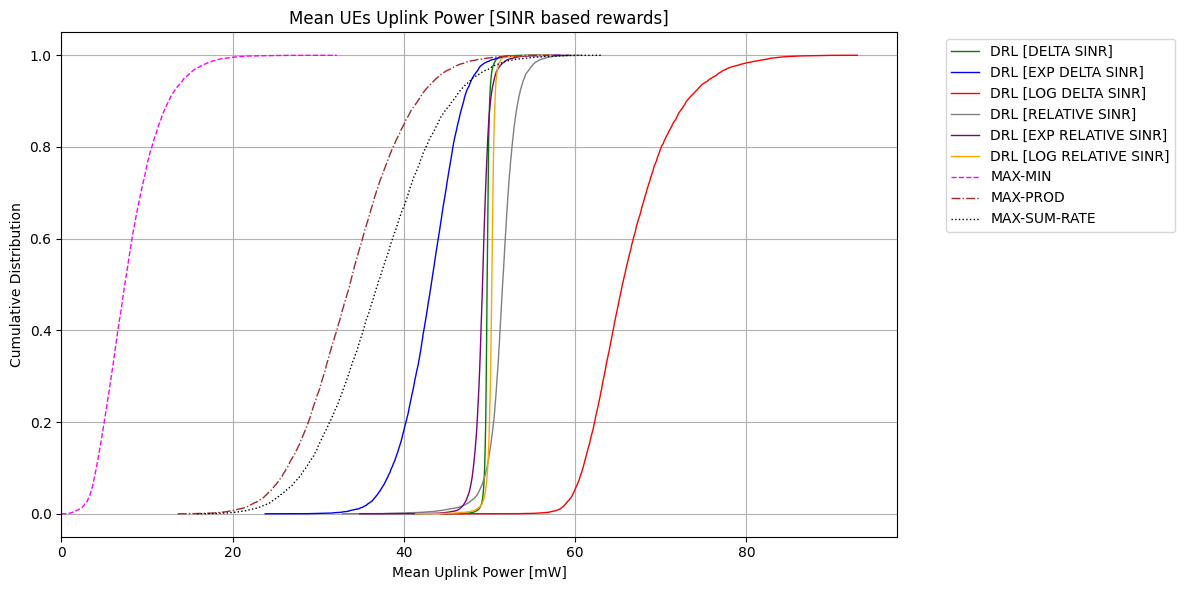

In [59]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='Mean UEs Uplink Power [SINR based rewards]', xlabel='Mean Uplink Power [mW]', operation='mean', cumulative=True, save_plt=True, save_path='figures', xmin=0)

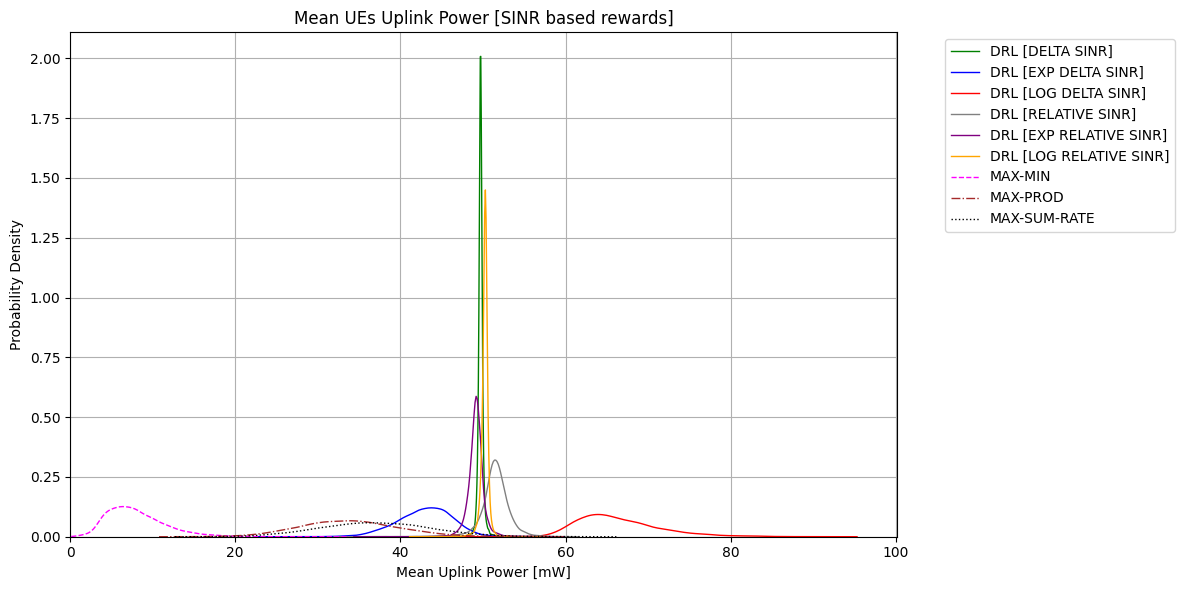

In [60]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='Mean UEs Uplink Power [SINR based rewards]', xlabel='Mean Uplink Power [mW]', operation='mean', cumulative=False, save_plt=True, save_path='figures', xmin=0)

### Min Uplink Power

AUC for DRL [DELTA SE]: 3.02
AUC for DRL [EXP DELTA SE]: 2.88
AUC for DRL [LOG DELTA SE]: 3.05
AUC for DRL [RELATIVE SE]: 3.02
AUC for DRL [EXP RELATIVE SE]: 4.84
AUC for DRL [LOG RELATIVE SE]: 6.08
AUC for MAX-MIN: 2.18
AUC for MAX-PROD: 11.34
AUC for MAX-SUM-RATE: 9.71


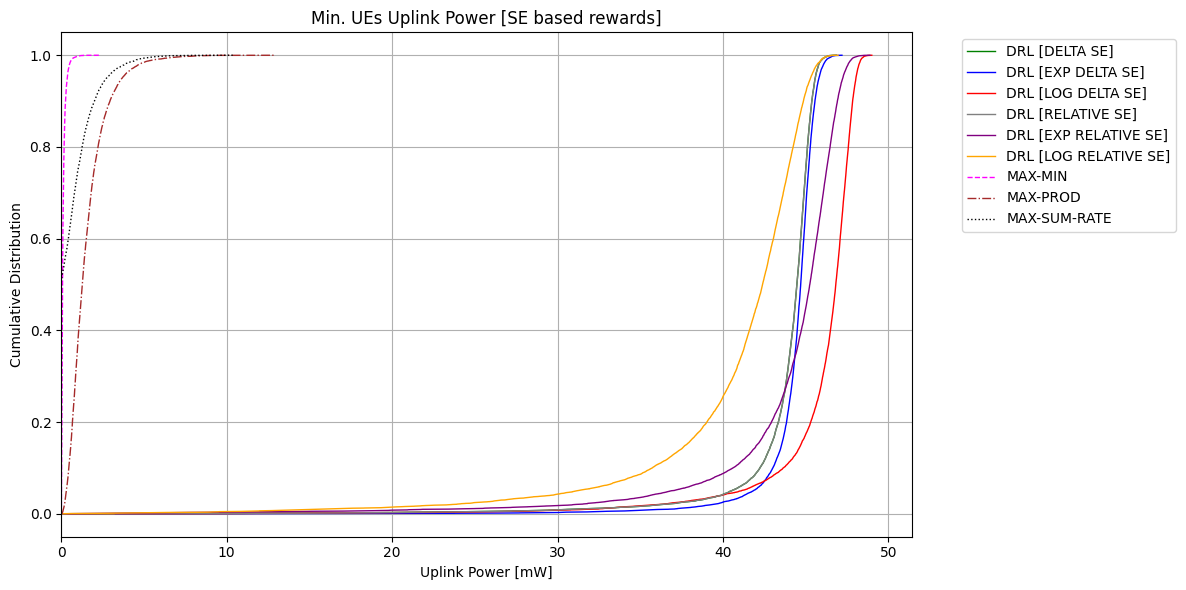

In [61]:
plot_cdf_pdf(data=P_DATA_R_SE, title='Min. UEs Uplink Power [SE based rewards]', xlabel='Uplink Power [mW]', operation='min', cumulative=True, save_plt=True, save_path='figures', xmin=0)

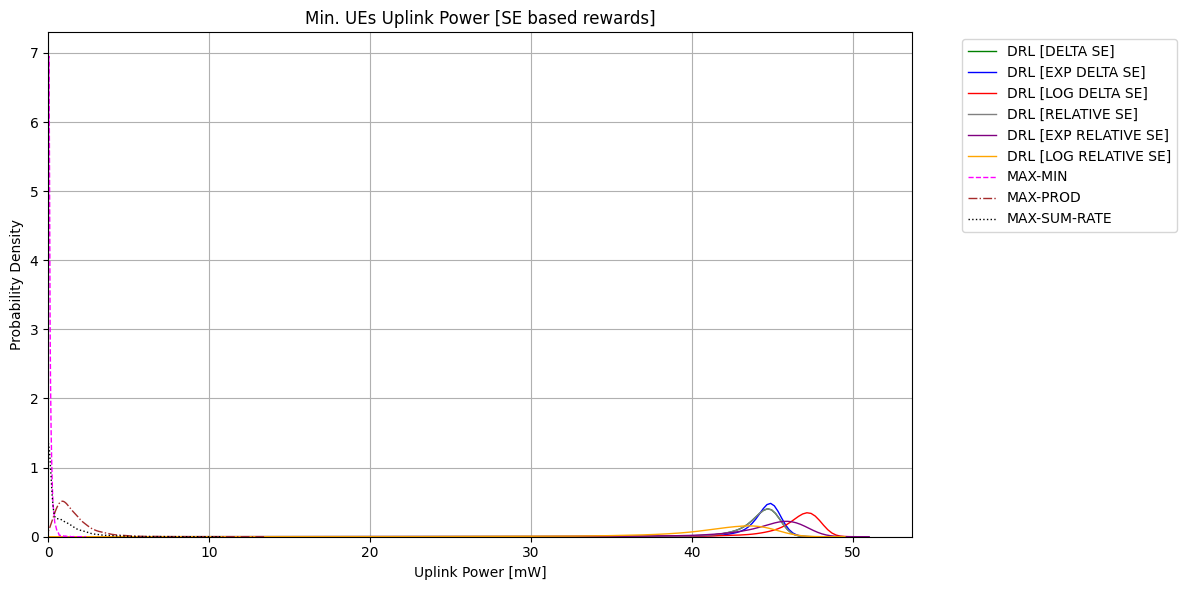

In [62]:
plot_cdf_pdf(data=P_DATA_R_SE, title='Min. UEs Uplink Power [SE based rewards]', xlabel='Uplink Power [mW]', operation='min', cumulative=False, save_plt=True, save_path='figures', xmin=0)

AUC for DRL [DELTA SINR]: 3.59
AUC for DRL [EXP DELTA SINR]: 24.29
AUC for DRL [LOG DELTA SINR]: 13.94
AUC for DRL [RELATIVE SINR]: 14.33
AUC for DRL [EXP RELATIVE SINR]: 18.57
AUC for DRL [LOG RELATIVE SINR]: 4.02
AUC for MAX-MIN: 2.18
AUC for MAX-PROD: 11.34
AUC for MAX-SUM-RATE: 9.71


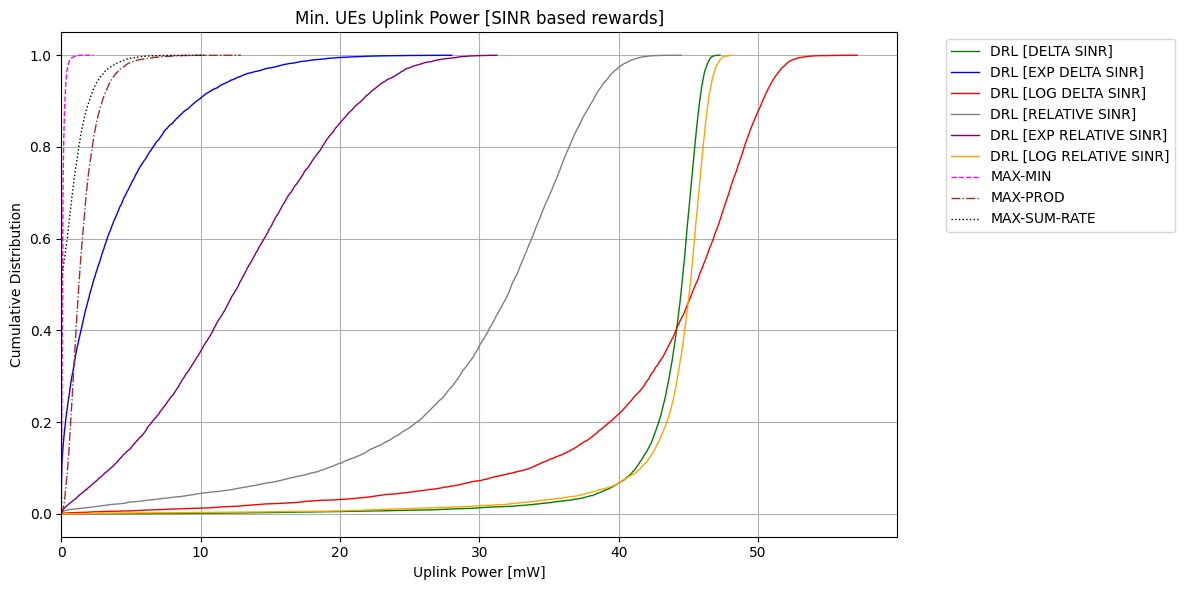

In [63]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='Min. UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation='min', cumulative=True, save_plt=True, save_path='figures', xmin=0)

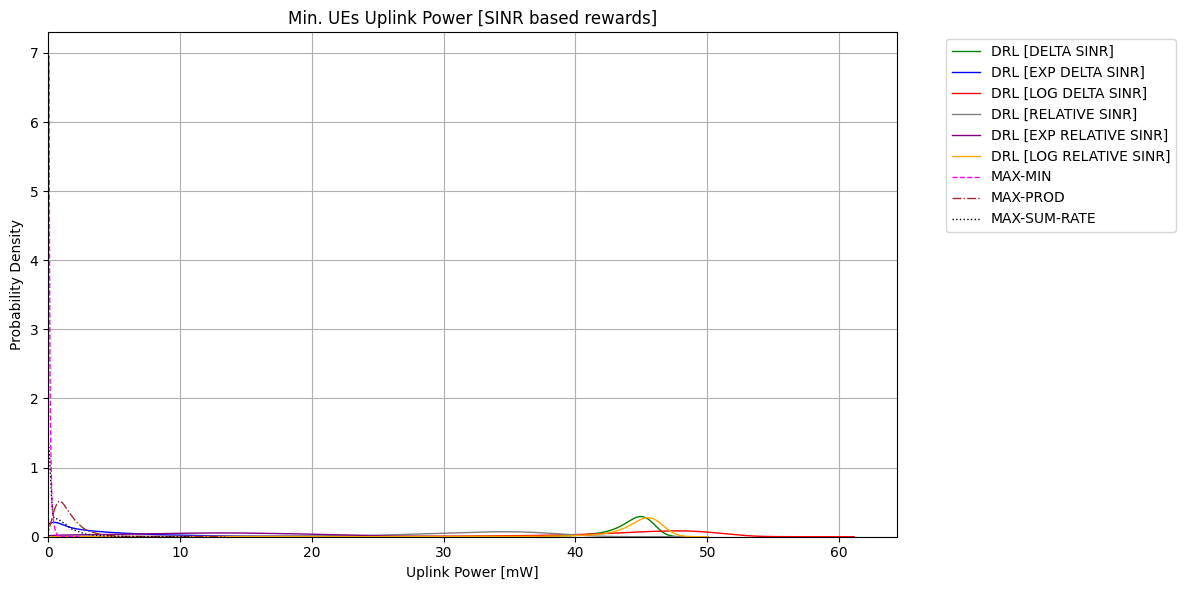

In [64]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='Min. UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation='min', cumulative=False, save_plt=True, save_path='figures', xmin=0)

### Max Uplink Power

AUC for DRL [DELTA SE]: 45.09
AUC for DRL [EXP DELTA SE]: 38.46
AUC for DRL [LOG DELTA SE]: 45.08
AUC for DRL [RELATIVE SE]: 45.09
AUC for DRL [EXP RELATIVE SE]: 43.69
AUC for DRL [LOG RELATIVE SE]: 40.61
AUC for MAX-MIN: 20.61
AUC for MAX-PROD: 0.00
AUC for MAX-SUM-RATE: 0.00


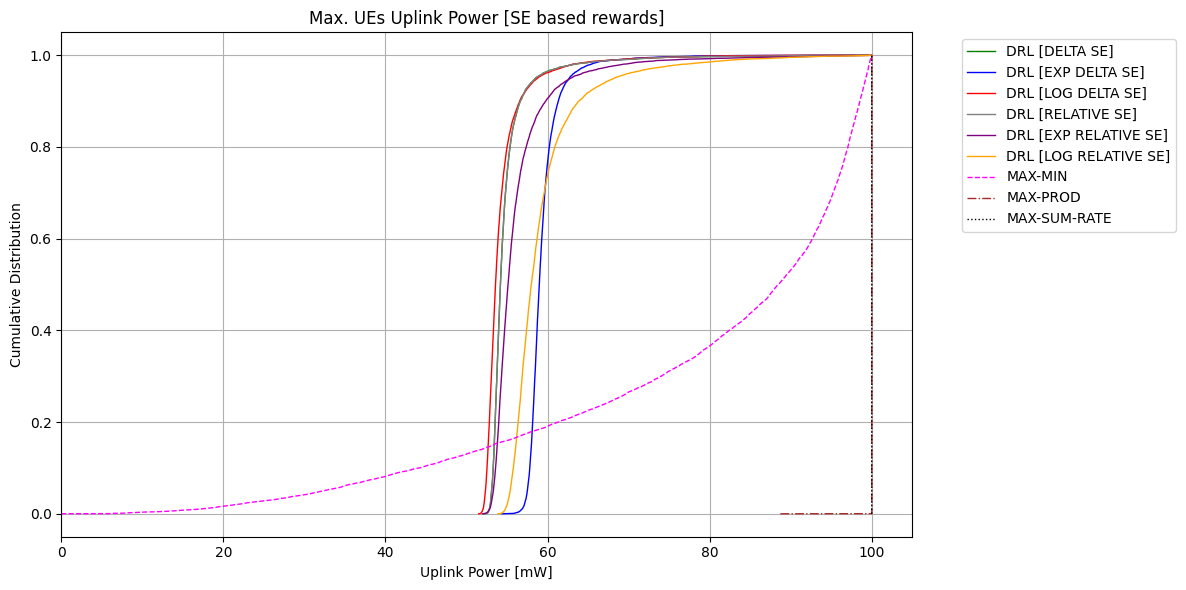

In [65]:
plot_cdf_pdf(data=P_DATA_R_SE, title='Max. UEs Uplink Power [SE based rewards]', xlabel='Uplink Power [mW]', operation='max', cumulative=True, save_plt=True, save_path='figures', xmin=0)

Data for SUMRATE_POWERs lacks variability, skipping PDF plot.


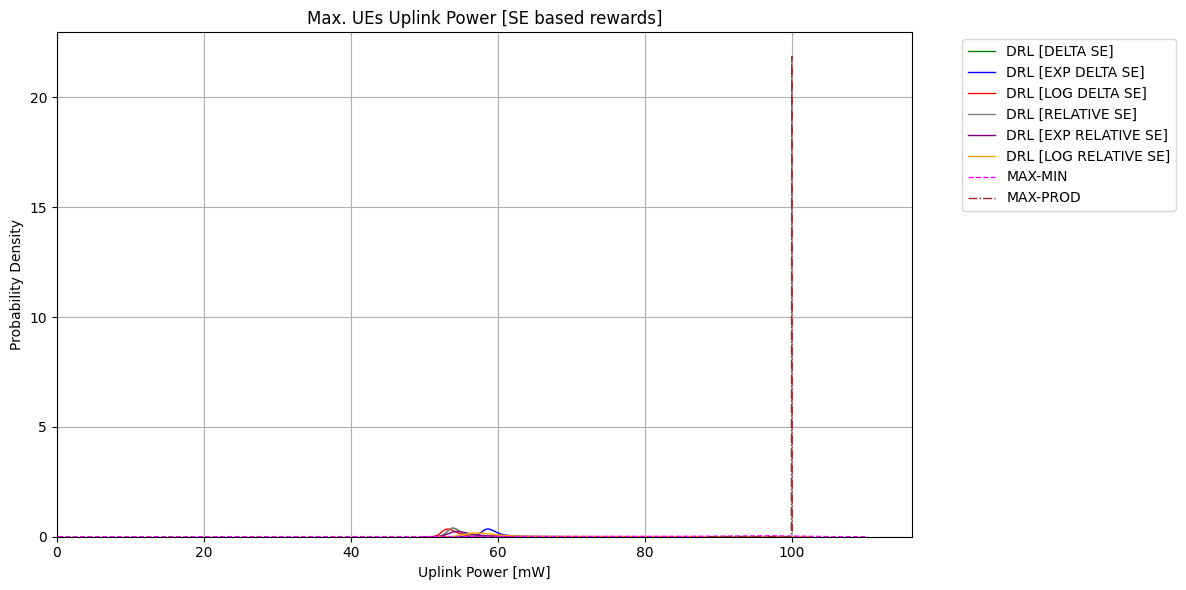

In [66]:
plot_cdf_pdf(data=P_DATA_R_SE, title='Max. UEs Uplink Power [SE based rewards]', xlabel='Uplink Power [mW]', operation='max', cumulative=False, save_plt=True, save_path='figures', xmin=0)

AUC for DRL [DELTA SINR]: 44.29
AUC for DRL [EXP DELTA SINR]: 3.02
AUC for DRL [LOG DELTA SINR]: 15.40
AUC for DRL [RELATIVE SINR]: 28.76
AUC for DRL [EXP RELATIVE SINR]: 21.72
AUC for DRL [LOG RELATIVE SINR]: 43.88
AUC for MAX-MIN: 20.61
AUC for MAX-PROD: 0.00
AUC for MAX-SUM-RATE: 0.00


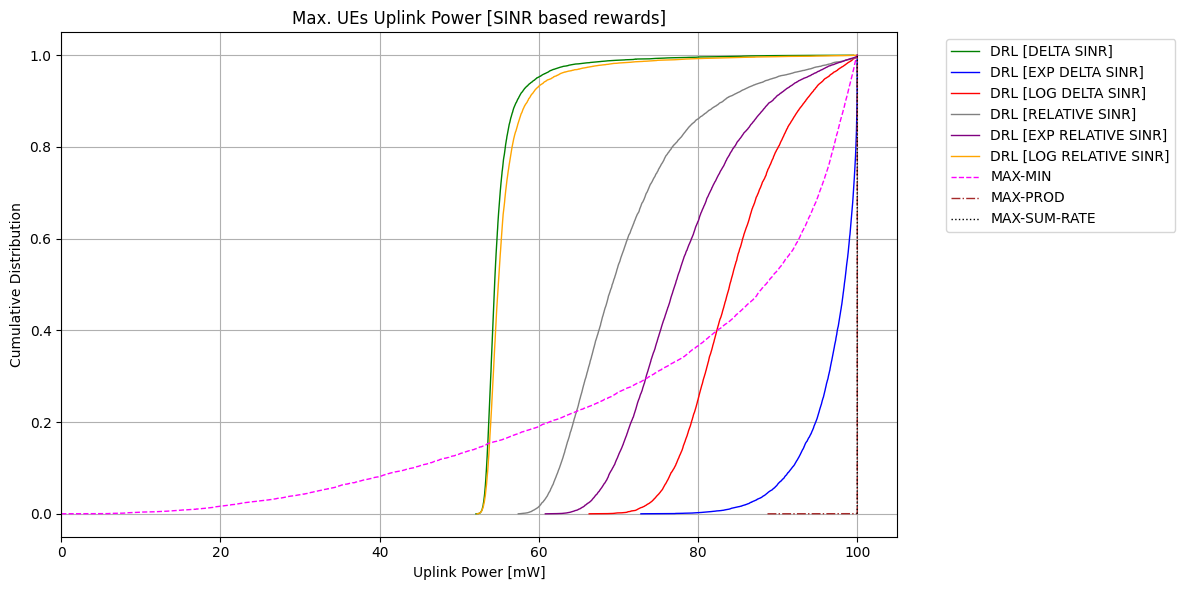

In [67]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='Max. UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation='max', cumulative=True, save_plt=True, save_path='figures', xmin=0)

Data for SUMRATE_POWERs lacks variability, skipping PDF plot.


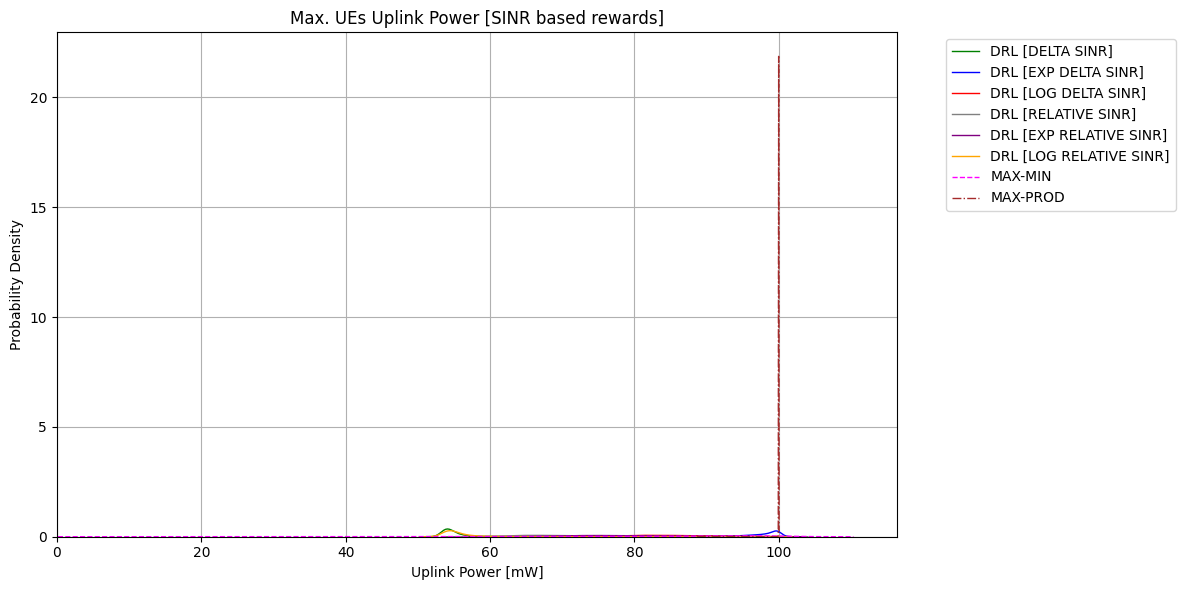

In [68]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='Max. UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation='max', cumulative=False, save_plt=True, save_path='figures', xmin=0)

### Sum Uplink Power

AUC for DRL [DELTA SE]: 278.18
AUC for DRL [EXP DELTA SE]: 117.37
AUC for DRL [LOG DELTA SE]: 145.37
AUC for DRL [RELATIVE SE]: 278.18
AUC for DRL [EXP RELATIVE SE]: 186.41
AUC for DRL [LOG RELATIVE SE]: 206.38
AUC for MAX-MIN: 775.13
AUC for MAX-PROD: 739.97
AUC for MAX-SUM-RATE: 830.54


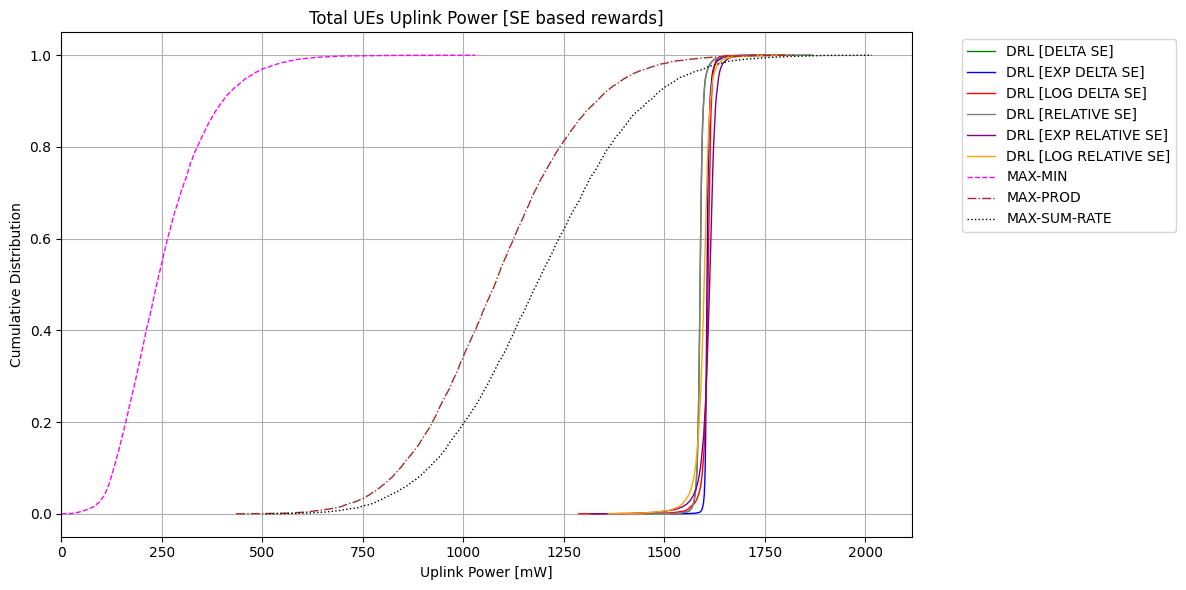

In [69]:
plot_cdf_pdf(data=P_DATA_R_SE, title='Total UEs Uplink Power [SE based rewards]', xlabel='Uplink Power [mW]', operation='sum', cumulative=True, save_plt=True, save_path='figures', xmin=0)

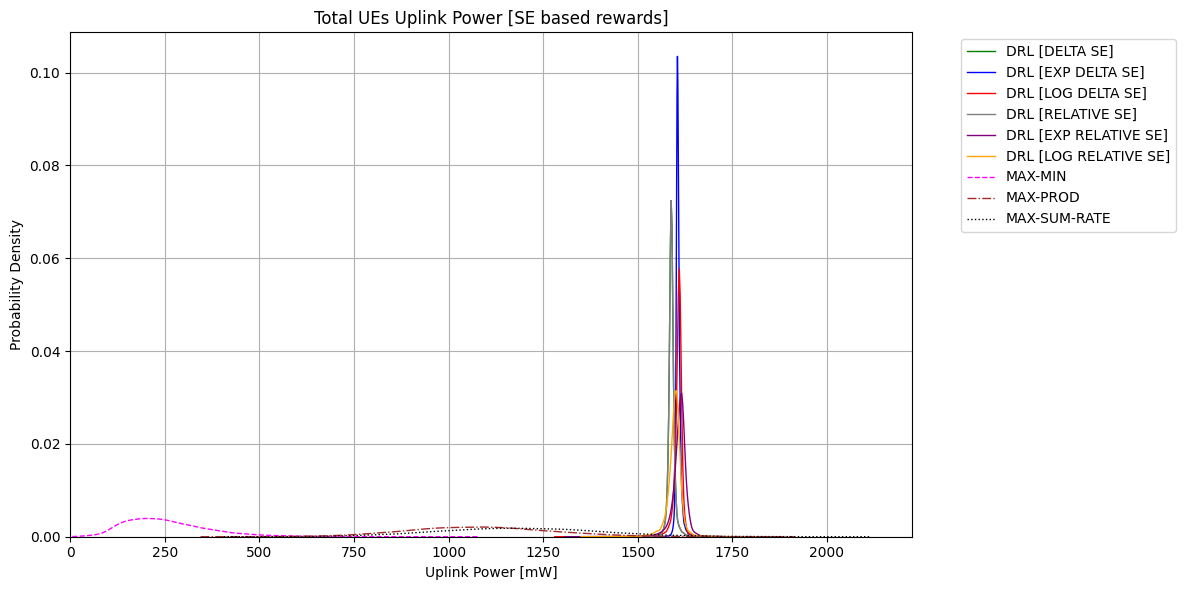

In [70]:
plot_cdf_pdf(data=P_DATA_R_SE, title='Total UEs Uplink Power [SE based rewards]', xlabel='Uplink Power [mW]', operation='sum', cumulative=False, save_plt=True, save_path='figures', xmin=0)

AUC for DRL [DELTA SINR]: 198.47
AUC for DRL [EXP DELTA SINR]: 487.41
AUC for DRL [LOG DELTA SINR]: 849.28
AUC for DRL [RELATIVE SINR]: 293.23
AUC for DRL [EXP RELATIVE SINR]: 324.28
AUC for DRL [LOG RELATIVE SINR]: 226.76
AUC for MAX-MIN: 775.13
AUC for MAX-PROD: 739.97
AUC for MAX-SUM-RATE: 830.54


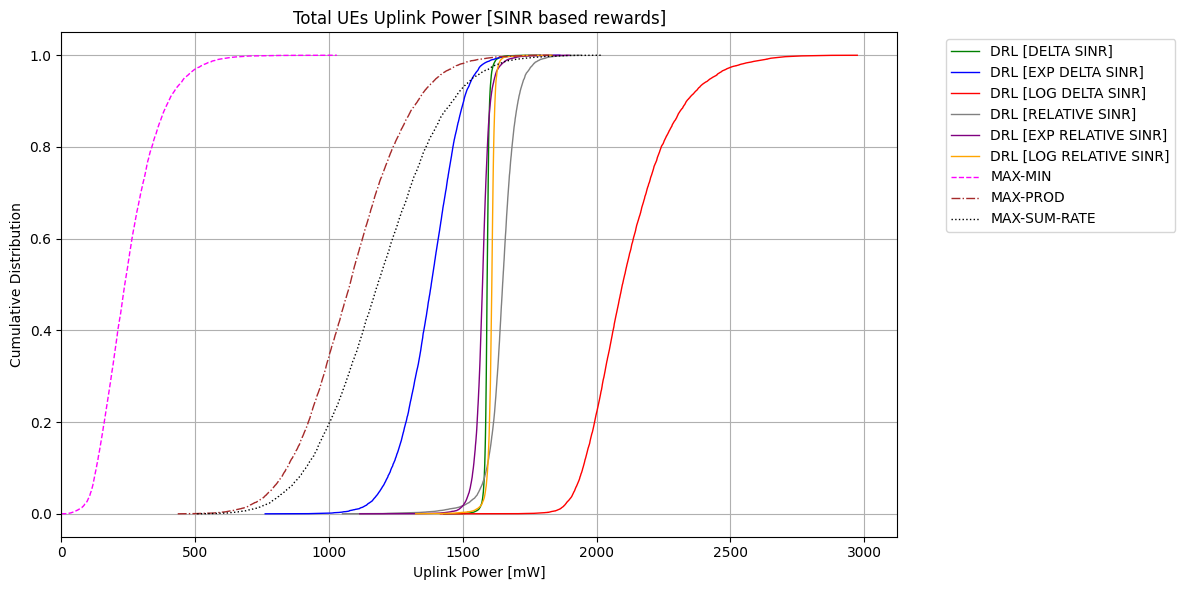

In [71]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='Total UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation='sum', cumulative=True, save_plt=True, save_path='figures', xmin=0)

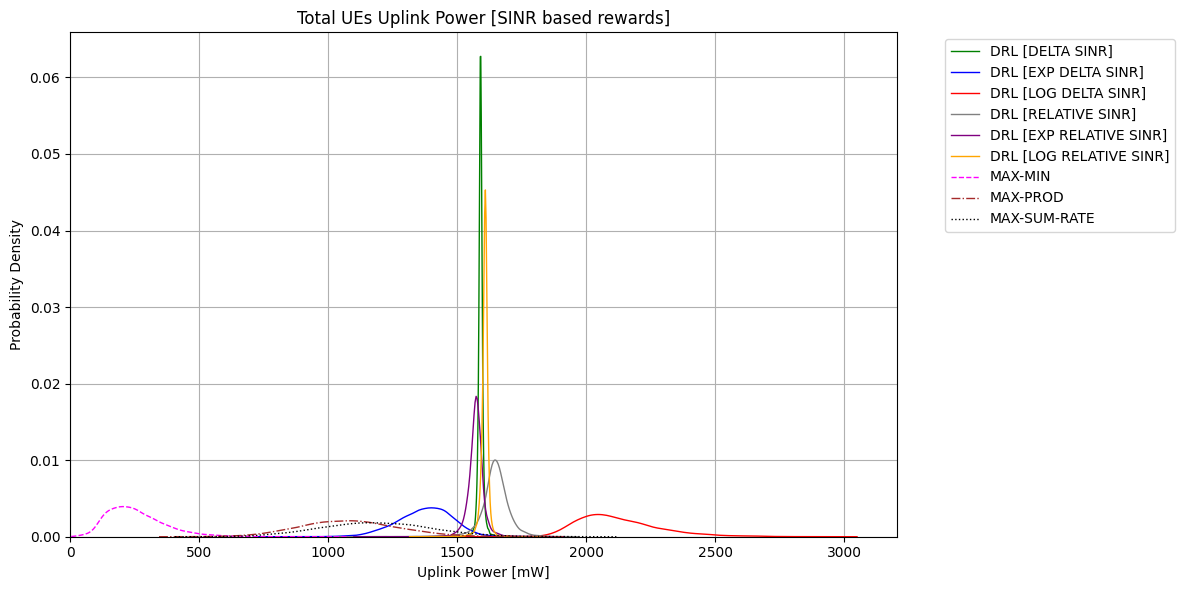

In [72]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='Total UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation='sum', cumulative=False, save_plt=True, save_path='figures', xmin=0)

# SINR

In [19]:
# load data from csv files
MODEL_DELTA_SE_SINRs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_SINRs.csv', index_col=0)
MODEL_LOG_DELTA_SE_SINRs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_SINRs.csv', index_col=0)
MODEL_RELATIVE_SE_SINRs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_SINRs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_SINRs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_SINRs.csv', index_col=0)
MODEL_DELTA_SINR_SINRs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SINRs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_SINRs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_RELATIVE_SINR_SINRs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SINRs.csv', index_col=0)

MAXMIN_SINRs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SINRs.csv', index_col=0)
MAXPROD_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SINRs.csv', index_col=0)
SUMRATE_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SINRs.csv', index_col=0)

In [20]:
SINR_DATA_R_SE = {
    'MODEL_DELTA_SE_SINRs':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_SINRs,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_SINRs':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_SINRs,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SE_SINRs':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_SINRs,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_SINRs':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_SINRs,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_SINRs':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_SINRs,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_SINRs':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_SINRs,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SINRs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SINRs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SINRs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SINRs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SINRs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SINRs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

SINR_DATA_R_SINR = {
    'MODEL_DELTA_SINR_SINRs':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_SINRs,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_SINRs':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_SINRs,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_SINRs':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_SINRs,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_SINRs':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_SINRs,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_SINRs': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_SINRs,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_SINRs':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_SINRs,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SINRs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SINRs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SINRs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SINRs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SINRs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SINRs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

### SINR

AUC for DRL [DELTA SE]: 8.10
AUC for DRL [EXP DELTA SE]: 8.06
AUC for DRL [LOG DELTA SE]: 7.88
AUC for DRL [RELATIVE SE]: 8.10
AUC for DRL [EXP RELATIVE SE]: 8.06
AUC for DRL [LOG RELATIVE SE]: 7.73
AUC for MAX-MIN: 17.27
AUC for MAX-PROD: 11.96
AUC for MAX-SUM-RATE: 12.47


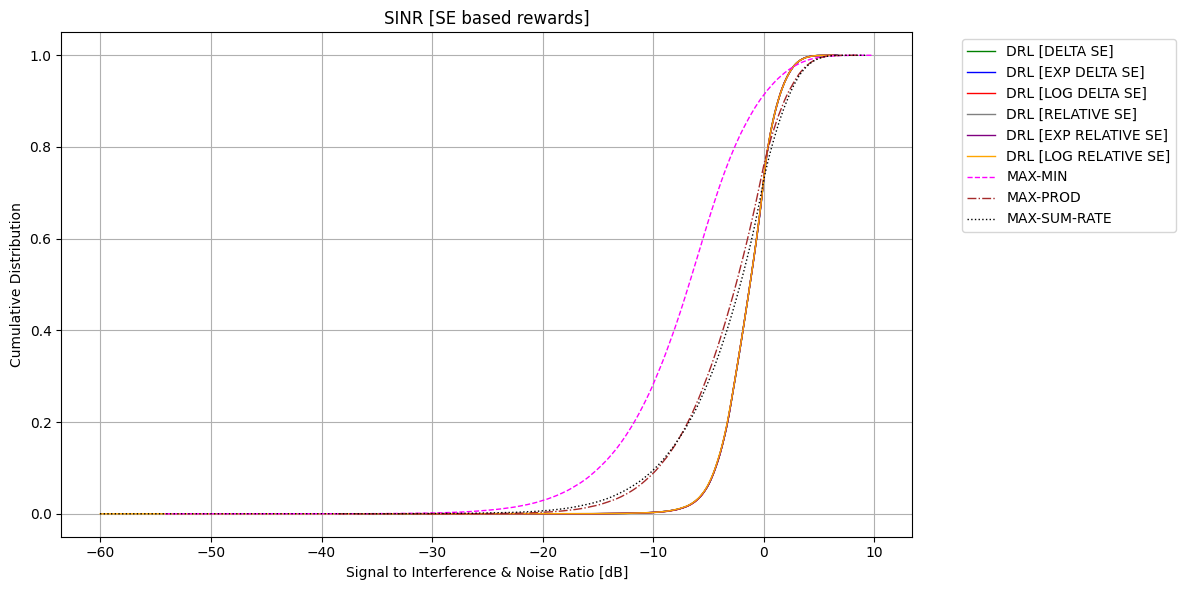

In [21]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation=None, cumulative=True, save_plt=True, save_path='figures', convert_to_db=True)

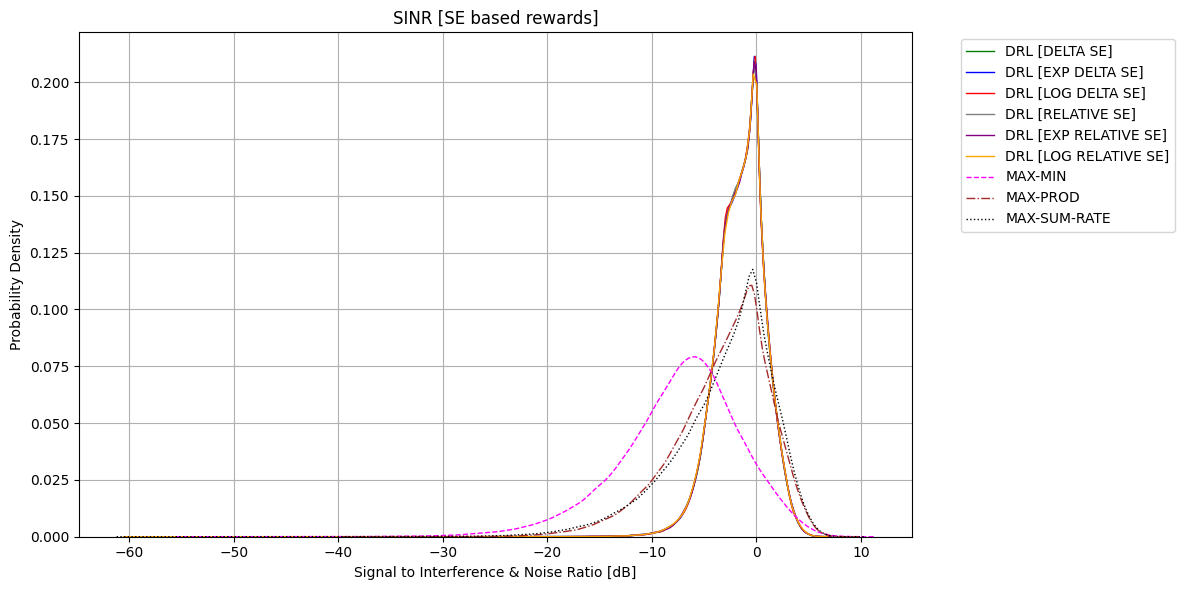

In [77]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation=None, cumulative=False, save_plt=True, save_path='figures', convert_to_db=True)

AUC for DRL [DELTA SINR]: 7.98
AUC for DRL [EXP DELTA SINR]: 11.84
AUC for DRL [LOG DELTA SINR]: 8.98
AUC for DRL [RELATIVE SINR]: 8.28
AUC for DRL [EXP RELATIVE SINR]: 8.74
AUC for DRL [LOG RELATIVE SINR]: 7.97
AUC for MAX-MIN: 17.27
AUC for MAX-PROD: 11.96
AUC for MAX-SUM-RATE: 12.47


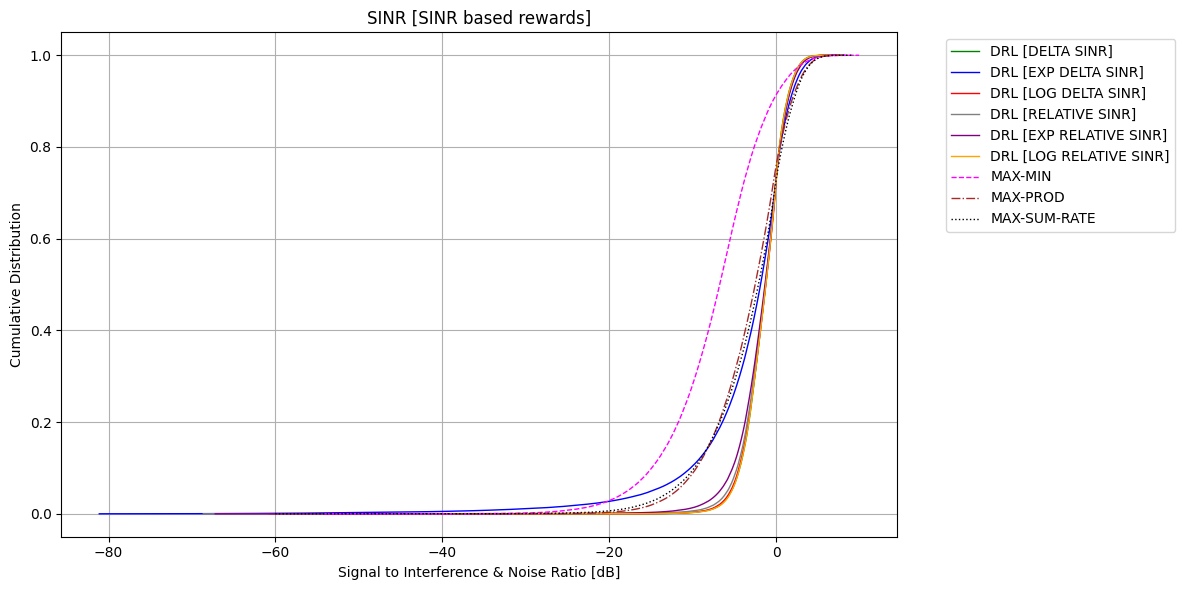

In [78]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation=None, cumulative=True, save_plt=True, save_path='figures', convert_to_db=True)

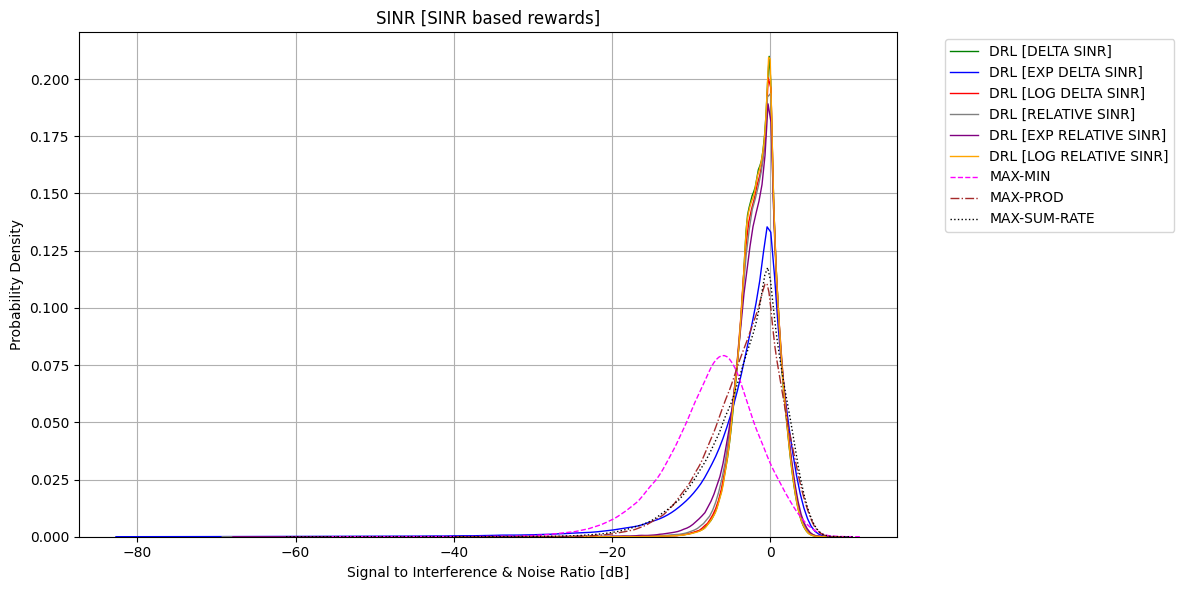

In [79]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation=None, cumulative=False, save_plt=True, save_path='figures', convert_to_db=True)

### Mean SINR

AUC for DRL [DELTA SE]: 2.04
AUC for DRL [EXP DELTA SE]: 1.99
AUC for DRL [LOG DELTA SE]: 2.06
AUC for DRL [RELATIVE SE]: 2.04
AUC for DRL [EXP RELATIVE SE]: 2.00
AUC for DRL [LOG RELATIVE SE]: 1.99
AUC for MAX-MIN: 5.60
AUC for MAX-PROD: 2.71
AUC for MAX-SUM-RATE: 2.51


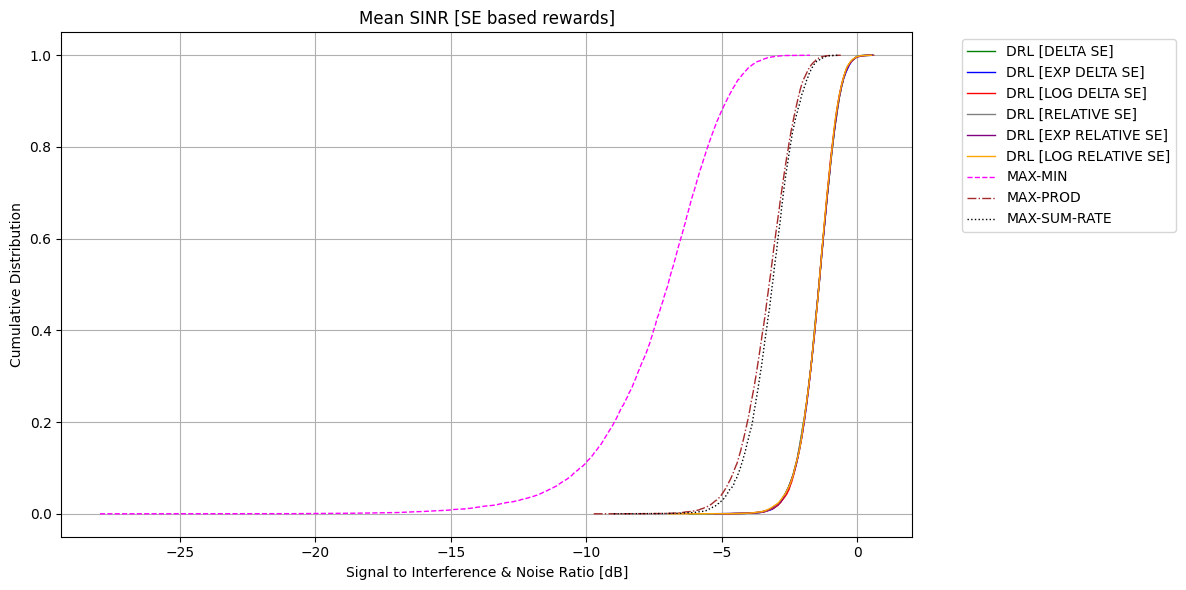

In [80]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='Mean SINR [SE based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='mean', cumulative=True, save_plt=True, save_path='figures', convert_to_db=True)

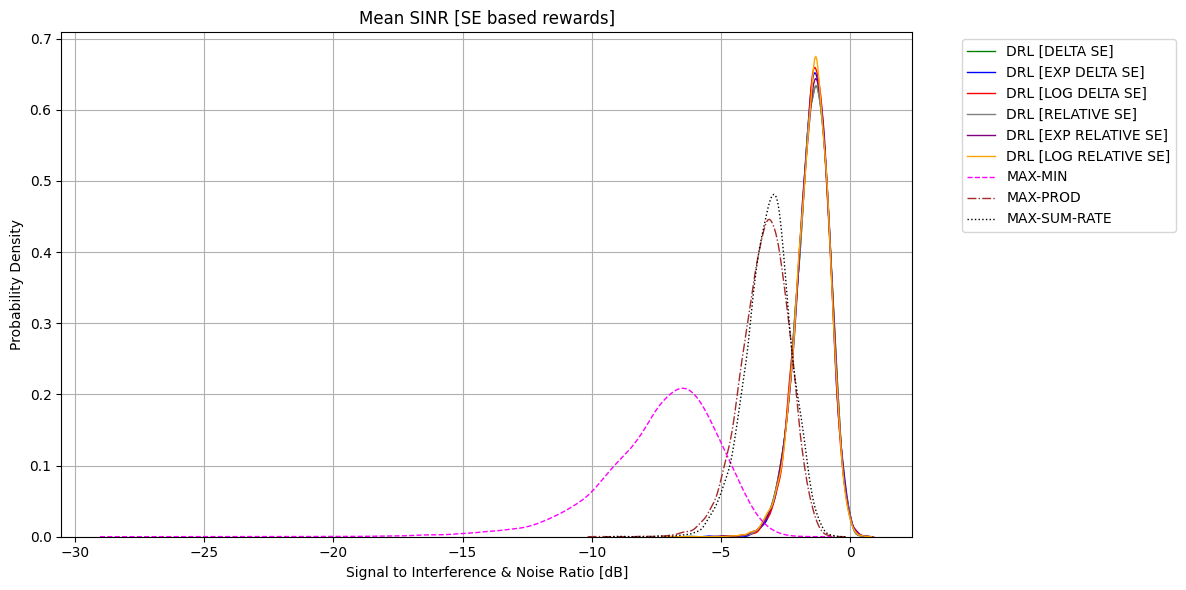

In [81]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='Mean SINR [SE based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='mean', cumulative=False, save_plt=True, save_path='figures', convert_to_db=True)

AUC for DRL [DELTA SINR]: 1.94
AUC for DRL [EXP DELTA SINR]: 3.39
AUC for DRL [LOG DELTA SINR]: 2.17
AUC for DRL [RELATIVE SINR]: 1.98
AUC for DRL [EXP RELATIVE SINR]: 1.96
AUC for DRL [LOG RELATIVE SINR]: 2.22
AUC for MAX-MIN: 5.60
AUC for MAX-PROD: 2.71
AUC for MAX-SUM-RATE: 2.51


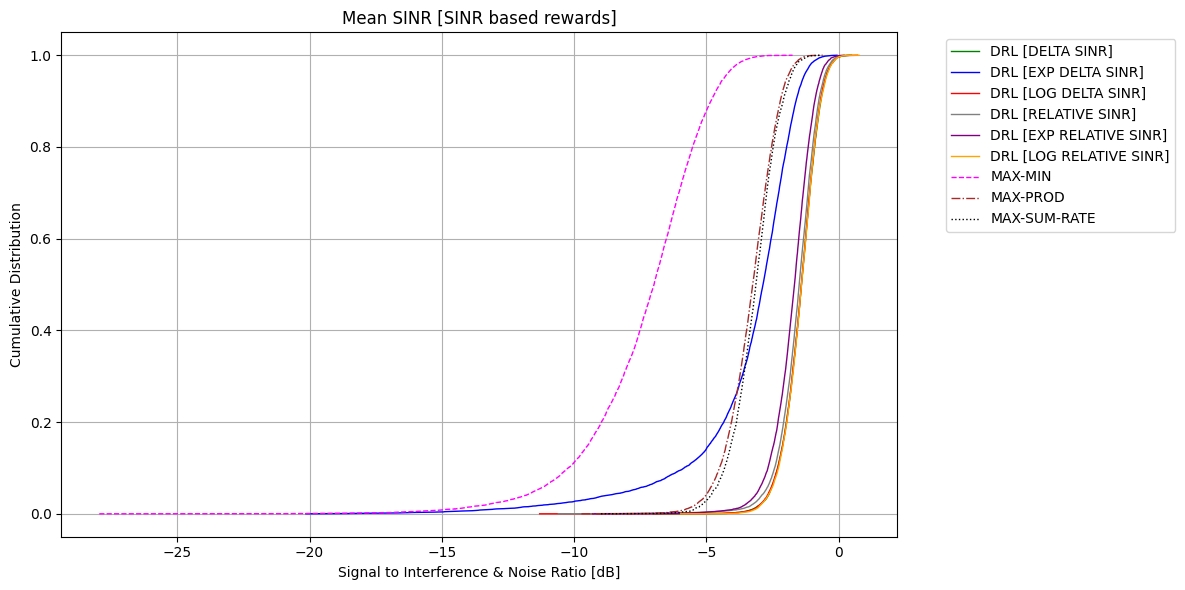

In [82]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='Mean SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='mean', cumulative=True, save_plt=True, save_path='figures', convert_to_db=True)

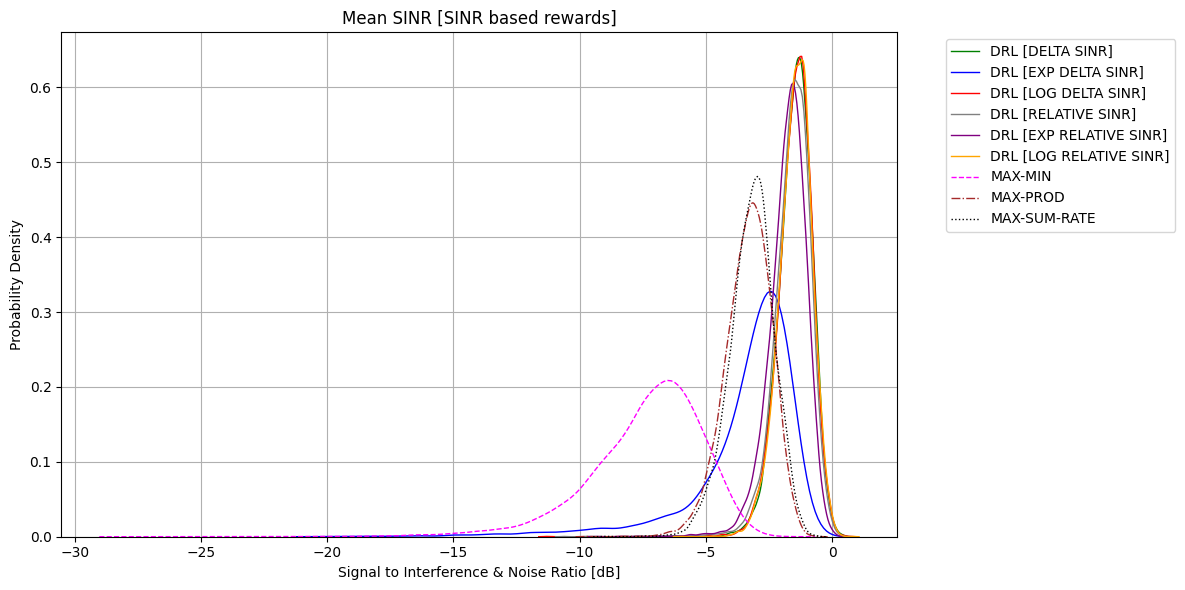

In [83]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='Mean SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='mean', cumulative=False, save_plt=True, save_path='figures', convert_to_db=True)

### Min SINR

AUC for DRL [DELTA SE]: 4.91
AUC for DRL [EXP DELTA SE]: 4.74
AUC for DRL [LOG DELTA SE]: 4.82
AUC for DRL [RELATIVE SE]: 4.91
AUC for DRL [EXP RELATIVE SE]: 5.21
AUC for DRL [LOG RELATIVE SE]: 4.85
AUC for MAX-MIN: 12.88
AUC for MAX-PROD: 10.09
AUC for MAX-SUM-RATE: 10.75


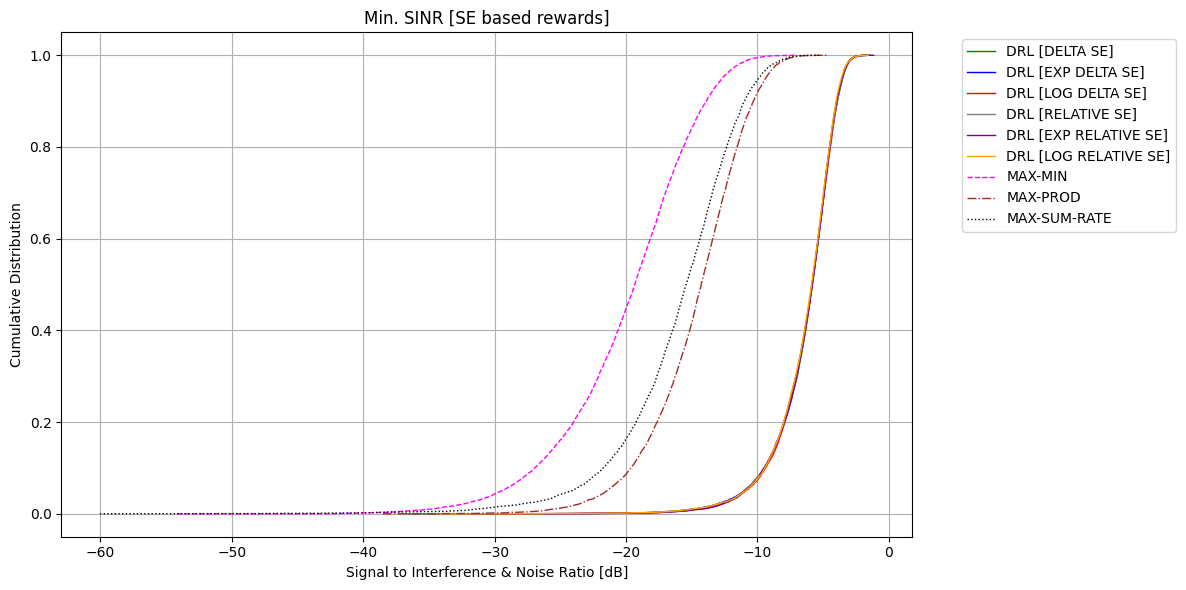

In [84]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='Min. SINR [SE based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='min', cumulative=True, save_plt=True, save_path='figures', convert_to_db=True)

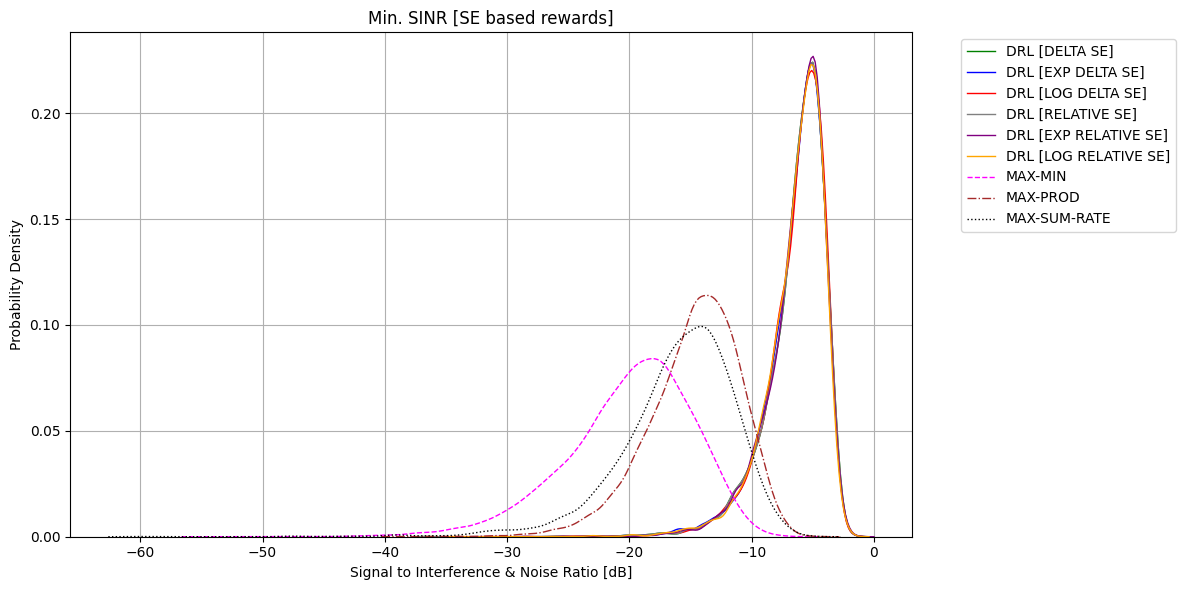

In [85]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='Min. SINR [SE based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='min', cumulative=False, save_plt=True, save_path='figures', convert_to_db=True)

AUC for DRL [DELTA SINR]: 4.70
AUC for DRL [EXP DELTA SINR]: 13.47
AUC for DRL [LOG DELTA SINR]: 4.99
AUC for DRL [RELATIVE SINR]: 5.23
AUC for DRL [EXP RELATIVE SINR]: 6.94
AUC for DRL [LOG RELATIVE SINR]: 4.41
AUC for MAX-MIN: 12.88
AUC for MAX-PROD: 10.09
AUC for MAX-SUM-RATE: 10.75


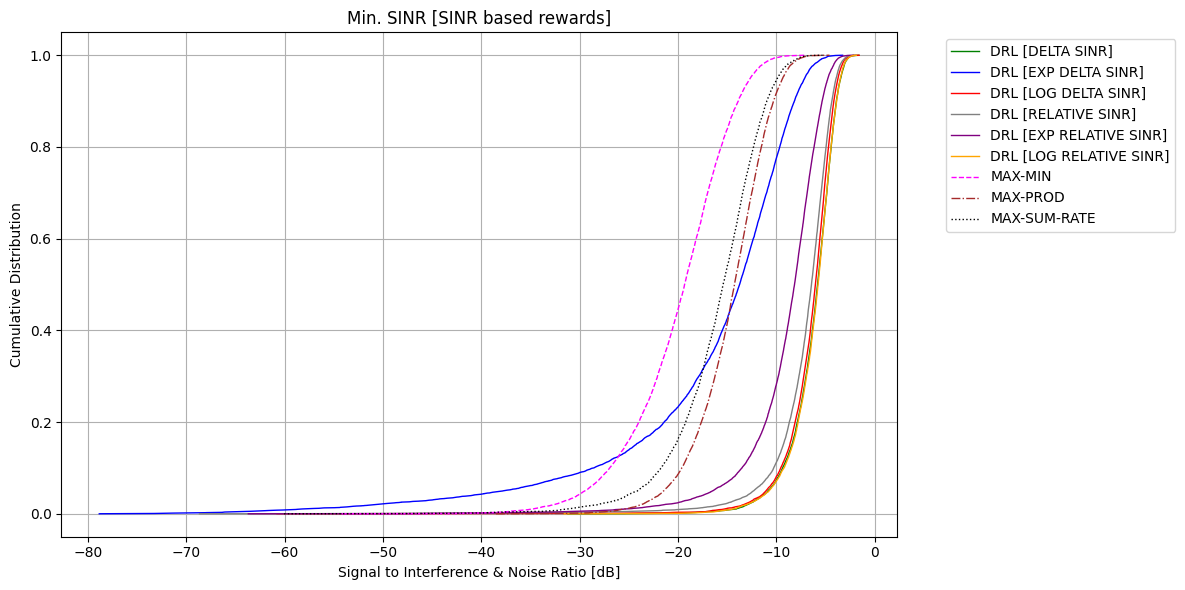

In [86]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='Min. SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='min', cumulative=True, save_plt=True, save_path='figures', convert_to_db=True)

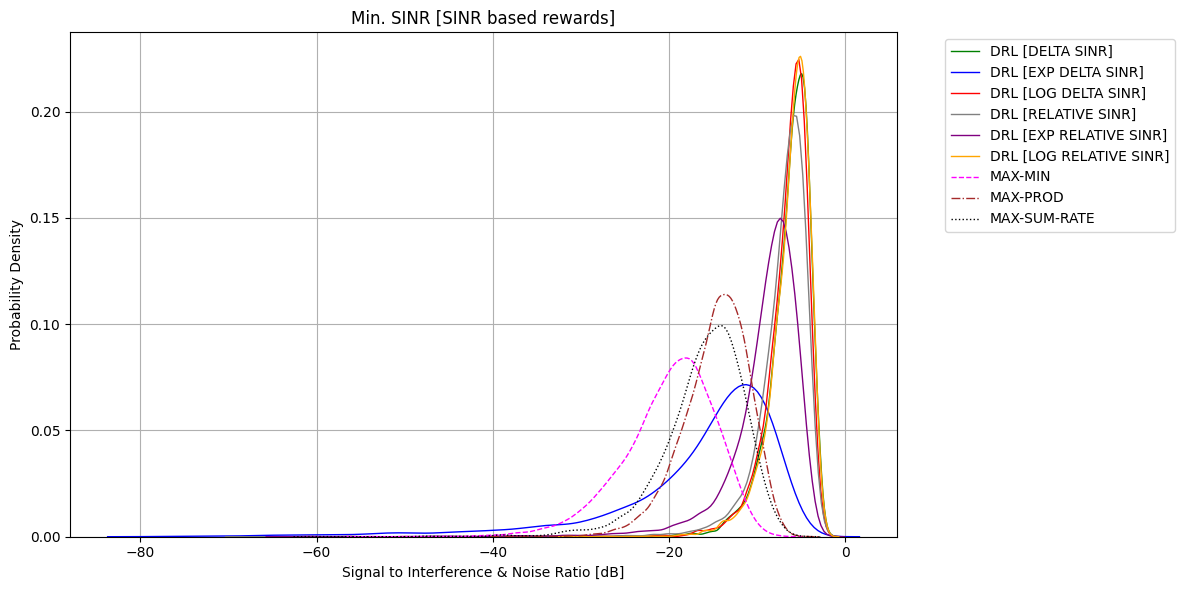

In [87]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='Min. SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='min', cumulative=False, save_plt=True, save_path='figures', convert_to_db=True)

### Max SINR

AUC for DRL [DELTA SE]: 3.87
AUC for DRL [EXP DELTA SE]: 3.81
AUC for DRL [LOG DELTA SE]: 3.64
AUC for DRL [RELATIVE SE]: 3.87
AUC for DRL [EXP RELATIVE SE]: 3.82
AUC for DRL [LOG RELATIVE SE]: 3.47
AUC for MAX-MIN: 6.91
AUC for MAX-PROD: 4.72
AUC for MAX-SUM-RATE: 4.31


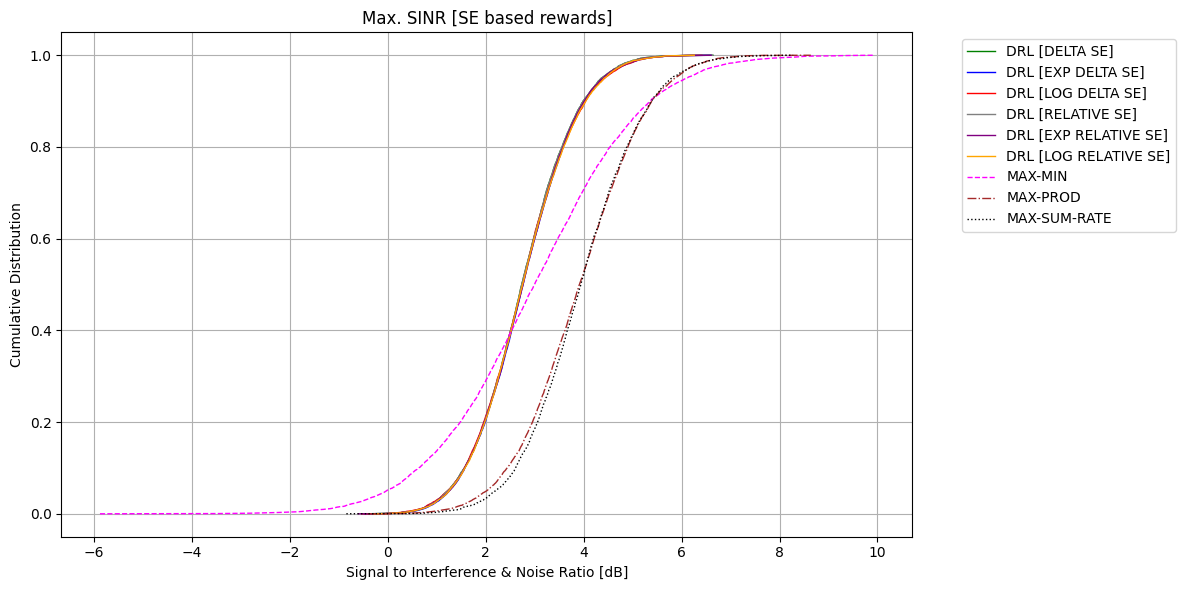

In [88]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='Max. SINR [SE based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='max', cumulative=True, save_plt=True, save_path='figures', convert_to_db=True)

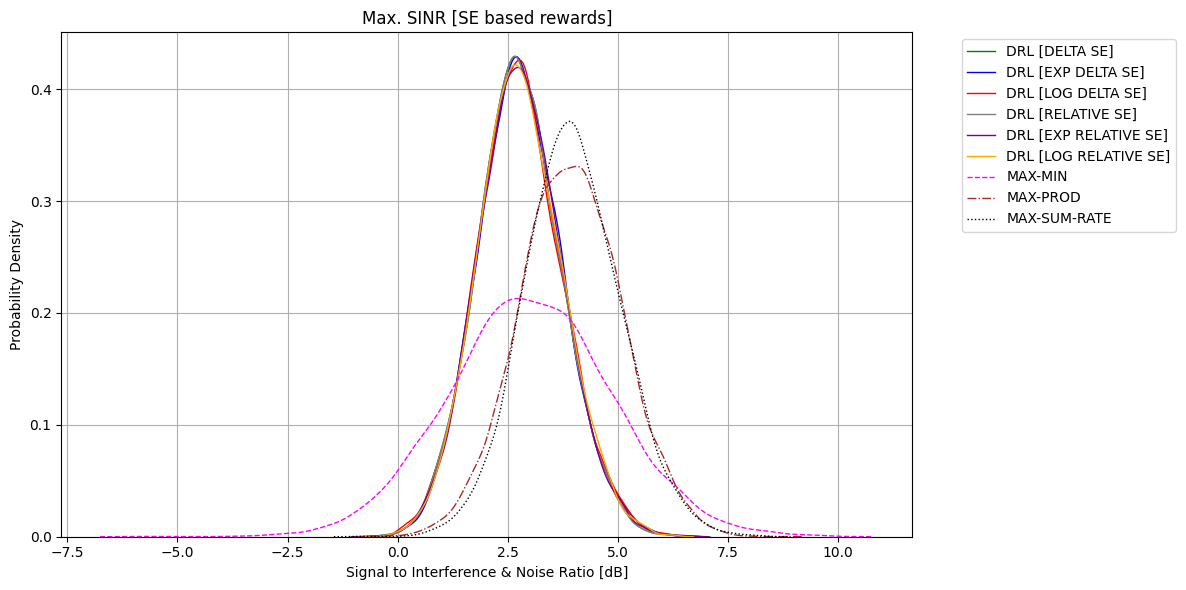

In [89]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='Max. SINR [SE based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='max', cumulative=False, save_plt=True, save_path='figures', convert_to_db=True)

AUC for DRL [DELTA SINR]: 3.75
AUC for DRL [EXP DELTA SINR]: 4.76
AUC for DRL [LOG DELTA SINR]: 4.63
AUC for DRL [RELATIVE SINR]: 3.82
AUC for DRL [EXP RELATIVE SINR]: 3.99
AUC for DRL [LOG RELATIVE SINR]: 3.75
AUC for MAX-MIN: 6.91
AUC for MAX-PROD: 4.72
AUC for MAX-SUM-RATE: 4.31


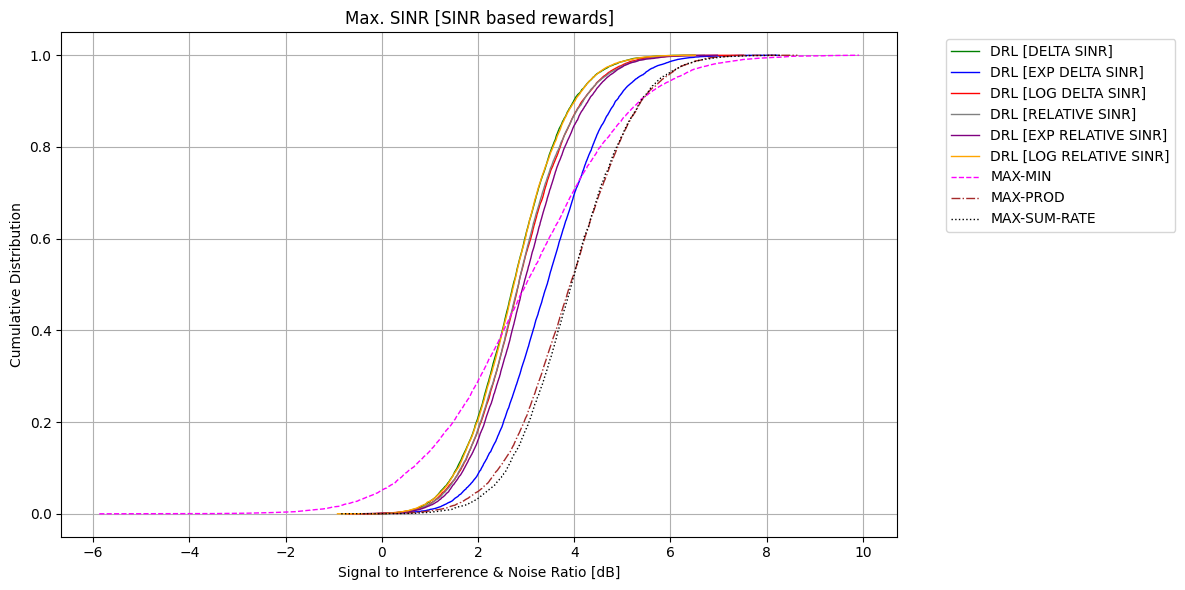

In [90]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='Max. SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='max', cumulative=True, save_plt=True, save_path='figures', convert_to_db=True)

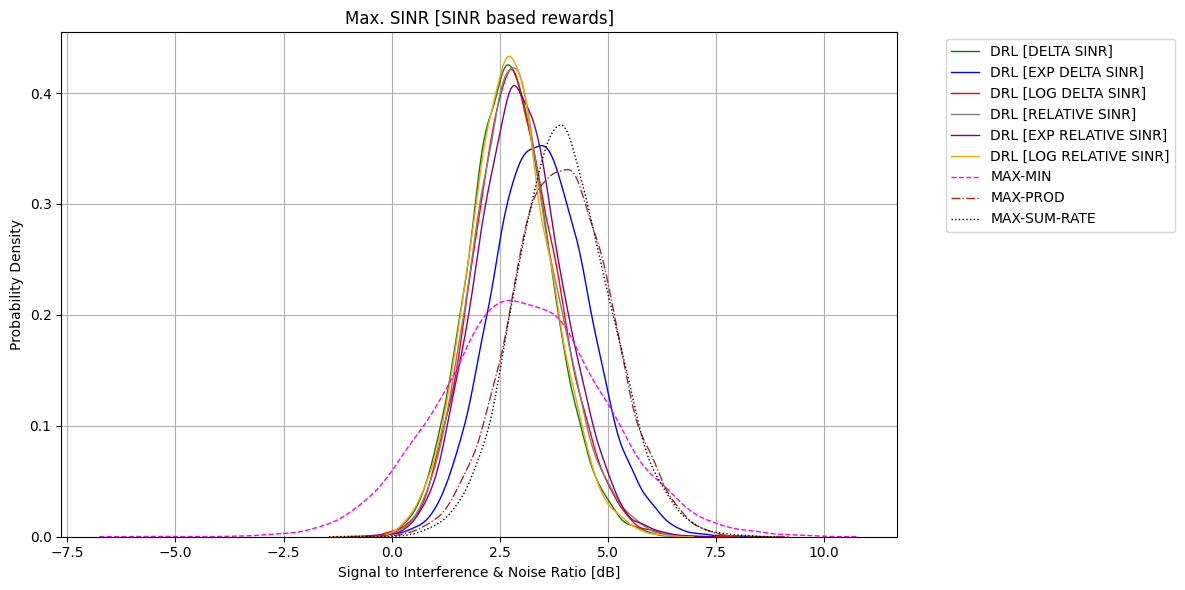

In [91]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='Max. SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='max', cumulative=False, save_plt=True, save_path='figures', convert_to_db=True)

## CDF Comparison

#### SE based reward

In [92]:
compare_models(SINR_DATA_R_SE, operation=None, data_label='SINR')

Label Average SINR  \
MODEL_DELTA_SE_SINRs                     DRL [DELTA SE]     0.812981   
MODEL_EXP_DELTA_CLIP_SE_SINRs        DRL [EXP DELTA SE]     0.814537   
MODEL_LOG_DELTA_SE_SINRs             DRL [LOG DELTA SE]     0.812927   
MODEL_RELATIVE_SE_SINRs               DRL [RELATIVE SE]     0.812981   
MODEL_EXP_RELATIVE_CLIP_SE_SINRs  DRL [EXP RELATIVE SE]     0.814442   
MODEL_LOG_RELATIVE_SE_SINRs       DRL [LOG RELATIVE SE]          NaN   
MAXMIN_SINRs                                    MAX-MIN          NaN   
MAXPROD_SINRs                                  MAX-PROD     0.715663   
SUMRATE_SINRs                              MAX-SUM-RATE          NaN   

                                  Max SINR Standard Deviation 25th Percentile  \
MODEL_DELTA_SE_SINRs              4.611013            0.41335         0.51127   
MODEL_EXP_DELTA_CLIP_SE_SINRs     4.572638           0.415311        0.511417   
MODEL_LOG_DELTA_SE_SINRs          4.381223           0.413898        0.510957   
MODEL_RELATIVE_SE_SINRs           4.611013            0.41335         0.51127   
MODEL_EXP_RELATIVE_CLIP_SE_SINRs  4.573822           0.415454        0.510926   
MODEL_LOG_RELATIVE_SE_SINRs            NaN                NaN             NaN   
MAXMIN_SINRs                           NaN                NaN             NaN   
MAXPROD_SINRs                     7.310175           0.622529        0.255532   
SUMRATE_SINRs                          NaN                NaN             NaN   

                                 50th Percentile 75th Percentile  
MODEL_DELTA_SE_SINRs                    0.747736         1.01625  
MODEL_EXP_DELTA_CLIP_SE_SINRs           0.749154        1.017215  
MODEL_LOG_DELTA_SE_SINRs                0.747072         1.01467  
MODEL_RELATIVE_SE_SINRs                 0.747736         1.01625  
MODEL_EXP_RELATIVE_CLIP_SE_SINRs        0.748943         1.01792  
MODEL_LOG_RELATIVE_SE_SINRs                  NaN             NaN  
MAXMIN_SINRs                                 NaN             NaN  
MAXPROD_SINRs                           0.558469        0.975149  
SUMRATE_SINRs                                NaN             NaN

In [93]:
# Kolmogorov-Smirnov Test
ks_results_r_se = compare_cdfs_ks(SINR_DATA_R_SE, operation=None)

In [94]:
ks_results_r_se['Best Model']

Criteria      Best Model
0       KS Statistic  DRL [DELTA SE]
1            P-Value  DRL [DELTA SE]
2  Area Between CDFs  DRL [DELTA SE]

In [95]:
# ks_results_r_se['Details']

In [96]:
# Earth Mover's Distance
emd_results_r_se = compare_cdfs_emd(SINR_DATA_R_SE, operation=None)

In [97]:
emd_results_r_se['Ranked Models']

Model  Average EMD
0         DRL [DELTA SE]          NaN
1     DRL [EXP DELTA SE]          NaN
2     DRL [LOG DELTA SE]          NaN
3      DRL [RELATIVE SE]          NaN
4  DRL [EXP RELATIVE SE]          NaN
5  DRL [LOG RELATIVE SE]          NaN
6                MAX-MIN          NaN
7               MAX-PROD          NaN
8           MAX-SUM-RATE          NaN

In [98]:
# emd_results_r_se['Details']

In [99]:
moments_r_se = compare_cdfs_moments(SINR_DATA_R_SE, operation=None, criteria='kurtosis')

In [100]:
moments_r_se['Ranked Models']

Model  Rank
0              MODEL_DELTA_SE_SINRs     1
3           MODEL_RELATIVE_SE_SINRs     2
4  MODEL_EXP_RELATIVE_CLIP_SE_SINRs     3
1     MODEL_EXP_DELTA_CLIP_SE_SINRs     4
2          MODEL_LOG_DELTA_SE_SINRs     5
7                     MAXPROD_SINRs     6
5       MODEL_LOG_RELATIVE_SE_SINRs     7
6                      MAXMIN_SINRs     8
8                     SUMRATE_SINRs     9

In [101]:
# moments_r_se['Details']

In [103]:
# Reload SINR data from csv files
MODEL_DELTA_SE_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_SINRs.csv',
                                            index_col=0)
MODEL_LOG_DELTA_SE_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_SINRs.csv', index_col=0)
MODEL_RELATIVE_SE_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_SINRs.csv',
                                               index_col=0)
MODEL_LOG_RELATIVE_SE_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_SINRs.csv',
                                          index_col=0)
MODEL_DELTA_SINR_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SINRs.csv',
                                              index_col=0)
MODEL_LOG_DELTA_SINR_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_RELATIVE_SINR_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs = pd.read_csv(
    f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SINRs.csv',
                                            index_col=0)

MAXMIN_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SINRs.csv', index_col=0)
MAXPROD_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SINRs.csv', index_col=0)
SUMRATE_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SINRs.csv', index_col=0)
SINR_DATA_R_SE = {
    'MODEL_DELTA_SE_SINRs': {'label': 'DRL [DELTA SE]', 'data': MODEL_DELTA_SE_SINRs, 'color': 'green',
                             'linestyle': '-', 'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_SINRs': {'label': 'DRL [EXP DELTA SE]', 'data': MODEL_EXP_DELTA_CLIP_SE_SINRs,
                                      'color': 'blue', 'linestyle': '-', 'linewidth': 1},
    'MODEL_LOG_DELTA_SE_SINRs': {'label': 'DRL [LOG DELTA SE]', 'data': MODEL_LOG_DELTA_SE_SINRs, 'color': 'red',
                                 'linestyle': '-', 'linewidth': 1},
    'MODEL_RELATIVE_SE_SINRs': {'label': 'DRL [RELATIVE SE]', 'data': MODEL_RELATIVE_SE_SINRs, 'color': 'gray',
                                'linestyle': '-', 'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_SINRs': {'label': 'DRL [EXP RELATIVE SE]', 'data': MODEL_EXP_RELATIVE_CLIP_SE_SINRs,
                                         'color': 'purple', 'linestyle': '-', 'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_SINRs': {'label': 'DRL [LOG RELATIVE SE]', 'data': MODEL_LOG_RELATIVE_SE_SINRs,
                                    'color': 'orange', 'linestyle': '-', 'linewidth': 1},
    'MAXMIN_SINRs': {'label': 'MAX-MIN', 'data': MAXMIN_SINRs, 'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SINRs': {'label': 'MAX-PROD', 'data': MAXPROD_SINRs, 'color': 'brown', 'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SINRs': {'label': 'MAX-SUM-RATE', 'data': SUMRATE_SINRs, 'color': 'black', 'linestyle': ':',
                      'linewidth': 1},
}

SINR_DATA_R_SINR = {
    'MODEL_DELTA_SINR_SINRs': {'label': 'DRL [DELTA SINR]', 'data': MODEL_DELTA_SINR_SINRs, 'color': 'green',
                               'linestyle': '-', 'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_SINRs': {'label': 'DRL [EXP DELTA SINR]', 'data': MODEL_EXP_DELTA_CLIP_SINR_SINRs,
                                        'color': 'blue', 'linestyle': '-', 'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_SINRs': {'label': 'DRL [LOG DELTA SINR]', 'data': MODEL_LOG_DELTA_SINR_SINRs, 'color': 'red',
                                   'linestyle': '-', 'linewidth': 1},
    'MODEL_RELATIVE_SINR_SINRs': {'label': 'DRL [RELATIVE SINR]', 'data': MODEL_RELATIVE_SINR_SINRs, 'color': 'gray',
                                  'linestyle': '-', 'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_SINRs': {'label': 'DRL [EXP RELATIVE SINR]',
                                           'data': MODEL_EXP_RELATIVE_CLIP_SINR_SINRs, 'color': 'purple',
                                           'linestyle': '-', 'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_SINRs': {'label': 'DRL [LOG RELATIVE SINR]', 'data': MODEL_LOG_RELATIVE_SINR_SINRs,
                                      'color': 'orange', 'linestyle': '-', 'linewidth': 1},
    'MAXMIN_SINRs': {'label': 'MAX-MIN', 'data': MAXMIN_SINRs, 'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SINRs': {'label': 'MAX-PROD', 'data': MAXPROD_SINRs, 'color': 'brown', 'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SINRs': {'label': 'MAX-SUM-RATE', 'data': SUMRATE_SINRs, 'color': 'black', 'linestyle': ':',
                      'linewidth': 1},
}

In [104]:
calculate_and_rank_percentiles(SINR_DATA_R_SE, [50, 75])

Model  50th Percentile  75th Percentile  Rank
8           MAX-SUM-RATE         0.591139         1.028348     1
4  DRL [EXP RELATIVE SE]         0.748943         1.017920     2
1     DRL [EXP DELTA SE]         0.749154         1.017215     3
5  DRL [LOG RELATIVE SE]         0.747733         1.016537     4
0         DRL [DELTA SE]         0.747736         1.016250     5
3      DRL [RELATIVE SE]         0.747736         1.016250     5
2     DRL [LOG DELTA SE]         0.747072         1.014670     7
7               MAX-PROD         0.558469         0.975149     8
6                MAX-MIN         0.209932         0.448860     9

#### SINR based reward

In [105]:
compare_models(SINR_DATA_R_SINR, operation=None, data_label='SINR')

Label Average SINR  \
MODEL_DELTA_SINR_SINRs                     DRL [DELTA SINR]     0.812762   
MODEL_EXP_DELTA_CLIP_SINR_SINRs        DRL [EXP DELTA SINR]     0.732236   
MODEL_LOG_DELTA_SINR_SINRs             DRL [LOG DELTA SINR]     0.818145   
MODEL_RELATIVE_SINR_SINRs               DRL [RELATIVE SINR]     0.808986   
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs  DRL [EXP RELATIVE SINR]      0.79896   
MODEL_LOG_RELATIVE_SINR_SINRs       DRL [LOG RELATIVE SINR]     0.814383   
MAXMIN_SINRs                                        MAX-MIN     0.378453   
MAXPROD_SINRs                                      MAX-PROD     0.715663   
SUMRATE_SINRs                                  MAX-SUM-RATE     0.738255   

                                    Max SINR Standard Deviation  \
MODEL_DELTA_SINR_SINRs              4.478317           0.412963   
MODEL_EXP_DELTA_CLIP_SINR_SINRs     6.634297           0.569836   
MODEL_LOG_DELTA_SINR_SINRs          5.643797            0.42773   
MODEL_RELATIVE_SINR_SINRs           4.680335           0.432369   
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs  4.983332           0.453604   
MODEL_LOG_RELATIVE_SINR_SINRs       4.485703           0.413714   
MAXMIN_SINRs                        9.819977           0.514287   
MAXPROD_SINRs                       7.310175           0.622529   
SUMRATE_SINRs                       8.488307           0.646027   

                                   25th Percentile 50th Percentile  \
MODEL_DELTA_SINR_SINRs                    0.511784        0.747328   
MODEL_EXP_DELTA_CLIP_SINR_SINRs           0.292177        0.646257   
MODEL_LOG_DELTA_SINR_SINRs                0.506808        0.749987   
MODEL_RELATIVE_SINR_SINRs                 0.497029        0.742638   
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs        0.472923        0.732953   
MODEL_LOG_RELATIVE_SINR_SINRs             0.511856        0.749539   
MAXMIN_SINRs                              0.086406        0.209932   
MAXPROD_SINRs                             0.255532        0.558469   
SUMRATE_SINRs                             0.246132        0.591139   

                                   75th Percentile  
MODEL_DELTA_SINR_SINRs                    1.016198  
MODEL_EXP_DELTA_CLIP_SINR_SINRs           1.016796  
MODEL_LOG_DELTA_SINR_SINRs                1.024107  
MODEL_RELATIVE_SINR_SINRs                 1.018632  
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs         1.01954  
MODEL_LOG_RELATIVE_SINR_SINRs             1.016916  
MAXMIN_SINRs                               0.44886  
MAXPROD_SINRs                             0.975149  
SUMRATE_SINRs                             1.028348

In [106]:
# Kolmogorov-Smirnov Test
ks_results_r_sinr = compare_cdfs_ks(SINR_DATA_R_SINR, operation=None)

In [107]:
ks_results_r_sinr['Best Model']

Criteria               Best Model
0       KS Statistic  DRL [EXP RELATIVE SINR]
1            P-Value  DRL [LOG RELATIVE SINR]
2  Area Between CDFs  DRL [EXP RELATIVE SINR]

In [108]:
# ks_results_r_sinr['Details']

In [109]:
# Earth Mover's Distance
emd_results_r_sinr = compare_cdfs_emd(SINR_DATA_R_SINR, operation=None)

In [110]:
emd_results_r_sinr['Ranked Models']

Model  Average EMD
0  DRL [EXP RELATIVE SINR]     0.125525
1      DRL [RELATIVE SINR]     0.127324
2     DRL [LOG DELTA SINR]     0.130800
3         DRL [DELTA SINR]     0.133637
4  DRL [LOG RELATIVE SINR]     0.133810
5     DRL [EXP DELTA SINR]     0.145106
6                 MAX-PROD     0.174640
7             MAX-SUM-RATE     0.179082
8                  MAX-MIN     0.415761

In [111]:
# emd_results_r_sinr['Details']

In [112]:
moments_r_sinr = compare_cdfs_moments(SINR_DATA_R_SINR, operation=None, criteria='kurtosis')

In [113]:
moments_r_sinr['Ranked Models']

Model  Rank
5       MODEL_LOG_RELATIVE_SINR_SINRs     1
0              MODEL_DELTA_SINR_SINRs     2
4  MODEL_EXP_RELATIVE_CLIP_SINR_SINRs     3
1     MODEL_EXP_DELTA_CLIP_SINR_SINRs     4
3           MODEL_RELATIVE_SINR_SINRs     5
2          MODEL_LOG_DELTA_SINR_SINRs     6
8                       SUMRATE_SINRs     7
7                       MAXPROD_SINRs     8
6                        MAXMIN_SINRs     9

In [114]:
# moments_r_sinr['Details']

In [115]:
calculate_and_rank_percentiles(SINR_DATA_R_SINR, [50, 75])

Model  50th Percentile  75th Percentile  Rank
8             MAX-SUM-RATE         0.591139         1.028348     1
2     DRL [LOG DELTA SINR]         0.749987         1.024107     2
4  DRL [EXP RELATIVE SINR]         0.732953         1.019540     3
3      DRL [RELATIVE SINR]         0.742638         1.018632     4
5  DRL [LOG RELATIVE SINR]         0.749539         1.016916     5
1     DRL [EXP DELTA SINR]         0.646257         1.016796     6
0         DRL [DELTA SINR]         0.747328         1.016198     7
7                 MAX-PROD         0.558469         0.975149     8
6                  MAX-MIN         0.209932         0.448860     9

# SINR Heatmaps

In [22]:
MODEL_DELTA_SE_SINRs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_SINRs.csv', index_col=0)
MODEL_LOG_DELTA_SE_SINRs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_SINRs.csv', index_col=0)

MODEL_RELATIVE_SE_SINRs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_SINRs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_SINRs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_SINRs.csv', index_col=0)

MODEL_DELTA_SINR_SINRs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SINRs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_SINRs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SINRs.csv', index_col=0)

MODEL_RELATIVE_SINR_SINRs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SINRs.csv', index_col=0)

MAXMIN_SINRs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SINRs.csv', index_col=0)
MAXPROD_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SINRs.csv', index_col=0)
SUMRATE_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SINRs.csv', index_col=0)

UEs_LOCATIONS = pd.read_csv(f'{results_dir}/{results_folder}/UEs_LOCATIONS.csv', index_col=0)
APs_LOCATIONS = pd.read_csv(f'{results_dir}/{results_folder}/APs_LOCATIONS.csv', index_col=0)

In [23]:
grid_size = (100, 100)

In [26]:
vmin = -30
vmax = 0
colorbar_ticks = generate_colorbar_ticks(vmin, vmax, 5)

In [119]:
# plot_sinr_heatmap(title='DRL [DELTA SE]', sinr_df=MODEL_DELTA_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks, filter_min=-15, filter_max=0)

In [120]:
# plot_sinr_heatmap(title='DRL [EXP DELTA CLIP SE]', sinr_df=MODEL_EXP_DELTA_CLIP_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [121]:
# plot_sinr_heatmap(title='DRL [LOG DELTA SE]', sinr_df=MODEL_LOG_DELTA_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [122]:
# plot_sinr_heatmap(title='DRL [RELATIVE SE]', sinr_df=MODEL_RELATIVE_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [123]:
# plot_sinr_heatmap(title='DRL [EXP RELATIVE CLIP SE]', sinr_df=MODEL_EXP_RELATIVE_CLIP_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [124]:
# plot_sinr_heatmap(title='DRL [LOG RELATIVE SE]', sinr_df=MODEL_LOG_RELATIVE_SE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [125]:
# plot_sinr_heatmap(title='DRL [DELTA_SINR]', sinr_df=MODEL_DELTA_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [126]:
# plot_sinr_heatmap(title='DRL [EXP DELTA CLIP SINR]', sinr_df=MODEL_EXP_DELTA_CLIP_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [127]:
# plot_sinr_heatmap(title='DRL [LOG DELTA SINR]', sinr_df=MODEL_LOG_DELTA_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [128]:
# plot_sinr_heatmap(title='DRL [RELATIVE SINR]', sinr_df=MODEL_RELATIVE_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [129]:
# plot_sinr_heatmap(title='DRL [EXP RELATIVE CLIP SINR]', sinr_df=MODEL_EXP_RELATIVE_CLIP_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [130]:
# plot_sinr_heatmap(title='DRL [LOG RELATIVE SINR]', sinr_df=MODEL_LOG_RELATIVE_SINR_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks)

In [131]:
# plot_sinr_heatmap(title='DRL [MAXMIN]', sinr_df=MAXMIN_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks, filter_min=None, filter_max=0)

In [132]:
# plot_sinr_heatmap(title='DRL [MAXPROD]', sinr_df=MAXPROD_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks, filter_min=None, filter_max=0)

In [133]:
# plot_sinr_heatmap(title='DRL [SUMRATE]', sinr_df=SUMRATE_SINRs, location_df=UEs_LOCATIONS, ap_location_df=APs_LOCATIONS, vmin=vmin, vmax=vmax, grid_size=grid_size, colorbar_ticks=colorbar_ticks, filter_min=None, filter_max=0)

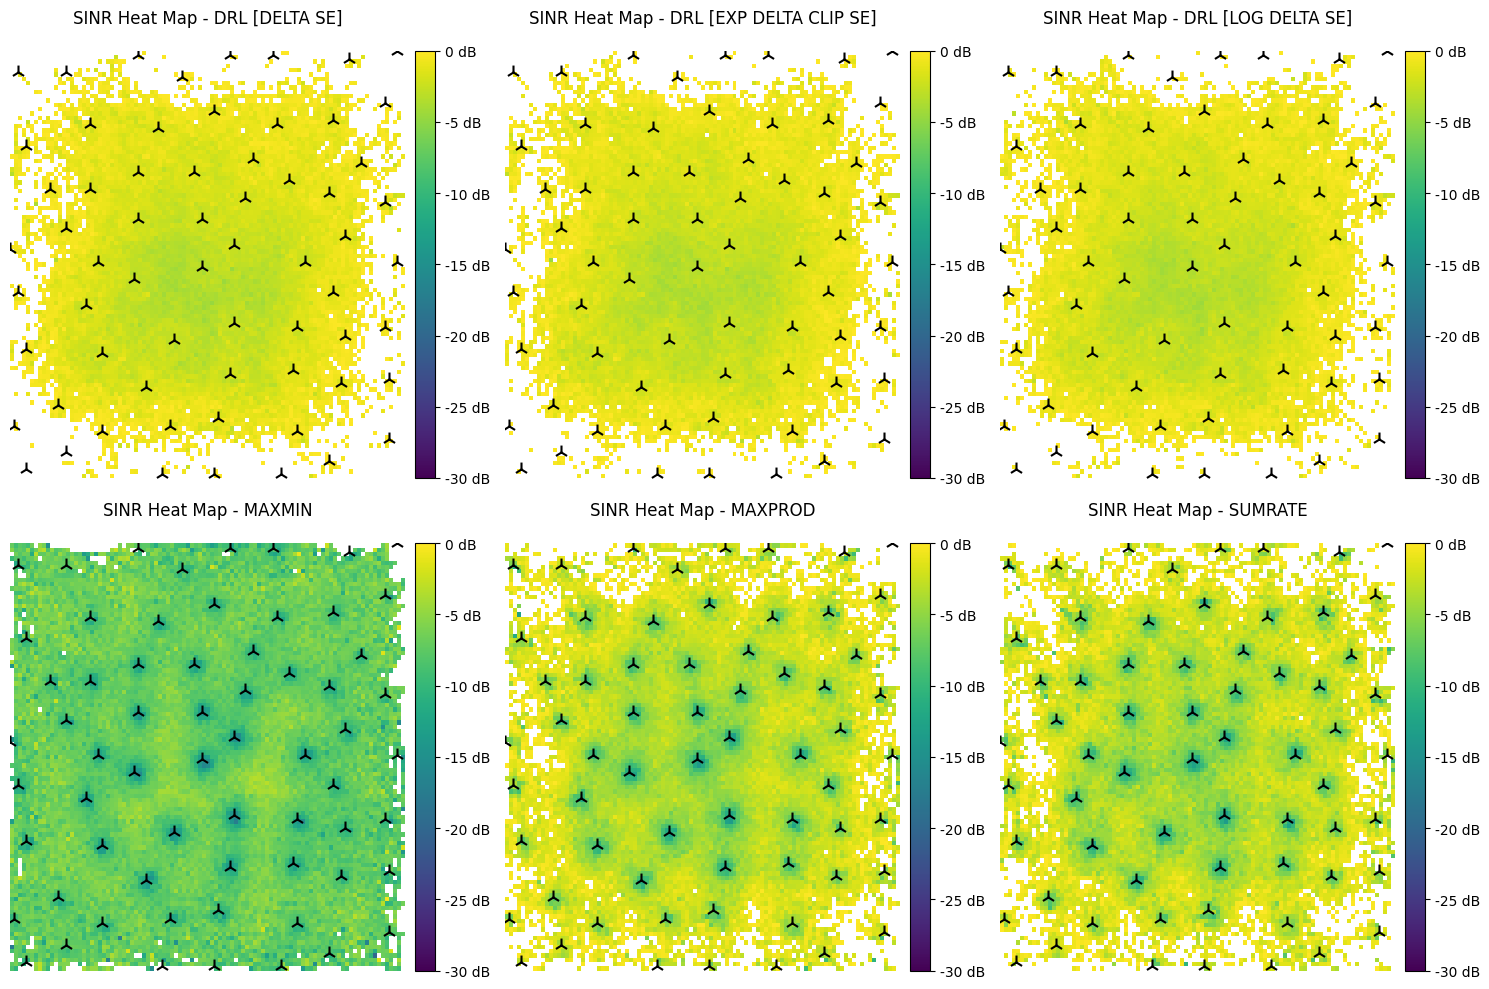

In [27]:
sinr_dataframes = {
    'DRL [DELTA SE]': MODEL_DELTA_SE_SINRs,
    'DRL [EXP DELTA CLIP SE]':MODEL_EXP_DELTA_CLIP_SE_SINRs,
    'DRL [LOG DELTA SE]': MODEL_LOG_DELTA_SE_SINRs,
    'MAXMIN': MAXMIN_SINRs,
    'MAXPROD': MAXPROD_SINRs,
    'SUMRATE': SUMRATE_SINRs
}

plot_sinr_heatmaps(sinr_dataframes, UEs_LOCATIONS, APs_LOCATIONS, vmin, vmax, filter_min=vmin, filter_max=vmax, grid_size=grid_size, rounding_precision=0, colorbar_ticks=colorbar_ticks)

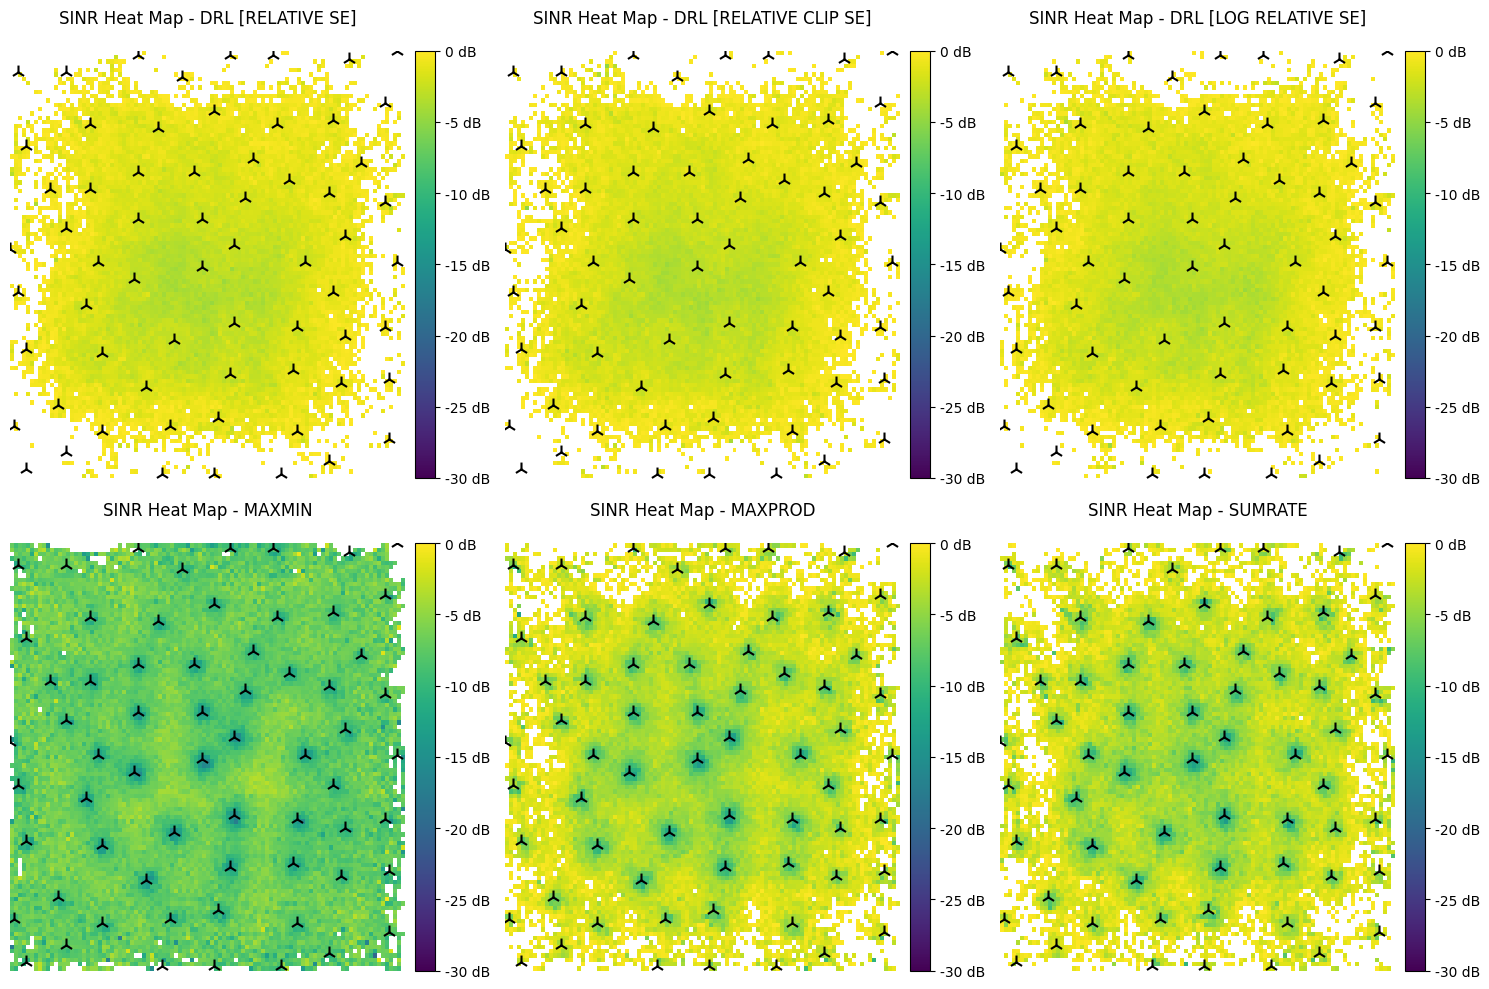

In [135]:
sinr_dataframes = {
    'DRL [RELATIVE SE]': MODEL_RELATIVE_SE_SINRs, 
    'DRL [RELATIVE CLIP SE]':MODEL_EXP_RELATIVE_CLIP_SE_SINRs, 
    'DRL [LOG RELATIVE SE]': MODEL_LOG_RELATIVE_SE_SINRs,
    'MAXMIN': MAXMIN_SINRs,
    'MAXPROD': MAXPROD_SINRs,
    'SUMRATE': SUMRATE_SINRs
}

plot_sinr_heatmaps(sinr_dataframes, UEs_LOCATIONS, APs_LOCATIONS, vmin, vmax, filter_min=vmin, filter_max=vmax, grid_size=grid_size, rounding_precision=0, colorbar_ticks=colorbar_ticks)

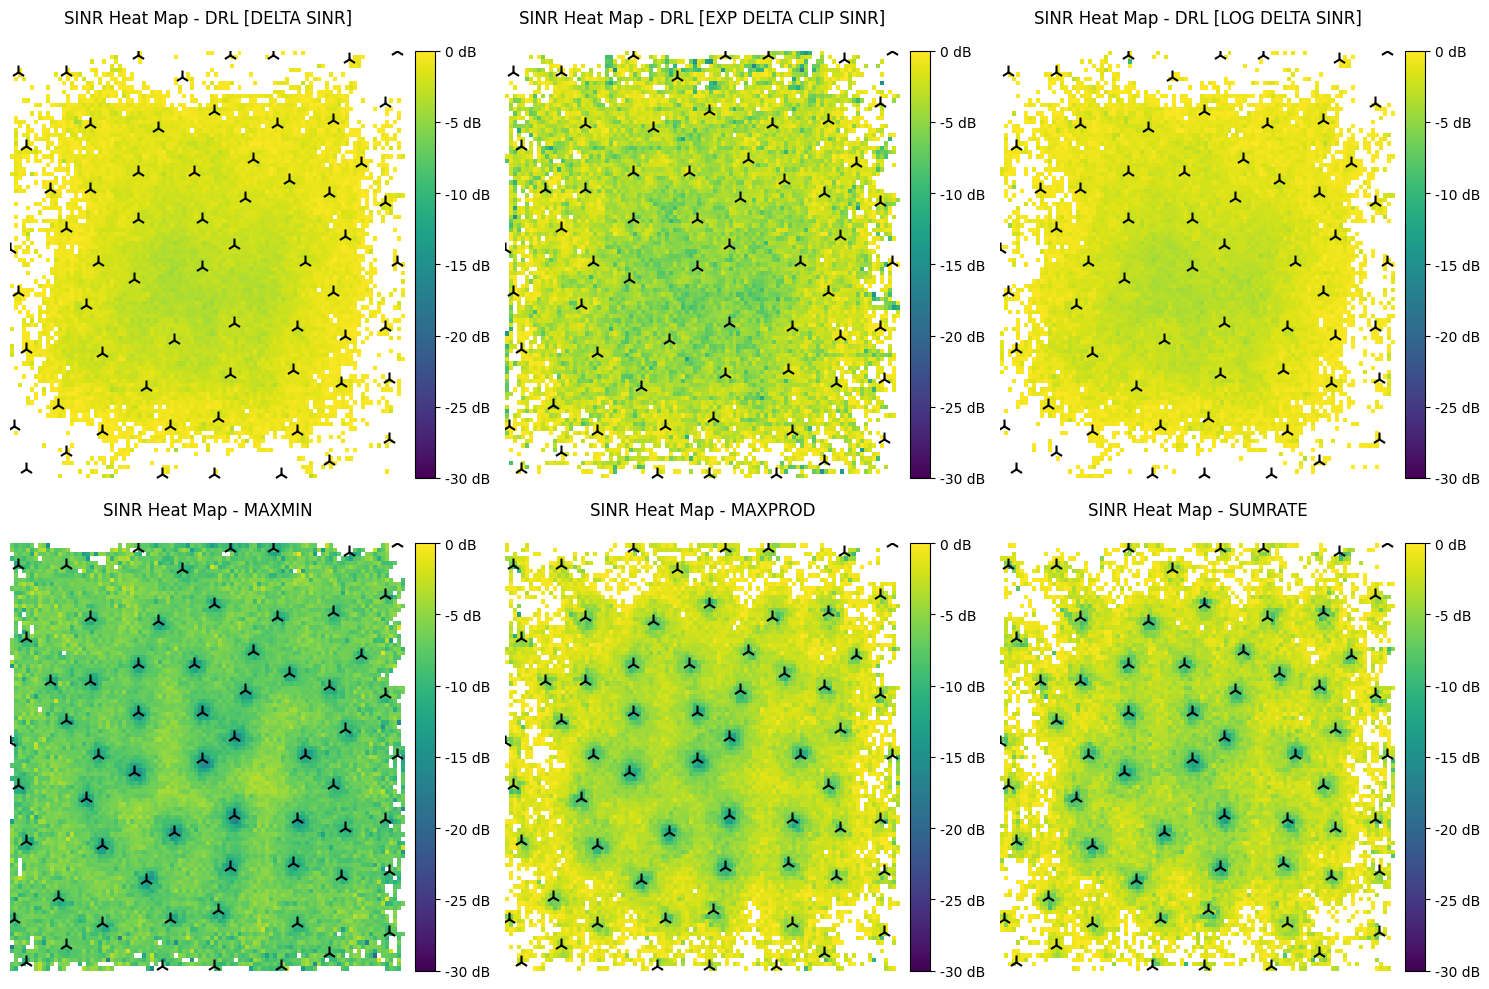

In [136]:
sinr_dataframes = {
    'DRL [DELTA SINR]': MODEL_DELTA_SINR_SINRs,
    'DRL [EXP DELTA CLIP SINR]':MODEL_EXP_DELTA_CLIP_SINR_SINRs,
    'DRL [LOG DELTA SINR]': MODEL_LOG_DELTA_SINR_SINRs,
    'MAXMIN': MAXMIN_SINRs,
    'MAXPROD': MAXPROD_SINRs,
    'SUMRATE': SUMRATE_SINRs
}

plot_sinr_heatmaps(sinr_dataframes, UEs_LOCATIONS, APs_LOCATIONS, vmin, vmax, filter_min=vmin, filter_max=vmax, grid_size=grid_size, rounding_precision=0, colorbar_ticks=colorbar_ticks)

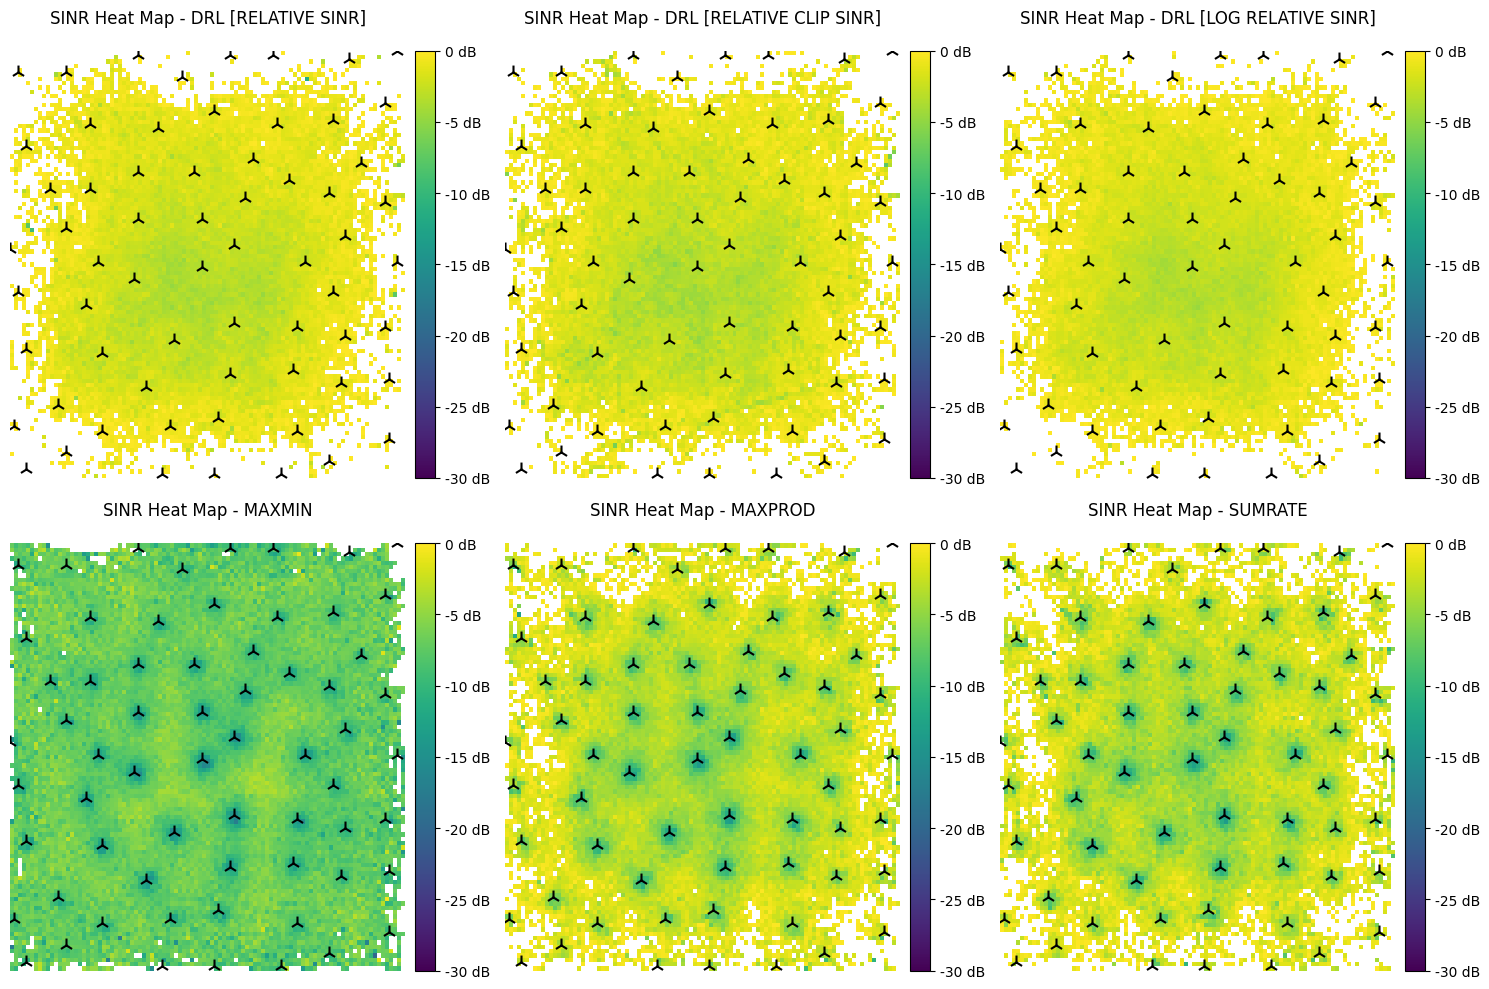

In [137]:
sinr_dataframes = {
    'DRL [RELATIVE SINR]': MODEL_RELATIVE_SINR_SINRs, 
    'DRL [RELATIVE CLIP SINR]':MODEL_EXP_RELATIVE_CLIP_SINR_SINRs, 
    'DRL [LOG RELATIVE SINR]': MODEL_LOG_RELATIVE_SINR_SINRs,
    'MAXMIN': MAXMIN_SINRs,
    'MAXPROD': MAXPROD_SINRs,
    'SUMRATE': SUMRATE_SINRs
}

plot_sinr_heatmaps(sinr_dataframes, UEs_LOCATIONS, APs_LOCATIONS, vmin, vmax, filter_min=vmin, filter_max=vmax, grid_size=grid_size, rounding_precision=0, colorbar_ticks=colorbar_ticks)

# Computational Time

In [138]:
# load data from csv files
MODEL_DELTA_SE_DURATIONs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_DURATIONs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_DURATIONs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_DURATIONs.csv', index_col=0)
MODEL_LOG_DELTA_SE_DURATIONs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_DURATIONs.csv', index_col=0)
MODEL_RELATIVE_SE_DURATIONs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_DURATIONs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_DURATIONs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_DURATIONs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_DURATIONs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_DURATIONs.csv', index_col=0)
MODEL_DELTA_SINR_DURATIONs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_DURATIONs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_DURATIONs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_DURATIONs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_DURATIONs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_DURATIONs.csv', index_col=0)
MODEL_RELATIVE_SINR_DURATIONs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_DURATIONs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_DURATIONs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_DURATIONs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_DURATIONs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_DURATIONs.csv', index_col=0)

MAXMIN_DURATIONs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_DURATIONs.csv', index_col=0)
MAXPROD_DURATIONs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_DURATIONs.csv', index_col=0)
SUMRATE_DURATIONs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_DURATIONs.csv', index_col=0)

In [139]:
DURATION_DATA = {
    'MODEL_DELTA_SE_DURATIONs':                 {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_DURATIONs},
    'MODEL_EXP_DELTA_CLIP_SE_DURATIONs':        {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_DURATIONs},
    'MODEL_LOG_DELTA_SE_DURATIONs':             {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_DURATIONs},
    'MODEL_RELATIVE_SE_DURATIONs':              {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_DURATIONs},
    'MODEL_EXP_RELATIVE_CLIP_SE_DURATIONs':     {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_DURATIONs},
    'MODEL_LOG_RELATIVE_SE_DURATIONs':          {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_DURATIONs},
    'MODEL_DELTA_SINR_DURATIONs':               {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_DURATIONs},
    'MODEL_EXP_DELTA_CLIP_SINR_DURATIONs':      {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_DURATIONs},
    'MODEL_LOG_DELTA_SINR_DURATIONs':           {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_DURATIONs},
    'MODEL_RELATIVE_SINR_DURATIONs':            {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_DURATIONs},
    'MODEL_EXP_RELATIVE_CLIP_SINR_DURATIONs':   {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_DURATIONs},
    'MODEL_LOG_RELATIVE_SINR_DURATIONs':        {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_DURATIONs},
    'MAXMIN_DURATIONs':                         {'label': 'MAX-MIN',                    'data': MAXMIN_DURATIONs},
    'MAXPROD_DURATIONs':                        {'label': 'MAX-PROD',                   'data': MAXPROD_DURATIONs},
    'SUMRATE_DURATIONs':                        {'label': 'MAX-SUM-RATE',               'data': SUMRATE_DURATIONs},
}

In [140]:
duration_benchmarking(DURATION_DATA)

Model  Mean Duration  Median Duration  \
0            DRL [DELTA SE]       0.000362         0.000336   
1        DRL [EXP DELTA SE]       0.000277         0.000263   
2        DRL [LOG DELTA SE]       0.000232         0.000218   
3         DRL [RELATIVE SE]       0.000362         0.000336   
4     DRL [EXP RELATIVE SE]       0.000230         0.000217   
5     DRL [LOG RELATIVE SE]       0.000224         0.000209   
6          DRL [DELTA SINR]       0.000210         0.000199   
7      DRL [EXP DELTA SINR]       0.000198         0.000185   
8      DRL [LOG DELTA SINR]       0.000188         0.000179   
9       DRL [RELATIVE SINR]       0.000182         0.000175   
10  DRL [EXP RELATIVE SINR]       0.000192         0.000181   
11  DRL [LOG RELATIVE SINR]       0.000209         0.000201   
12                  MAX-MIN       0.298062         0.300727   
13                 MAX-PROD       0.058537         0.052742   
14             MAX-SUM-RATE       0.060590         0.051965   

    Standard Deviation  Max Duration  Min Duration  
0             0.000155      0.001846      0.000320  
1             0.000047      0.000498      0.000187  
2             0.000037      0.000380      0.000186  
3             0.000155      0.001846      0.000320  
4             0.000045      0.000461      0.000182  
5             0.000057      0.000623      0.000172  
6             0.000034      0.000348      0.000156  
7             0.000048      0.000424      0.000152  
8             0.000034      0.000315      0.000145  
9             0.000032      0.000334      0.000144  
10            0.000037      0.000373      0.000146  
11            0.000037      0.000410      0.000169  
12            0.052475      0.427013      0.135599  
13            0.029409      0.121928      0.012742  
14            0.034649      0.136080      0.012107

In [141]:
compare_with_baseline(SE_DATA_R_SE, None, 'MAXMIN_SEs')

MODEL_DELTA_SE_SEs  MODEL_EXP_DELTA_CLIP_SE_SEs  MODEL_LOG_DELTA_SE_SEs  \
0                75.0                        81.25                    75.0   

   MODEL_RELATIVE_SE_SEs  MODEL_EXP_RELATIVE_CLIP_SE_SEs  \
0                   75.0                          78.125   

   MODEL_LOG_RELATIVE_SE_SEs  MAXPROD_SEs  SUMRATE_SEs  
0                     84.375       90.625        81.25

In [142]:
compare_with_baseline(SE_DATA_R_SE, None, 'MAXPROD_SEs')

MODEL_DELTA_SE_SEs  MODEL_EXP_DELTA_CLIP_SE_SEs  MODEL_LOG_DELTA_SE_SEs  \
0              90.625                         87.5                    87.5   

   MODEL_RELATIVE_SE_SEs  MODEL_EXP_RELATIVE_CLIP_SE_SEs  \
0                 90.625                          84.375   

   MODEL_LOG_RELATIVE_SE_SEs  MAXMIN_SEs  SUMRATE_SEs  
0                     90.625       100.0        93.75

In [143]:
compare_with_baseline(SE_DATA_R_SE, None, 'SUMRATE_SEs')

MODEL_DELTA_SE_SEs  MODEL_EXP_DELTA_CLIP_SE_SEs  MODEL_LOG_DELTA_SE_SEs  \
0               93.75                         87.5                  90.625   

   MODEL_RELATIVE_SE_SEs  MODEL_EXP_RELATIVE_CLIP_SE_SEs  \
0                  93.75                            87.5   

   MODEL_LOG_RELATIVE_SE_SEs  MAXMIN_SEs  MAXPROD_SEs  
0                     96.875       100.0       90.625

In [144]:
compare_with_baseline(SE_DATA_R_SINR, None, 'MAXMIN_SEs')

MODEL_DELTA_SINR_SEs  MODEL_EXP_DELTA_CLIP_SINR_SEs  \
0                 81.25                         84.375   

   MODEL_LOG_DELTA_SINR_SEs  MODEL_RELATIVE_SINR_SEs  \
0                    71.875                     75.0   

   MODEL_EXP_RELATIVE_CLIP_SINR_SEs  MODEL_LOG_RELATIVE_SINR_SEs  MAXPROD_SEs  \
0                            78.125                       78.125       90.625   

   SUMRATE_SEs  
0        81.25

In [145]:
compare_with_baseline(SE_DATA_R_SINR, None, 'MAXPROD_SEs')

MODEL_DELTA_SINR_SEs  MODEL_EXP_DELTA_CLIP_SINR_SEs  \
0                 93.75                          93.75   

   MODEL_LOG_DELTA_SINR_SEs  MODEL_RELATIVE_SINR_SEs  \
0                      87.5                    93.75   

   MODEL_EXP_RELATIVE_CLIP_SINR_SEs  MODEL_LOG_RELATIVE_SINR_SEs  MAXMIN_SEs  \
0                            90.625                        93.75       100.0   

   SUMRATE_SEs  
0        93.75

In [146]:
compare_with_baseline(SE_DATA_R_SINR, None, 'SUMRATE_SEs')

MODEL_DELTA_SINR_SEs  MODEL_EXP_DELTA_CLIP_SINR_SEs  \
0                  87.5                         90.625   

   MODEL_LOG_DELTA_SINR_SEs  MODEL_RELATIVE_SINR_SEs  \
0                    84.375                   84.375   

   MODEL_EXP_RELATIVE_CLIP_SINR_SEs  MODEL_LOG_RELATIVE_SINR_SEs  MAXMIN_SEs  \
0                            90.625                         87.5       100.0   

   MAXPROD_SEs  
0       90.625

In [147]:
SINR_DATA_R_SE['SUMRATE_SINRs']['data'].min().min()

0.0